Identificar temas principales

In [1]:
# Instalar dependencias necesarias
!pip install PyPDF2 nltk spacy networkx scikit-learn matplotlib seaborn wordcloud plotly
!python -m spacy download es_core_news_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 60.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import PyPDF2
import nltk
import spacy
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
from collections import Counter
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')

print("🔧 Configuración inicial completada")
print("=" * 50)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


🔧 Configuración inicial completada


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



📄 PASO 1: LECTURA DEL PDF
------------------------------
📊 Páginas encontradas: 58
   Página 1: 482 caracteres
   Página 2: 3086 caracteres
   Página 3: 2602 caracteres
   Página 4: 2141 caracteres
   Página 5: 2801 caracteres
   Página 6: 2793 caracteres
   Página 7: 2701 caracteres
   Página 8: 2591 caracteres
   Página 9: 2256 caracteres
   Página 10: 2538 caracteres
   Página 11: 2735 caracteres
   Página 12: 2467 caracteres
   Página 13: 2348 caracteres
   Página 14: 2237 caracteres
   Página 15: 2799 caracteres
   Página 16: 2541 caracteres
   Página 17: 2529 caracteres
   Página 18: 2758 caracteres
   Página 19: 3161 caracteres
   Página 20: 2437 caracteres
   Página 21: 2828 caracteres
   Página 22: 2612 caracteres
   Página 23: 3071 caracteres
   Página 24: 2864 caracteres
   Página 25: 2457 caracteres
   Página 26: 2687 caracteres
   Página 27: 2268 caracteres
   Página 28: 2763 caracteres
   Página 29: 2438 caracteres
   Página 30: 2775 caracteres
   Página 31: 2289 caracte

/tmp/ipython-input-4-1619525521.py:50: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-4-1619525521.py:50: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


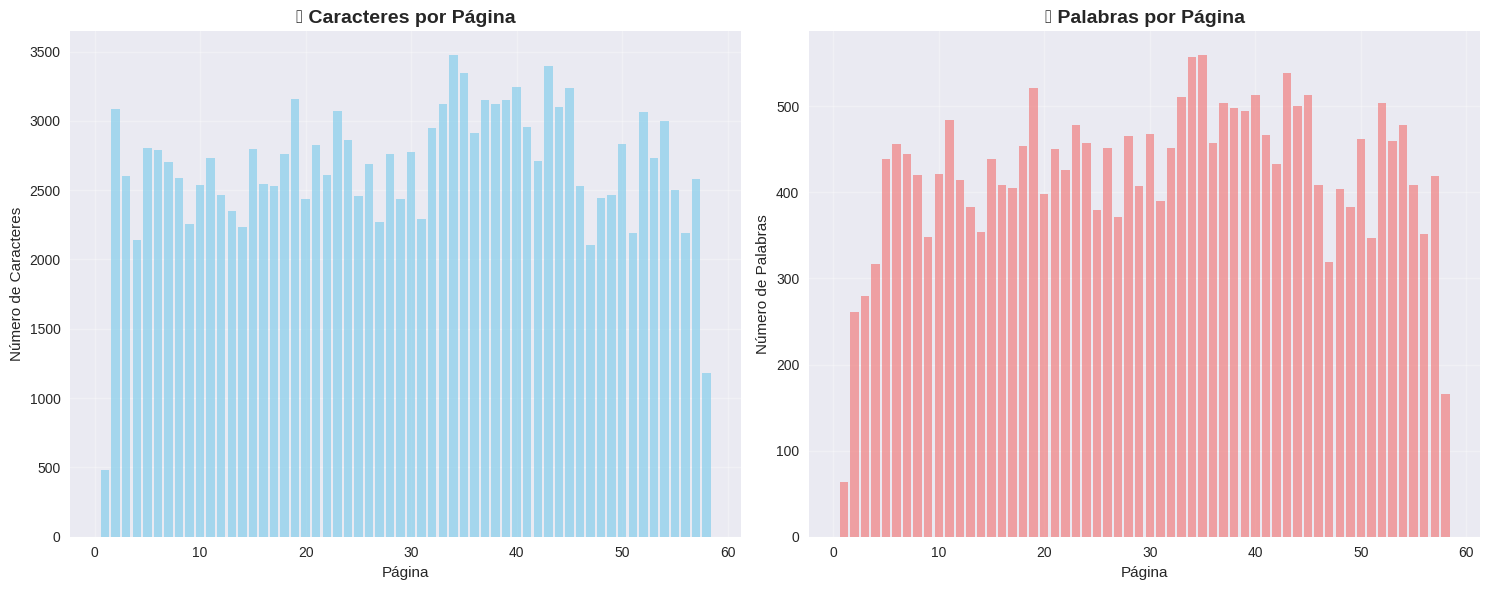

✅ PASO 1 COMPLETADO - Continuando...


In [4]:
print("\n📄 PASO 1: LECTURA DEL PDF")
print("-" * 30)

def leer_pdf(ruta_archivo):
    texto = ""
    try:
        with open(ruta_archivo, 'rb') as archivo:
            lector = PyPDF2.PdfReader(archivo)
            print(f"📊 Páginas encontradas: {len(lector.pages)}")

            for i, pagina in enumerate(lector.pages):
                texto_pagina = pagina.extract_text()
                texto += texto_pagina + "\n"
                print(f"   Página {i+1}: {len(texto_pagina)} caracteres")

        print(f"\n✅ PDF leído exitosamente!")
        print(f"📏 Longitud total: {len(texto):,} caracteres")

        # Visualización PASO 1: Distribución de texto por página
        paginas_info = []
        texto_temp = ""
        with open(ruta_archivo, 'rb') as archivo:
            lector = PyPDF2.PdfReader(archivo)
            for i, pagina in enumerate(lector.pages):
                texto_pagina = pagina.extract_text()
                paginas_info.append({
                    'Página': i+1,
                    'Caracteres': len(texto_pagina),
                    'Palabras': len(texto_pagina.split())
                })

        df_paginas = pd.DataFrame(paginas_info)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Gráfico de caracteres por página
        ax1.bar(df_paginas['Página'], df_paginas['Caracteres'], color='skyblue', alpha=0.7)
        ax1.set_title('📊 Caracteres por Página', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Página')
        ax1.set_ylabel('Número de Caracteres')
        ax1.grid(True, alpha=0.3)

        # Gráfico de palabras por página
        ax2.bar(df_paginas['Página'], df_paginas['Palabras'], color='lightcoral', alpha=0.7)
        ax2.set_title('📝 Palabras por Página', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Página')
        ax2.set_ylabel('Número de Palabras')
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        return texto, df_paginas

    except Exception as e:
        print(f"❌ Error al leer PDF: {e}")
        return None, None

# Ejecutar PASO 1
ruta_pdf = "/content/136068 ELSA SANTAMARÍA GALEANO VS. UNION COLOMBIANA DE AUTOBUSES SA.pdf"
texto_crudo, info_paginas = leer_pdf(ruta_pdf)

if texto_crudo:
    print("✅ PASO 1 COMPLETADO - Continuando...")
else:
    print("❌ ERROR EN PASO 1 - Deteniendo ejecución")
    exit()


🔤 PASO 2: TOKENIZACIÓN
------------------------------
🧹 Limpiando texto...
🔤 Tokenizando...
📊 Total de tokens: 27,323


/tmp/ipython-input-5-2647318346.py:68: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-5-2647318346.py:68: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


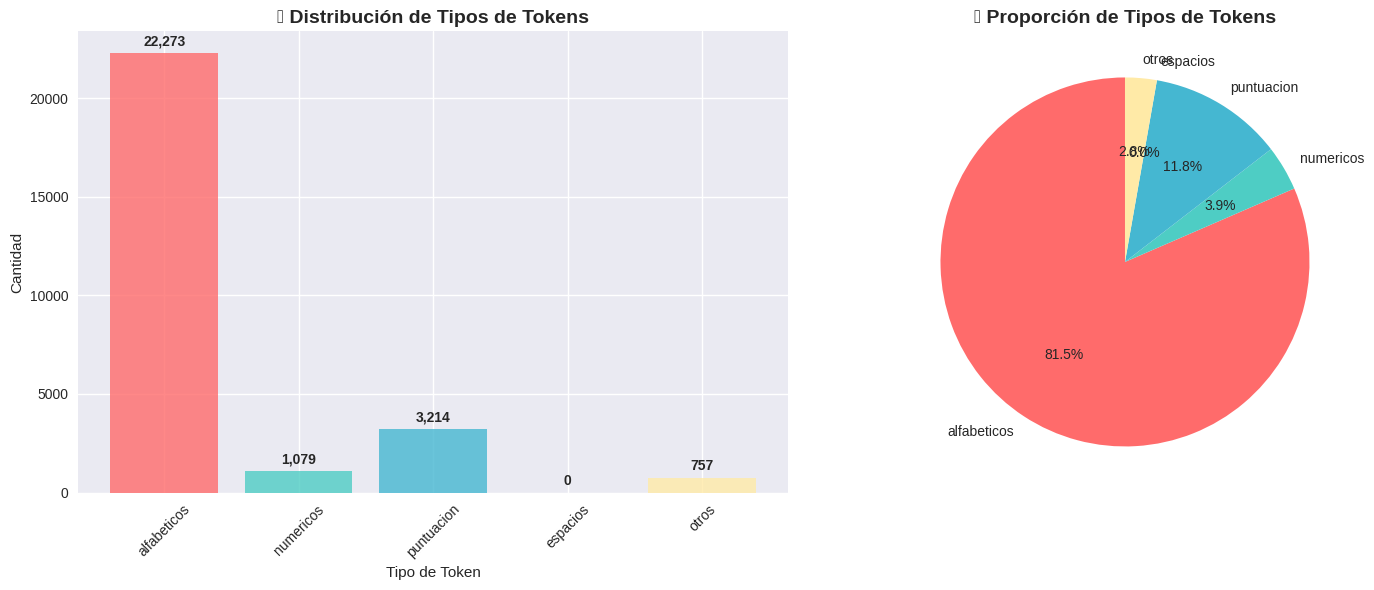

✅ PASO 2 COMPLETADO - Continuando...


In [5]:
# PASO 2: LIMPIEZA Y TOKENIZACIÓN
# =============================================================================
print("\n🔤 PASO 2: TOKENIZACIÓN")
print("-" * 30)

# Cargar modelo de spaCy
nlp = spacy.load('es_core_news_sm')

def limpiar_y_tokenizar(texto):
    print("🧹 Limpiando texto...")
    # Limpiar texto
    texto_limpio = re.sub(r'\n+', ' ', texto)
    texto_limpio = re.sub(r'\s+', ' ', texto_limpio)
    texto_limpio = texto_limpio.strip()

    print("🔤 Tokenizando...")
    doc = nlp(texto_limpio)

    # Analizar tipos de tokens
    tokens_info = {
        'alfabeticos': 0,
        'numericos': 0,
        'puntuacion': 0,
        'espacios': 0,
        'otros': 0
    }

    tokens = []
    for token in doc:
        tokens.append(token.text.lower())

        if token.is_alpha:
            tokens_info['alfabeticos'] += 1
        elif token.is_digit:
            tokens_info['numericos'] += 1
        elif token.is_punct:
            tokens_info['puntuacion'] += 1
        elif token.is_space:
            tokens_info['espacios'] += 1
        else:
            tokens_info['otros'] += 1

    print(f"📊 Total de tokens: {len(tokens):,}")

    # Visualización PASO 2: Distribución de tipos de tokens
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Gráfico de barras
    tipos = list(tokens_info.keys())
    cantidades = list(tokens_info.values())
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

    bars = ax1.bar(tipos, cantidades, color=colors, alpha=0.8)
    ax1.set_title('📊 Distribución de Tipos de Tokens', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Tipo de Token')
    ax1.set_ylabel('Cantidad')
    ax1.tick_params(axis='x', rotation=45)

    # Añadir valores en las barras
    for bar, cantidad in zip(bars, cantidades):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(cantidades)*0.01,
                f'{cantidad:,}', ha='center', va='bottom', fontweight='bold')

    # Gráfico circular
    ax2.pie(cantidades, labels=tipos, colors=colors, autopct='%1.1f%%', startangle=90)
    ax2.set_title('🥧 Proporción de Tipos de Tokens', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    return texto_limpio, tokens, tokens_info

# Ejecutar PASO 2
texto_limpio, tokens, info_tokens = limpiar_y_tokenizar(texto_crudo)
print("✅ PASO 2 COMPLETADO - Continuando...")


🚫 PASO 3: REMOCIÓN DE STOP WORDS
------------------------------
🚫 Stop words cargadas: 325
📊 Tokens originales: 27,323
❌ Tokens removidos: 14,656
✅ Tokens restantes: 12,667
📉 Reducción: 53.6%


/tmp/ipython-input-6-1163907819.py:52: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-6-1163907819.py:52: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


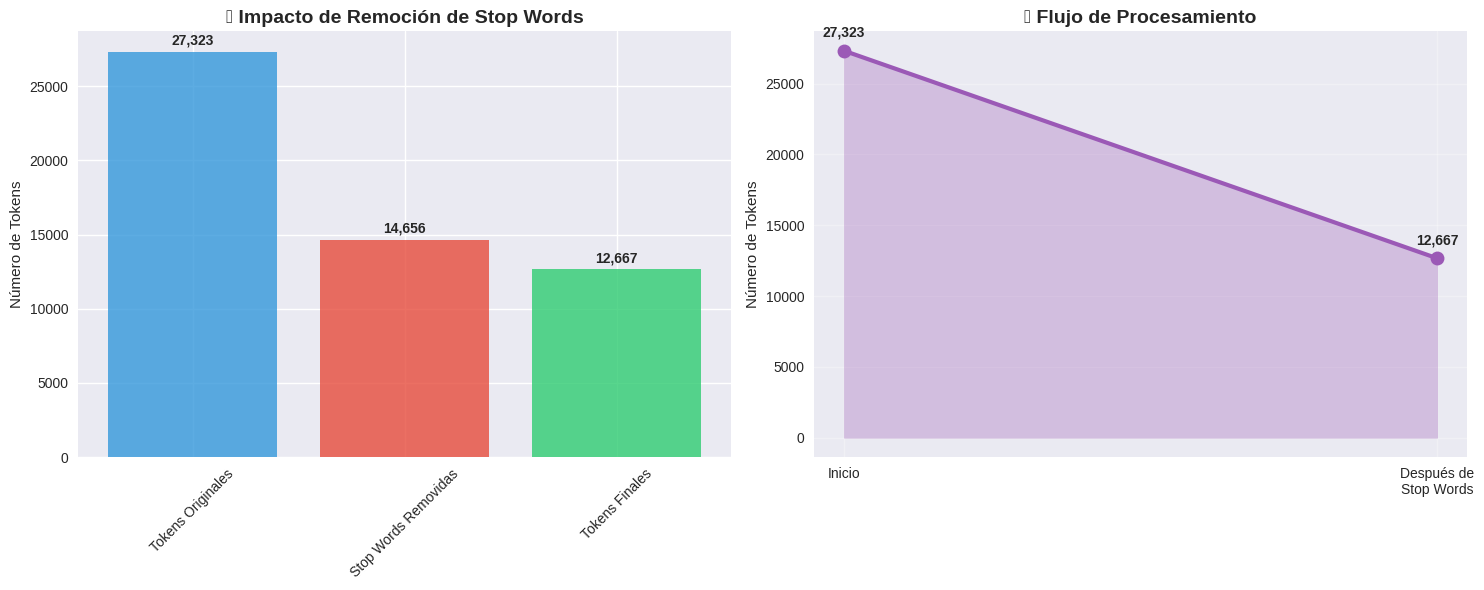

✅ PASO 3 COMPLETADO - Continuando...


In [6]:
print("\n🚫 PASO 3: REMOCIÓN DE STOP WORDS")
print("-" * 30)

def remover_stop_words(tokens):
    # Stop words en español + palabras legales
    stop_words = set(nltk.corpus.stopwords.words('spanish'))
    stop_words.update(['art', 'artículo', 'vs', 'señor', 'señora', 'doctor', 'doctora',
                      'mediante', 'decreto', 'ley', 'resolución', 'acuerdo'])

    print(f"🚫 Stop words cargadas: {len(stop_words)}")

    # Filtrar tokens
    tokens_originales = len(tokens)
    tokens_filtrados = [token for token in tokens if token.lower() not in stop_words and len(token) > 2]
    tokens_removidos = tokens_originales - len(tokens_filtrados)

    print(f"📊 Tokens originales: {tokens_originales:,}")
    print(f"❌ Tokens removidos: {tokens_removidos:,}")
    print(f"✅ Tokens restantes: {len(tokens_filtrados):,}")
    print(f"📉 Reducción: {(tokens_removidos/tokens_originales)*100:.1f}%")

    # Visualización PASO 3: Antes y después
    categorias = ['Tokens Originales', 'Stop Words Removidas', 'Tokens Finales']
    valores = [tokens_originales, tokens_removidos, len(tokens_filtrados)]
    colores = ['#3498db', '#e74c3c', '#2ecc71']

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Gráfico de barras comparativo
    bars = ax1.bar(categorias, valores, color=colores, alpha=0.8)
    ax1.set_title('📊 Impacto de Remoción de Stop Words', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Número de Tokens')
    ax1.tick_params(axis='x', rotation=45)

    for bar, valor in zip(bars, valores):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(valores)*0.01,
                f'{valor:,}', ha='center', va='bottom', fontweight='bold')

    # Gráfico de flujo (antes → después)
    etapas = ['Inicio', 'Después de\nStop Words']
    flujo = [tokens_originales, len(tokens_filtrados)]
    ax2.plot(etapas, flujo, marker='o', linewidth=3, markersize=10, color='#9b59b6')
    ax2.fill_between(etapas, flujo, alpha=0.3, color='#9b59b6')
    ax2.set_title('📈 Flujo de Procesamiento', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Número de Tokens')
    ax2.grid(True, alpha=0.3)

    for i, valor in enumerate(flujo):
        ax2.annotate(f'{valor:,}', (i, valor), textcoords="offset points",
                    xytext=(0,10), ha='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

    return tokens_filtrados

# Ejecutar PASO 3
tokens_sin_sw = remover_stop_words(tokens)
print("✅ PASO 3 COMPLETADO - Continuando...")


🔄 PASO 4: LEMATIZACIÓN
------------------------------
🔄 Aplicando lematización...
📊 Tokens procesados: 12,757
🔄 Tokens lematizados (cambiados): 3,410
📈 Tasa de lematización: 26.7%

🔍 Ejemplos de lematización:
      Original    Lematizado
       136.068        136068
          .068           068
       136.068        136068
  antecedentes   antecedente
    procesales      procesal
representantes representante
    apoderados     apoderado
         parte        partir
     convocada     convocado
 controversias  controversia


/tmp/ipython-input-7-2686239497.py:68: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-7-2686239497.py:68: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


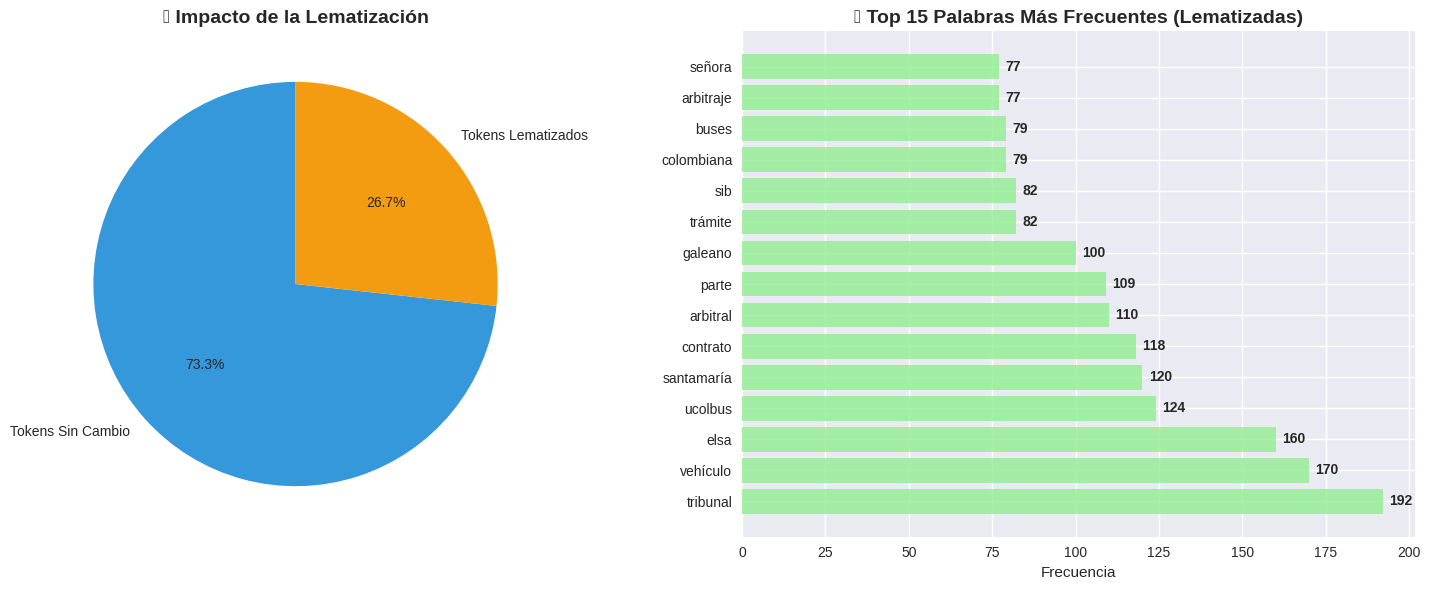

✅ PASO 4 COMPLETADO - Continuando...


In [7]:
print("\n🔄 PASO 4: LEMATIZACIÓN")
print("-" * 30)

def lematizar_texto(texto_limpio):
    print("🔄 Aplicando lematización...")
    doc = nlp(texto_limpio)

    # Análisis de lematización
    tokens_originales = []
    tokens_lematizados = []
    cambios = 0

    stop_words = set(nltk.corpus.stopwords.words('spanish'))

    for token in doc:
        if not token.is_punct and not token.is_space and token.text.lower() not in stop_words:
            if len(token.lemma_) > 2:
                original = token.text.lower()
                lematizado = token.lemma_.lower()

                tokens_originales.append(original)
                tokens_lematizados.append(lematizado)

                if original != lematizado:
                    cambios += 1

    print(f"📊 Tokens procesados: {len(tokens_lematizados):,}")
    print(f"🔄 Tokens lematizados (cambiados): {cambios:,}")
    print(f"📈 Tasa de lematización: {(cambios/len(tokens_lematizados))*100:.1f}%")

    # Mostrar algunos ejemplos de lematización
    ejemplos = []
    for i, (orig, lem) in enumerate(zip(tokens_originales, tokens_lematizados)):
        if orig != lem and len(ejemplos) < 10:
            ejemplos.append({'Original': orig, 'Lematizado': lem})

    if ejemplos:
        print("\n🔍 Ejemplos de lematización:")
        df_ejemplos = pd.DataFrame(ejemplos)
        print(df_ejemplos.to_string(index=False))

    # Visualización PASO 4: Análisis de lematización
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Gráfico de impacto de lematización
    categorias = ['Tokens Sin Cambio', 'Tokens Lematizados']
    valores = [len(tokens_lematizados) - cambios, cambios]
    colores = ['#3498db', '#f39c12']

    wedges, texts, autotexts = ax1.pie(valores, labels=categorias, colors=colores,
                                      autopct='%1.1f%%', startangle=90)
    ax1.set_title('🥧 Impacto de la Lematización', fontsize=14, fontweight='bold')

    # Frecuencia de palabras más comunes (lematizadas)
    frecuencias = Counter(tokens_lematizados).most_common(15)
    palabras = [item[0] for item in frecuencias]
    counts = [item[1] for item in frecuencias]

    bars = ax2.barh(palabras, counts, color='lightgreen', alpha=0.8)
    ax2.set_title('📊 Top 15 Palabras Más Frecuentes (Lematizadas)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Frecuencia')

    # Añadir valores en las barras
    for bar, count in zip(bars, counts):
        ax2.text(bar.get_width() + max(counts)*0.01, bar.get_y() + bar.get_height()/2,
                f'{count}', ha='left', va='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

    return tokens_lematizados

# Ejecutar PASO 4
tokens_lematizados = lematizar_texto(texto_limpio)
print("✅ PASO 4 COMPLETADO - Continuando...")


🏷️ PASO 5: RECONOCIMIENTO DE ENTIDADES NOMBRADAS
------------------------------
🔍 Identificando entidades nombradas...
🏷️ Total de entidades: 2160
📊 Tipos diferentes: 4

📋 Resumen por tipo:
   MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art): 975
   ORG (Companies, agencies, institutions, etc.): 491
   LOC (Non-GPE locations, mountain ranges, bodies of water): 438
   PER (Named person or family.): 256


/tmp/ipython-input-8-2827603432.py:80: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-8-2827603432.py:80: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-8-2827603432.py:80: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-8-2827603432.py:80: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-8-2827603432.py:80: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWar

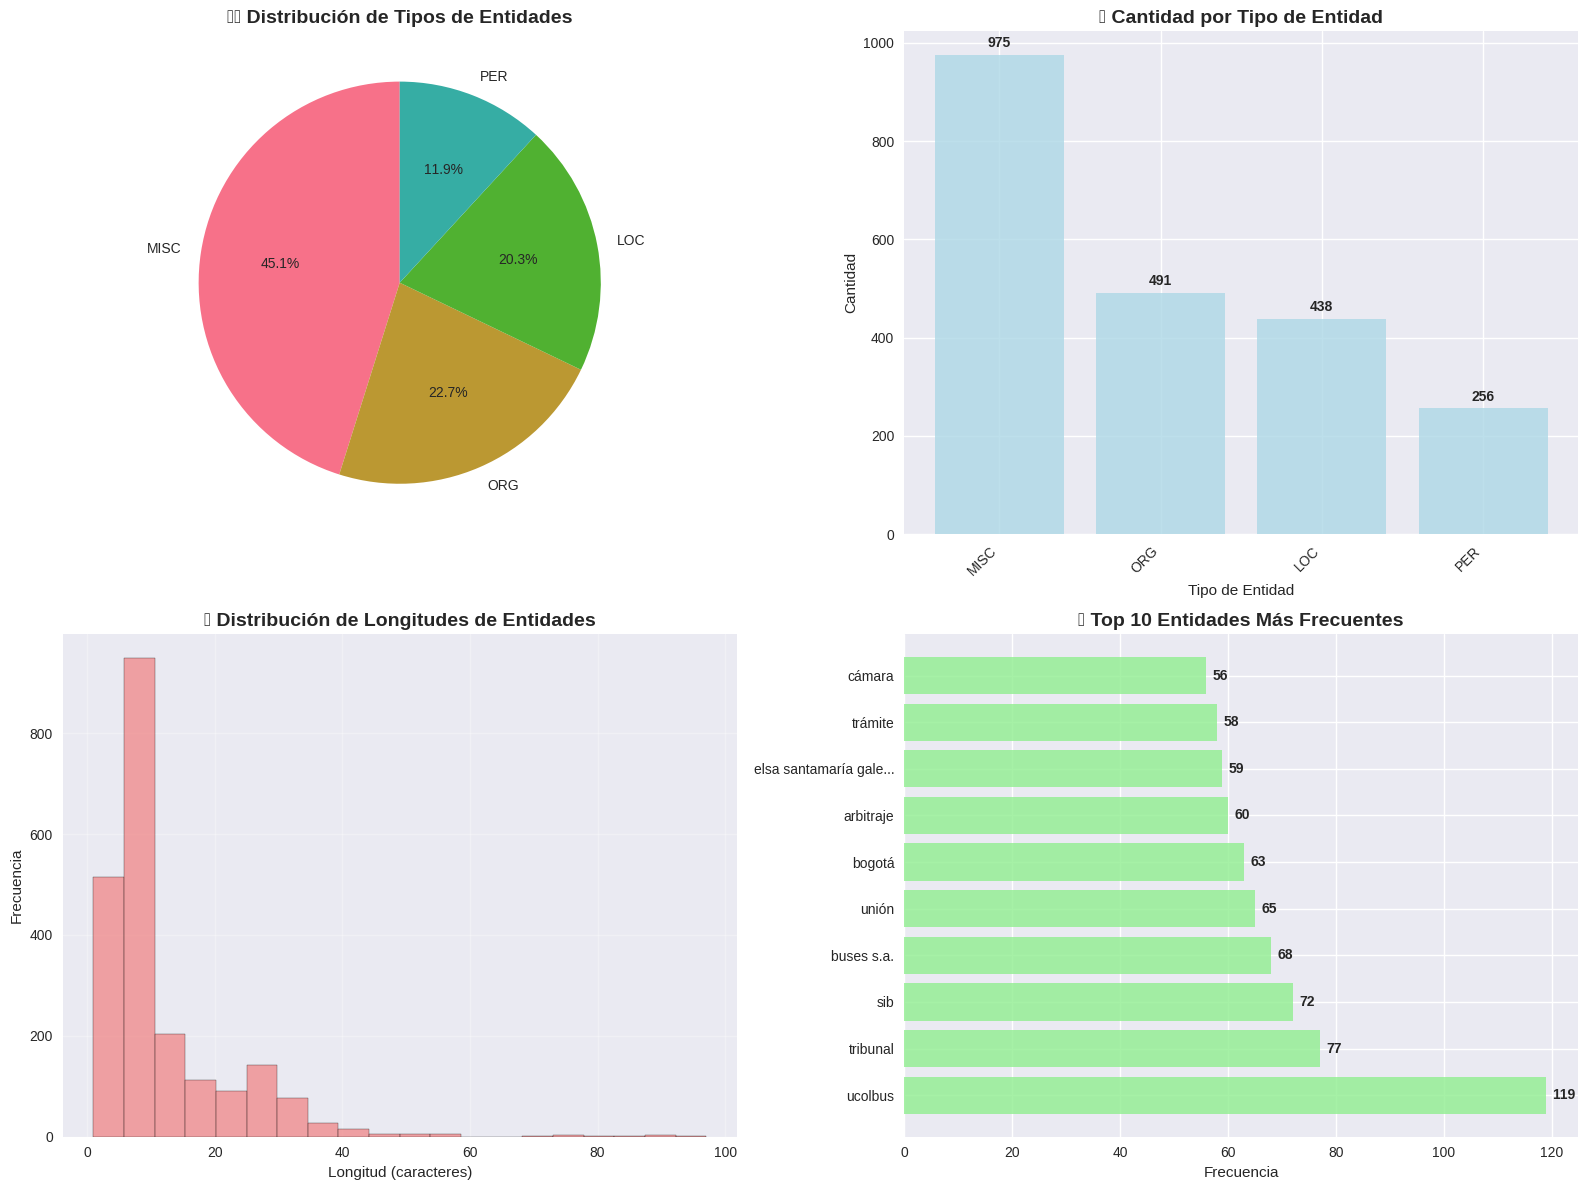

✅ PASO 5 COMPLETADO - Continuando...


In [8]:
print("\n🏷️ PASO 5: RECONOCIMIENTO DE ENTIDADES NOMBRADAS")
print("-" * 30)

def identificar_entidades(texto_limpio):
    print("🔍 Identificando entidades nombradas...")
    doc = nlp(texto_limpio)

    entidades = []
    for ent in doc.ents:
        entidades.append({
            'texto': ent.text,
            'etiqueta': ent.label_,
            'descripcion': spacy.explain(ent.label_) or ent.label_,
            'inicio': ent.start_char,
            'fin': ent.end_char
        })

    # Análisis de entidades
    tipos_entidades = Counter([ent['etiqueta'] for ent in entidades])
    print(f"🏷️ Total de entidades: {len(entidades)}")
    print(f"📊 Tipos diferentes: {len(tipos_entidades)}")

    print("\n📋 Resumen por tipo:")
    for tipo, cantidad in tipos_entidades.most_common():
        descripcion = spacy.explain(tipo) or tipo
        print(f"   {tipo} ({descripcion}): {cantidad}")

    # Visualización PASO 5: Análisis de entidades
    if entidades:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

        # Gráfico 1: Distribución de tipos de entidades
        if tipos_entidades:
            tipos = list(tipos_entidades.keys())
            cantidades = list(tipos_entidades.values())

            wedges, texts, autotexts = ax1.pie(cantidades, labels=tipos, autopct='%1.1f%%', startangle=90)
            ax1.set_title('🏷️ Distribución de Tipos de Entidades', fontsize=14, fontweight='bold')

        # Gráfico 2: Top entidades por tipo
        if len(tipos_entidades) > 0:
            bars = ax2.bar(range(len(tipos_entidades)), list(tipos_entidades.values()),
                          color='lightblue', alpha=0.8)
            ax2.set_title('📊 Cantidad por Tipo de Entidad', fontsize=14, fontweight='bold')
            ax2.set_xlabel('Tipo de Entidad')
            ax2.set_ylabel('Cantidad')
            ax2.set_xticks(range(len(tipos_entidades)))
            ax2.set_xticklabels(list(tipos_entidades.keys()), rotation=45, ha='right')

            for bar, cantidad in zip(bars, tipos_entidades.values()):
                ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(tipos_entidades.values())*0.01,
                        f'{cantidad}', ha='center', va='bottom', fontweight='bold')

        # Gráfico 3: Longitud de entidades
        longitudes = [len(ent['texto']) for ent in entidades]
        ax3.hist(longitudes, bins=20, color='lightcoral', alpha=0.7, edgecolor='black')
        ax3.set_title('📏 Distribución de Longitudes de Entidades', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Longitud (caracteres)')
        ax3.set_ylabel('Frecuencia')
        ax3.grid(True, alpha=0.3)

        # Gráfico 4: Entidades más frecuentes
        entidades_texto = [ent['texto'].lower() for ent in entidades]
        entidades_freq = Counter(entidades_texto).most_common(10)

        if entidades_freq:
            textos = [item[0] for item in entidades_freq]
            freqs = [item[1] for item in entidades_freq]

            bars = ax4.barh(range(len(textos)), freqs, color='lightgreen', alpha=0.8)
            ax4.set_title('🔝 Top 10 Entidades Más Frecuentes', fontsize=14, fontweight='bold')
            ax4.set_xlabel('Frecuencia')
            ax4.set_yticks(range(len(textos)))
            ax4.set_yticklabels([t[:20] + '...' if len(t) > 20 else t for t in textos])

            for bar, freq in zip(bars, freqs):
                ax4.text(bar.get_width() + max(freqs)*0.01, bar.get_y() + bar.get_height()/2,
                        f'{freq}', ha='left', va='center', fontweight='bold')

        plt.tight_layout()
        plt.show()

    return entidades, tipos_entidades

# Ejecutar PASO 5
entidades, tipos_entidades = identificar_entidades(texto_limpio)
print("✅ PASO 5 COMPLETADO - Continuando...")


🌟 PASO 6: ALGORITMO TEXTRANK
------------------------------
📝 Dividiendo texto en oraciones...
📊 Oraciones encontradas: 736
🔢 Calculando similitudes TF-IDF...
🕸️ Creando grafo de similitudes...
🏆 Top 10 oraciones más importantes:

1. (Score: 0.0036)
   📏 Longitud: 176 caracteres
   📝 UNIÓN COLOMBIANA DE BUSES S.A. (Trámite 136.068) Página 1 de 58 CENTRO DE ARBITRAJE Y CONCILIACIÓN CÁMARA DE COMERCIO DE BOGOTÁ TRIBUNAL ARBITRAL DE E...

2. (Score: 0.0033)
   📏 Longitud: 209 caracteres
   📝 UNIÓN COLOMBIANA DE BUSES S.A. LAUDO ARBITRAL TRÁMITE 136 .068 BOGOTÁ, D. C., 20 D ABRIL DE 2023 CÁMARA DE COMERCIO DE BOGOTÁ CENTRO DE ARBITRAJE Y CO...

3. (Score: 0.0032)
   📏 Longitud: 112 caracteres
   📝 CÁMARA DE COMERCIO DE BOGOTÁ CENTRO DE ARBITRAJE Y CONCILIACIÓN TRIBUNAL ARBITRAL DE ELSA SANTAMARÍA GALEANO Vs.

4. (Score: 0.0032)
   📏 Longitud: 112 caracteres
   📝 CÁMARA DE COMERCIO DE BOGOTÁ CENTRO DE ARBITRAJE Y CONCILIACIÓN TRIBUNAL ARBITRAL DE ELSA SANTAMARÍA GALEANO Vs.

5. (Score: 0.0

/tmp/ipython-input-9-2513886660.py:108: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-9-2513886660.py:108: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-9-2513886660.py:108: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-9-2513886660.py:108: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


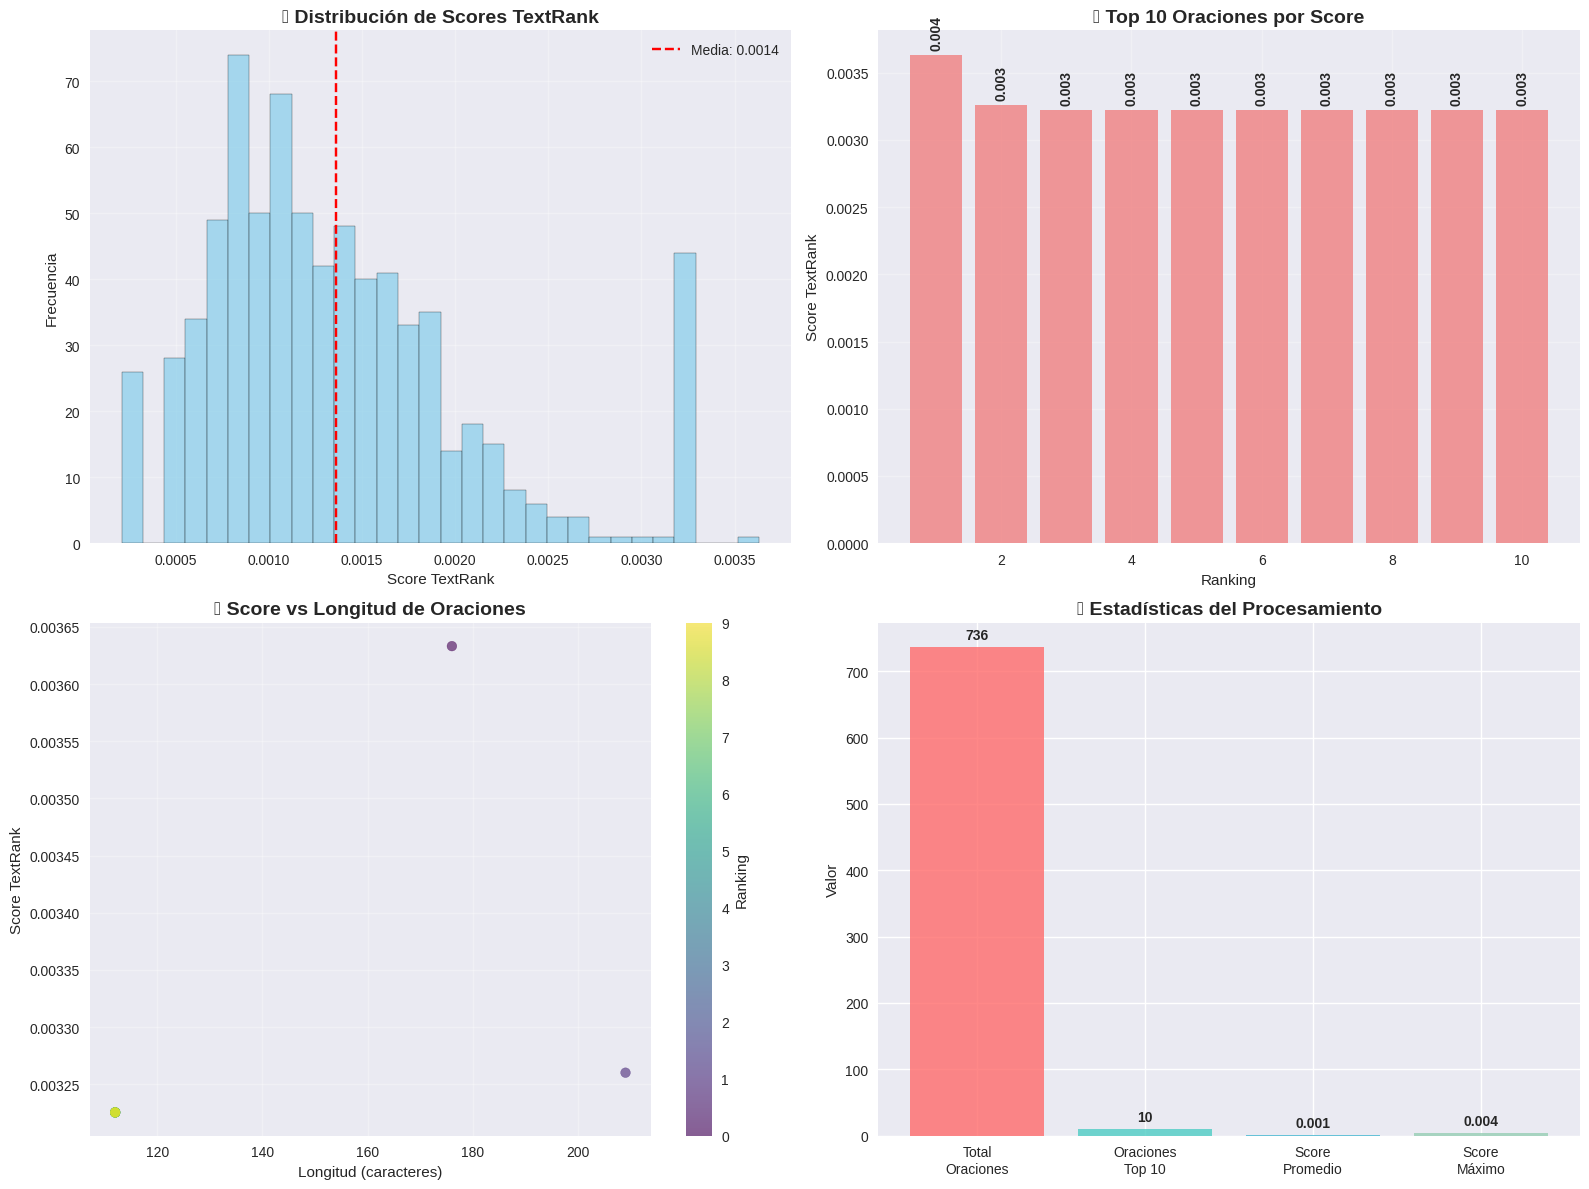

✅ PASO 6 COMPLETADO!


In [9]:
print("\n🌟 PASO 6: ALGORITMO TEXTRANK")
print("-" * 30)

def aplicar_textrank(texto_limpio, num_oraciones=10):
    print("📝 Dividiendo texto en oraciones...")
    doc = nlp(texto_limpio)
    oraciones = [sent.text.strip() for sent in doc.sents if len(sent.text.strip()) > 20]

    print(f"📊 Oraciones encontradas: {len(oraciones)}")

    if len(oraciones) < 2:
        print("❌ No hay suficientes oraciones para TextRank")
        return [], []

    print("🔢 Calculando similitudes TF-IDF...")

    # Stop words para TF-IDF
    stop_words = list(nltk.corpus.stopwords.words('spanish'))

    # Crear matriz TF-IDF
    vectorizador = TfidfVectorizer(stop_words=stop_words, max_features=1000)
    matriz_tfidf = vectorizador.fit_transform(oraciones)
    matriz_similitud = cosine_similarity(matriz_tfidf)

    print("🕸️ Creando grafo de similitudes...")
    # Crear grafo
    grafo = nx.from_numpy_array(matriz_similitud)

    # Calcular PageRank (TextRank)
    scores = nx.pagerank(grafo, max_iter=100, tol=1e-6)

    # Ordenar oraciones por score
    oraciones_rankeadas = [(i, scores[i], oraciones[i]) for i in range(len(oraciones))]
    oraciones_rankeadas.sort(key=lambda x: x[1], reverse=True)

    print(f"🏆 Top {min(num_oraciones, len(oraciones))} oraciones más importantes:")

    resultados = []
    for i, (idx, score, oracion) in enumerate(oraciones_rankeadas[:num_oraciones]):
        resultados.append({
            'posicion': i + 1,
            'score': score,
            'oracion': oracion,
            'longitud': len(oracion)
        })
        print(f"\n{i+1}. (Score: {score:.4f})")
        print(f"   📏 Longitud: {len(oracion)} caracteres")
        print(f"   📝 {oracion[:150]}{'...' if len(oracion) > 150 else ''}")

    # Visualización PASO 6: Análisis de TextRank
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # Gráfico 1: Distribución de scores
    todos_scores = list(scores.values())
    ax1.hist(todos_scores, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
    ax1.axvline(np.mean(todos_scores), color='red', linestyle='--', label=f'Media: {np.mean(todos_scores):.4f}')
    ax1.set_title('📊 Distribución de Scores TextRank', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Score TextRank')
    ax1.set_ylabel('Frecuencia')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Gráfico 2: Top scores
    top_scores = [r['score'] for r in resultados[:10]]
    posiciones = [r['posicion'] for r in resultados[:10]]

    bars = ax2.bar(posiciones, top_scores, color='lightcoral', alpha=0.8)
    ax2.set_title('🏆 Top 10 Oraciones por Score', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Ranking')
    ax2.set_ylabel('Score TextRank')
    ax2.grid(True, alpha=0.3)

    for bar, score in zip(bars, top_scores):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(top_scores)*0.01,
                f'{score:.3f}', ha='center', va='bottom', fontweight='bold', rotation=90)

    # Gráfico 3: Relación score vs longitud
    longitudes = [r['longitud'] for r in resultados]
    scores_top = [r['score'] for r in resultados]

    scatter = ax3.scatter(longitudes, scores_top, alpha=0.6, c=range(len(longitudes)), cmap='viridis')
    ax3.set_title('📏 Score vs Longitud de Oraciones', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Longitud (caracteres)')
    ax3.set_ylabel('Score TextRank')
    ax3.grid(True, alpha=0.3)

    # Añadir colorbar
    cbar = plt.colorbar(scatter, ax=ax3)
    cbar.set_label('Ranking')

    # Gráfico 4: Estadísticas del procesamiento
    stats_labels = ['Total\nOraciones', 'Oraciones\nTop 10', 'Score\nPromedio', 'Score\nMáximo']
    stats_values = [len(oraciones), min(10, len(oraciones)),
                   np.mean(todos_scores)*1000, max(todos_scores)*1000]  # *1000 para visualización

    bars = ax4.bar(stats_labels, stats_values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'], alpha=0.8)
    ax4.set_title('📈 Estadísticas del Procesamiento', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Valor')

    for bar, value in zip(bars, stats_values):
        if 'Score' in stats_labels[bars.index(bar)]:
            display_val = f'{value/1000:.3f}'
        else:
            display_val = f'{int(value)}'
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(stats_values)*0.01,
                display_val, ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    return resultados, oraciones_rankeadas

# Ejecutar PASO 6
resultados_textrank, todas_oraciones = aplicar_textrank(texto_limpio)
print("✅ PASO 6 COMPLETADO!")


🌟 PASO 6: ALGORITMO TEXTRANK
------------------------------
📝 Dividiendo texto en oraciones...
📊 Oraciones encontradas después del filtrado: 616
🔢 Calculando similitudes TF-IDF...
🕸️ Creando grafo de similitudes...
🏆 Top 10 oraciones más importantes:

1. (Score: 0.0035)
   📏 Longitud: 523 caracteres
   📝 A efectos de determinar los saldos generados a favor de la convocante por la explotación comercial del bus SIB -657 durante el 1º de abril de 2019 has...

2. (Score: 0.0035)
   📏 Longitud: 95 caracteres
   📝 ¿El contrato de vinculación del vehículo SIB -657 fue modificado por la conducta de las partes?

3. (Score: 0.0035)
   📏 Longitud: 268 caracteres
   📝 Liquidación total de l contrato de vinculación del vehículo SIB -657 El Tribunal considera necesario hacer una relación de las sumas que serán reconoc...

4. (Score: 0.0034)
   📏 Longitud: 926 caracteres
   📝 Para alcanzar una determinación sobre los montos de los ingresos derivados de la explotación del bus SIB -657 durante el perí

/tmp/ipython-input-10-2000786724.py:125: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-10-2000786724.py:125: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-10-2000786724.py:125: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-10-2000786724.py:125: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()


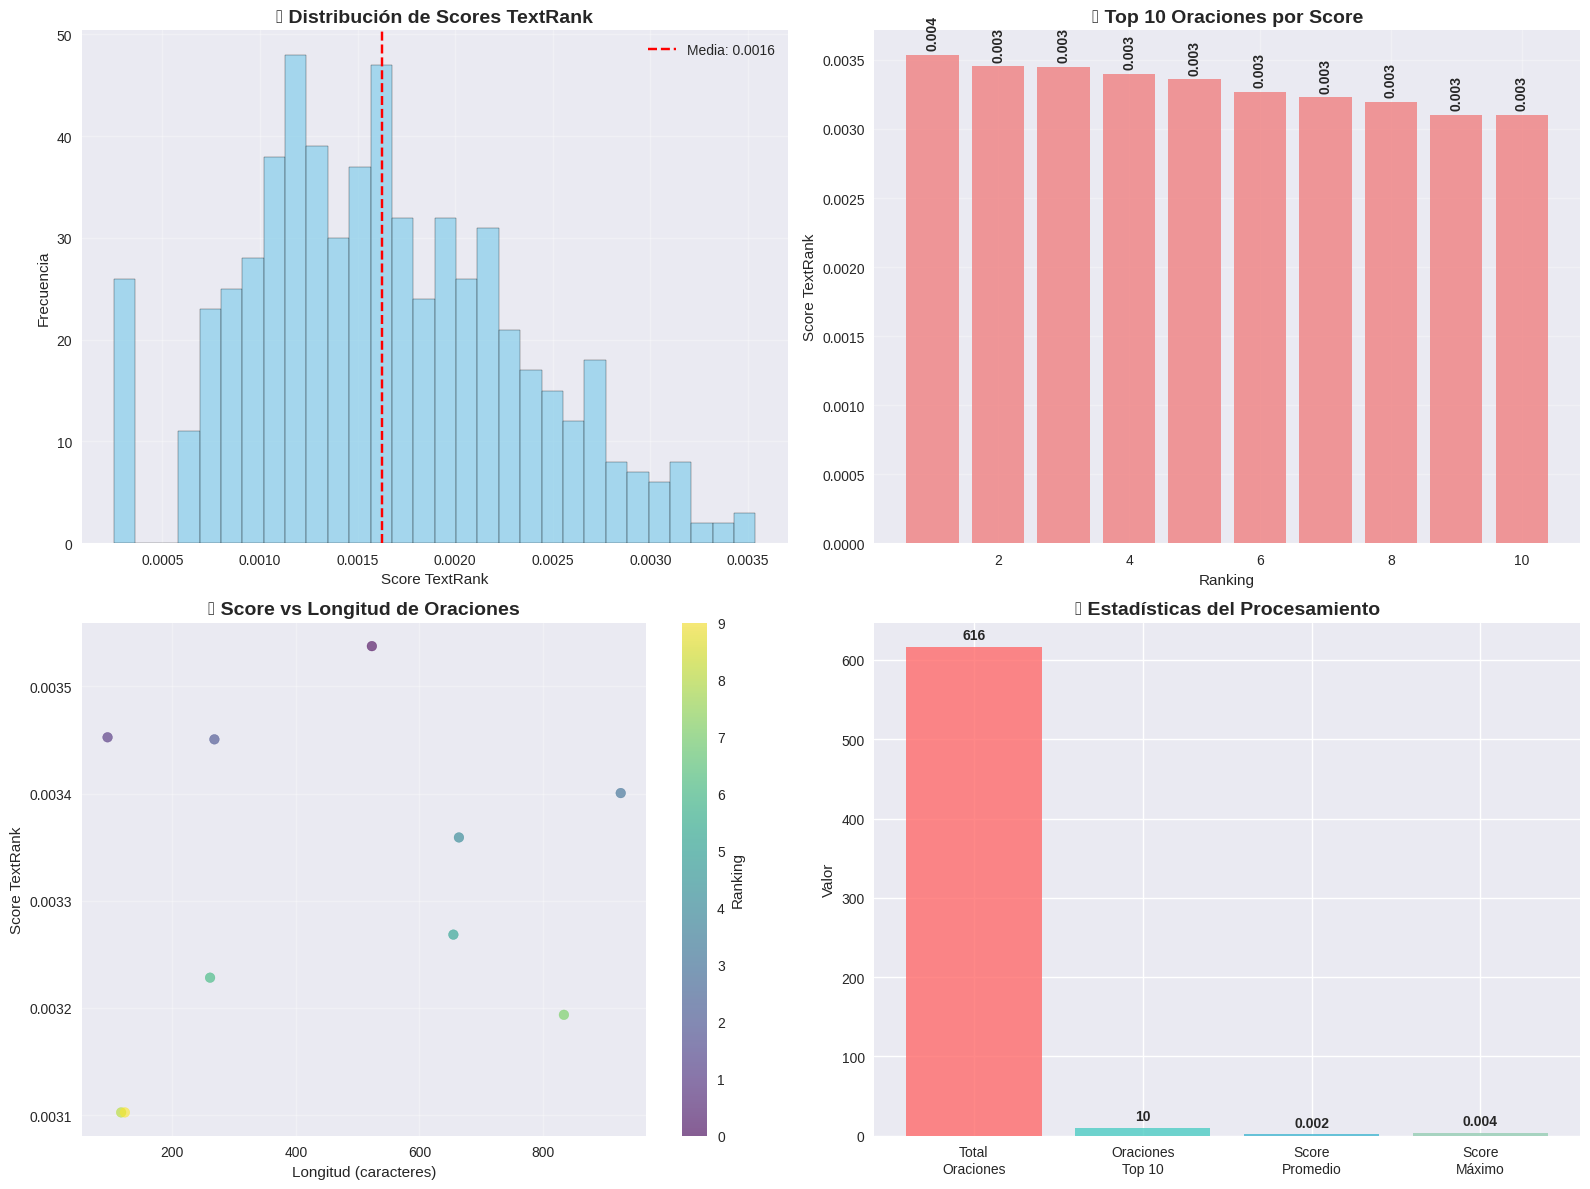

✅ PASO 6 COMPLETADO!


In [10]:
print("\n🌟 PASO 6: ALGORITMO TEXTRANK")
print("-" * 30)

def aplicar_textrank(texto_limpio, num_oraciones=10):
    print("📝 Dividiendo texto en oraciones...")
    doc = nlp(texto_limpio)
    oraciones = [sent.text.strip() for sent in doc.sents if len(sent.text.strip()) > 20]

    # Filtrar frases específicas
    frases_a_eliminar = [
        "CÁMARA DE COMERCIO DE BOGOTÁ",
        "CENTRO DE ARBITRAJE Y CONCILIACIÓN",
        "TRIBUNAL ARBITRAL DE ELSA SANTAMARÍA GALEANO Vs. UNIÓN COLOMBIANA DE BUSES S.A.",
        "Trámite 136.068"
    ]

    oraciones_filtradas = []
    for oracion in oraciones:
        # Verificar si la oración contiene alguna de las frases a eliminar
        contiene_frase_eliminar = any(frase.lower() in oracion.lower() for frase in frases_a_eliminar)
        if not contiene_frase_eliminar:
            oraciones_filtradas.append(oracion)

    oraciones = oraciones_filtradas

    print(f"📊 Oraciones encontradas después del filtrado: {len(oraciones)}")

    if len(oraciones) < 2:
        print("❌ No hay suficientes oraciones para TextRank")
        return [], []

    print("🔢 Calculando similitudes TF-IDF...")

    # Stop words para TF-IDF
    stop_words = list(nltk.corpus.stopwords.words('spanish'))

    # Crear matriz TF-IDF
    vectorizador = TfidfVectorizer(stop_words=stop_words, max_features=1000)
    matriz_tfidf = vectorizador.fit_transform(oraciones)
    matriz_similitud = cosine_similarity(matriz_tfidf)

    print("🕸️ Creando grafo de similitudes...")
    # Crear grafo
    grafo = nx.from_numpy_array(matriz_similitud)

    # Calcular PageRank (TextRank)
    scores = nx.pagerank(grafo, max_iter=100, tol=1e-6)

    # Ordenar oraciones por score
    oraciones_rankeadas = [(i, scores[i], oraciones[i]) for i in range(len(oraciones))]
    oraciones_rankeadas.sort(key=lambda x: x[1], reverse=True)

    print(f"🏆 Top {min(num_oraciones, len(oraciones))} oraciones más importantes:")

    resultados = []
    for i, (idx, score, oracion) in enumerate(oraciones_rankeadas[:num_oraciones]):
        resultados.append({
            'posicion': i + 1,
            'score': score,
            'oracion': oracion,
            'longitud': len(oracion)
        })
        print(f"\n{i+1}. (Score: {score:.4f})")
        print(f"   📏 Longitud: {len(oracion)} caracteres")
        print(f"   📝 {oracion[:150]}{'...' if len(oracion) > 150 else ''}")

    # Visualización PASO 6: Análisis de TextRank
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # Gráfico 1: Distribución de scores
    todos_scores = list(scores.values())
    ax1.hist(todos_scores, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
    ax1.axvline(np.mean(todos_scores), color='red', linestyle='--', label=f'Media: {np.mean(todos_scores):.4f}')
    ax1.set_title('📊 Distribución de Scores TextRank', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Score TextRank')
    ax1.set_ylabel('Frecuencia')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Gráfico 2: Top scores
    top_scores = [r['score'] for r in resultados[:10]]
    posiciones = [r['posicion'] for r in resultados[:10]]

    bars = ax2.bar(posiciones, top_scores, color='lightcoral', alpha=0.8)
    ax2.set_title('🏆 Top 10 Oraciones por Score', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Ranking')
    ax2.set_ylabel('Score TextRank')
    ax2.grid(True, alpha=0.3)

    for bar, score in zip(bars, top_scores):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(top_scores)*0.01,
                f'{score:.3f}', ha='center', va='bottom', fontweight='bold', rotation=90)

    # Gráfico 3: Relación score vs longitud
    longitudes = [r['longitud'] for r in resultados]
    scores_top = [r['score'] for r in resultados]

    scatter = ax3.scatter(longitudes, scores_top, alpha=0.6, c=range(len(longitudes)), cmap='viridis')
    ax3.set_title('📏 Score vs Longitud de Oraciones', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Longitud (caracteres)')
    ax3.set_ylabel('Score TextRank')
    ax3.grid(True, alpha=0.3)

    # Añadir colorbar
    cbar = plt.colorbar(scatter, ax=ax3)
    cbar.set_label('Ranking')

    # Gráfico 4: Estadísticas del procesamiento
    stats_labels = ['Total\nOraciones', 'Oraciones\nTop 10', 'Score\nPromedio', 'Score\nMáximo']
    stats_values = [len(oraciones), min(10, len(oraciones)),
                   np.mean(todos_scores)*1000, max(todos_scores)*1000]  # *1000 para visualización

    bars = ax4.bar(stats_labels, stats_values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'], alpha=0.8)
    ax4.set_title('📈 Estadísticas del Procesamiento', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Valor')

    for bar, value in zip(bars, stats_values):
        if 'Score' in stats_labels[bars.index(bar)]:
            display_val = f'{value/1000:.3f}'
        else:
            display_val = f'{int(value)}'
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(stats_values)*0.01,
                display_val, ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    return resultados, oraciones_rankeadas

# Ejecutar PASO 6
resultados_textrank, todas_oraciones = aplicar_textrank(texto_limpio)
print("✅ PASO 6 COMPLETADO!")

In [11]:
# EXPORTACIÓN A EXCEL - Línea adicional
import pandas as pd
from datetime import datetime

def exportar_resultados_excel(resultados_textrank, todas_oraciones, texto_limpio):
    """
    Exporta todos los resultados del análisis TextRank a un archivo Excel
    """
    print("\n📁 EXPORTANDO RESULTADOS A EXCEL...")
    print("-" * 40)

    # Crear un archivo Excel con múltiples hojas
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    nombre_archivo = f"analisis_textrank_{timestamp}.xlsx"

    with pd.ExcelWriter(nombre_archivo, engine='openpyxl') as writer:

        # HOJA 1: Top Oraciones Rankeadas
        df_top = pd.DataFrame(resultados_textrank)
        df_top.to_excel(writer, sheet_name='Top_Oraciones', index=False)

        # HOJA 2: Todas las Oraciones con Scores
        df_todas = pd.DataFrame([
            {
                'posicion': i + 1,
                'score': oracion[1],
                'oracion': oracion[2],
                'longitud_caracteres': len(oracion[2]),
                'longitud_palabras': len(oracion[2].split())
            }
            for i, oracion in enumerate(todas_oraciones)
        ])
        df_todas.to_excel(writer, sheet_name='Todas_Oraciones', index=False)

        # HOJA 3: Análisis de Palabras Clave
        from collections import Counter
        import re

        # Extraer palabras del texto limpio
        palabras = re.findall(r'\b[a-záéíóúñ]{3,}\b', texto_limpio.lower())
        contador_palabras = Counter(palabras)

        df_palabras = pd.DataFrame([
            {'palabra': palabra, 'frecuencia': freq}
            for palabra, freq in contador_palabras.most_common(50)
        ])
        df_palabras.to_excel(writer, sheet_name='Palabras_Frecuentes', index=False)

        # HOJA 4: Estadísticas Generales
        df_stats = pd.DataFrame([
            {'Métrica': 'Total de oraciones procesadas', 'Valor': len(todas_oraciones)},
            {'Métrica': 'Oraciones en top ranking', 'Valor': len(resultados_textrank)},
            {'Métrica': 'Score promedio', 'Valor': sum(o[1] for o in todas_oraciones) / len(todas_oraciones)},
            {'Métrica': 'Score máximo', 'Valor': max(o[1] for o in todas_oraciones)},
            {'Métrica': 'Score mínimo', 'Valor': min(o[1] for o in todas_oraciones)},
            {'Métrica': 'Longitud promedio oraciones (caracteres)', 'Valor': sum(len(o[2]) for o in todas_oraciones) / len(todas_oraciones)},
            {'Métrica': 'Total de palabras únicas', 'Valor': len(contador_palabras)},
            {'Métrica': 'Fecha de análisis', 'Valor': datetime.now().strftime("%Y-%m-%d %H:%M:%S")}
        ])
        df_stats.to_excel(writer, sheet_name='Estadisticas', index=False)

        # HOJA 5: Temas Principales (basado en las top oraciones)
        temas_extraidos = []
        for resultado in resultados_textrank[:10]:  # Top 10 oraciones
            # Extraer palabras clave de cada oración
            oracion = resultado['oracion'].lower()
            palabras_oracion = re.findall(r'\b[a-záéíóúñ]{4,}\b', oracion)
            temas_extraidos.extend(palabras_oracion)

        contador_temas = Counter(temas_extraidos)
        df_temas = pd.DataFrame([
            {'tema_palabra': tema, 'frecuencia_en_top': freq, 'relevancia': freq / len(resultados_textrank)}
            for tema, freq in contador_temas.most_common(20)
        ])
        df_temas.to_excel(writer, sheet_name='Temas_Principales', index=False)

    print(f"✅ Archivo exportado exitosamente: {nombre_archivo}")
    print(f"📊 Hojas creadas:")
    print("   • Top_Oraciones: Las mejores oraciones rankeadas")
    print("   • Todas_Oraciones: Todas las oraciones con sus scores")
    print("   • Palabras_Frecuentes: Las 50 palabras más frecuentes")
    print("   • Estadisticas: Métricas generales del análisis")
    print("   • Temas_Principales: Temas extraídos de las top oraciones")

    return nombre_archivo

# LÍNEA ADICIONAL PARA AGREGAR AL FINAL DEL CÓDIGO ORIGINAL:
archivo_excel = exportar_resultados_excel(resultados_textrank, todas_oraciones, texto_limpio)


📁 EXPORTANDO RESULTADOS A EXCEL...
----------------------------------------
✅ Archivo exportado exitosamente: analisis_textrank_20250724_131800.xlsx
📊 Hojas creadas:
   • Top_Oraciones: Las mejores oraciones rankeadas
   • Todas_Oraciones: Todas las oraciones con sus scores
   • Palabras_Frecuentes: Las 50 palabras más frecuentes
   • Estadisticas: Métricas generales del análisis
   • Temas_Principales: Temas extraídos de las top oraciones



🎉 RESUMEN FINAL DEL PROCESAMIENTO


/tmp/ipython-input-12-2152589715.py:55: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-12-2152589715.py:55: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-12-2152589715.py:55: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-12-2152589715.py:55: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


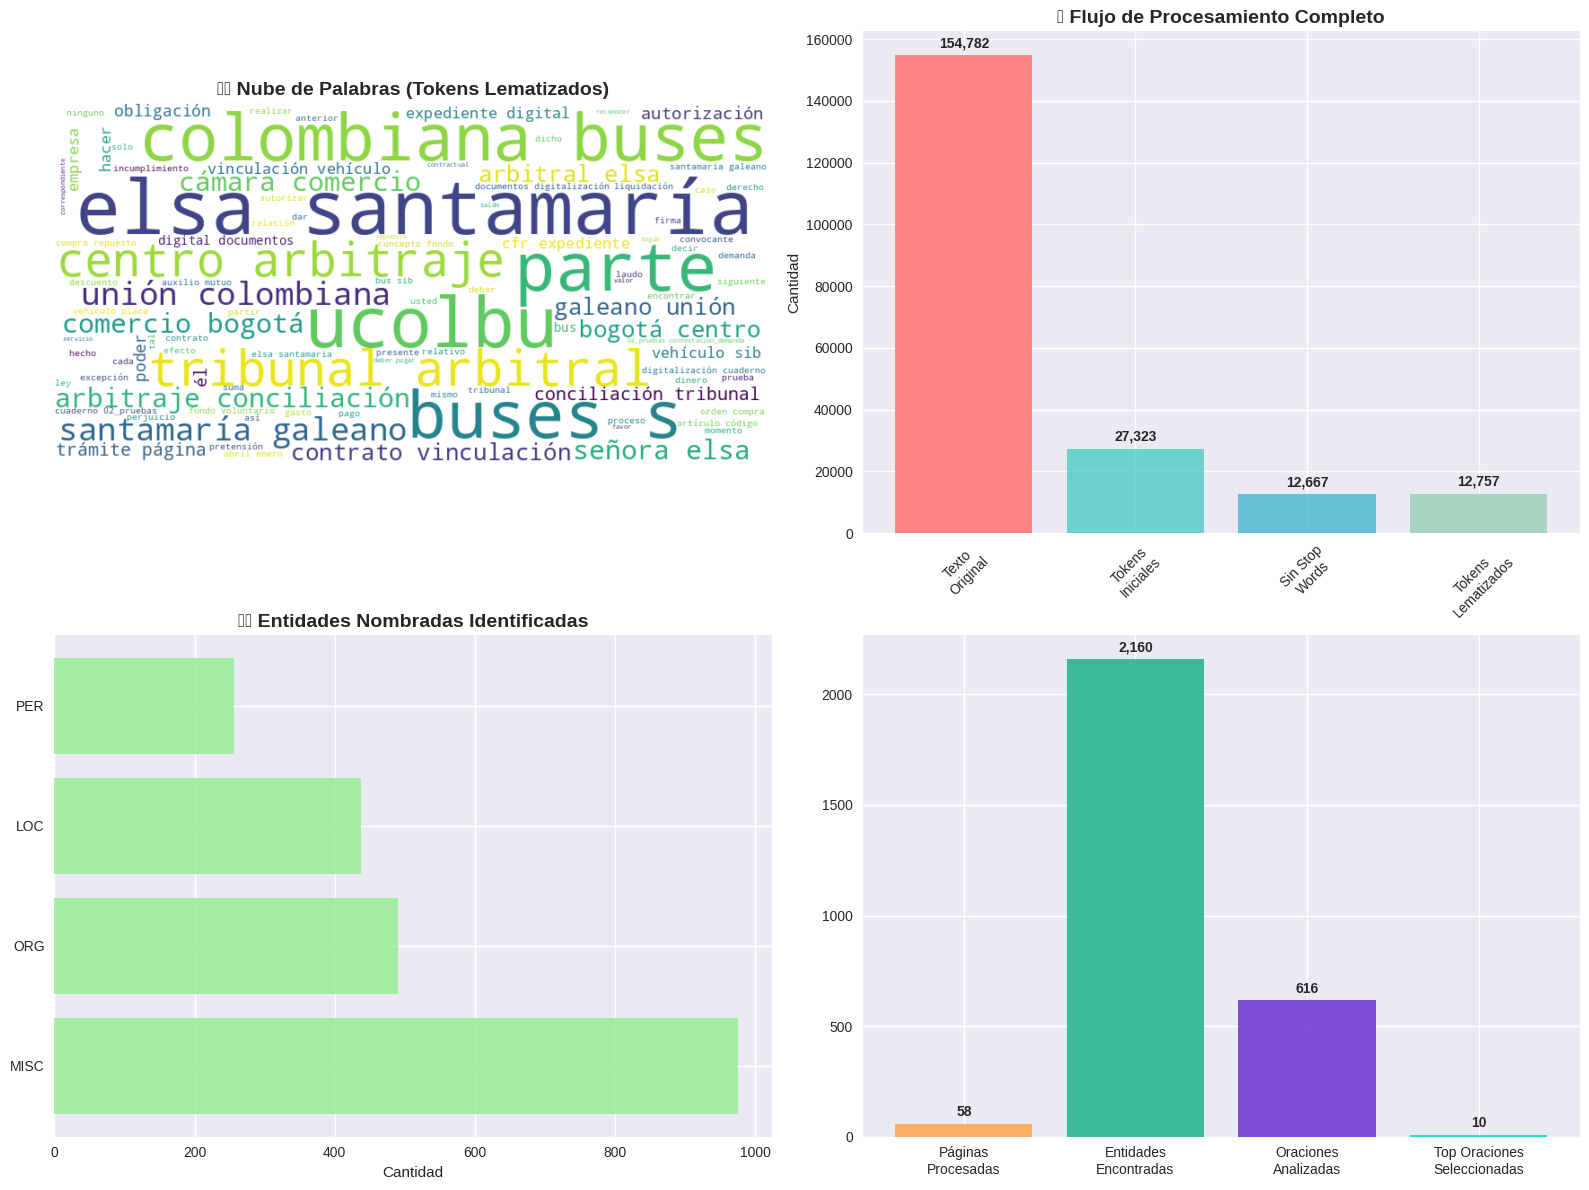


✅ Resumen final generado y visualizado.


In [12]:
# RESUMEN FINAL CON NUBE DE PALABRAS
# =============================================================================
print("\n🎉 RESUMEN FINAL DEL PROCESAMIENTO")
print("=" * 50)

# Crear nube de palabras
texto_para_nube = ' '.join(tokens_lematizados)
wordcloud = WordCloud(width=800, height=400,
                     background_color='white',
                     colormap='viridis',
                     max_words=100).generate(texto_para_nube)

# Visualización final
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Nube de palabras
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.set_title('☁️ Nube de Palabras (Tokens Lematizados)', fontsize=14, fontweight='bold')
ax1.axis('off')

# Estadísticas del procesamiento
etapas = ['Texto\nOriginal', 'Tokens\nIniciales', 'Sin Stop\nWords', 'Tokens\nLematizados']
cantidades = [len(texto_crudo), len(tokens), len(tokens_sin_sw), len(tokens_lematizados)]

bars = ax2.bar(etapas, cantidades, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'], alpha=0.8)
ax2.set_title('📊 Flujo de Procesamiento Completo', fontsize=14, fontweight='bold')
ax2.set_ylabel('Cantidad')
ax2.tick_params(axis='x', rotation=45)

for bar, cantidad in zip(bars, cantidades):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(cantidades)*0.01,
            f'{cantidad:,}', ha='center', va='bottom', fontweight='bold')

# Distribución de entidades
if tipos_entidades:
    tipos = list(tipos_entidades.keys())[:8]  # Top 8
    counts = list(tipos_entidades.values())[:8]

    bars = ax3.barh(tipos, counts, color='lightgreen', alpha=0.8)
    ax3.set_title('🏷️ Entidades Nombradas Identificadas', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Cantidad')

# Métricas finales
metricas = ['Páginas\nProcesadas', 'Entidades\nEncontradas', 'Oraciones\nAnalizadas', 'Top Oraciones\nSeleccionadas']
valores_metricas = [len(info_paginas) if info_paginas is not None else 0,
                   len(entidades), len(todas_oraciones), len(resultados_textrank)]

bars = ax4.bar(metricas, valores_metricas, color=['#FF9F43', '#10AC84', '#5F27CD', '#00D2D3'], alpha=0.8) # Fixed the syntax error here

for bar, valor in zip(bars, valores_metricas):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(valores_metricas)*0.01,
            f'{valor:,}', ha='center', va='bottom', fontweight='bold')


plt.tight_layout()
plt.show()

print("\n✅ Resumen final generado y visualizado.")

**Representación LDA**


🌟 PASO 7: ANÁLISIS LDA - MODELADO DE TEMAS
--------------------------------------------------
🚀 Iniciando análisis LDA...
📝 Preparando texto para LDA...
📊 Total de oraciones procesadas: 701
🔤 Tokenizando y limpiando oraciones...
✅ Documentos válidos para LDA: 653
📚 Creando diccionario y corpus...
📖 Tamaño del diccionario: 1449
📄 Tamaño del corpus: 653
🤖 Entrenando modelo LDA con 5 temas...
🏆 Temas descubiertos:

📌 TEMA 1:
   0.026*"que" + 0.020*"del" + 0.018*"las" + 0.014*"los" + 0.010*"por" + 0.009*"como" + 0.009*"elsa" + 0.008*"santamaria" + 0.007*"este" + 0.007*"autorizaciones"

📌 TEMA 2:
   0.049*"que" + 0.044*"del" + 0.026*"por" + 0.024*"los" + 0.021*"las" + 0.017*"para" + 0.013*"trámite" + 0.012*"unión" + 0.012*"136" + 0.012*"068"

📌 TEMA 3:
   0.043*"elsa" + 0.038*"galeano" + 0.032*"arbitraje" + 0.032*"santamaría" + 0.032*"centro" + 0.031*"conciliación" + 0.025*"por" + 0.025*"los" + 0.021*"que" + 0.011*"concepto"

📌 TEMA 4:
   0.047*"que" + 0.026*"del" + 0.026*"los" + 0.020*"po

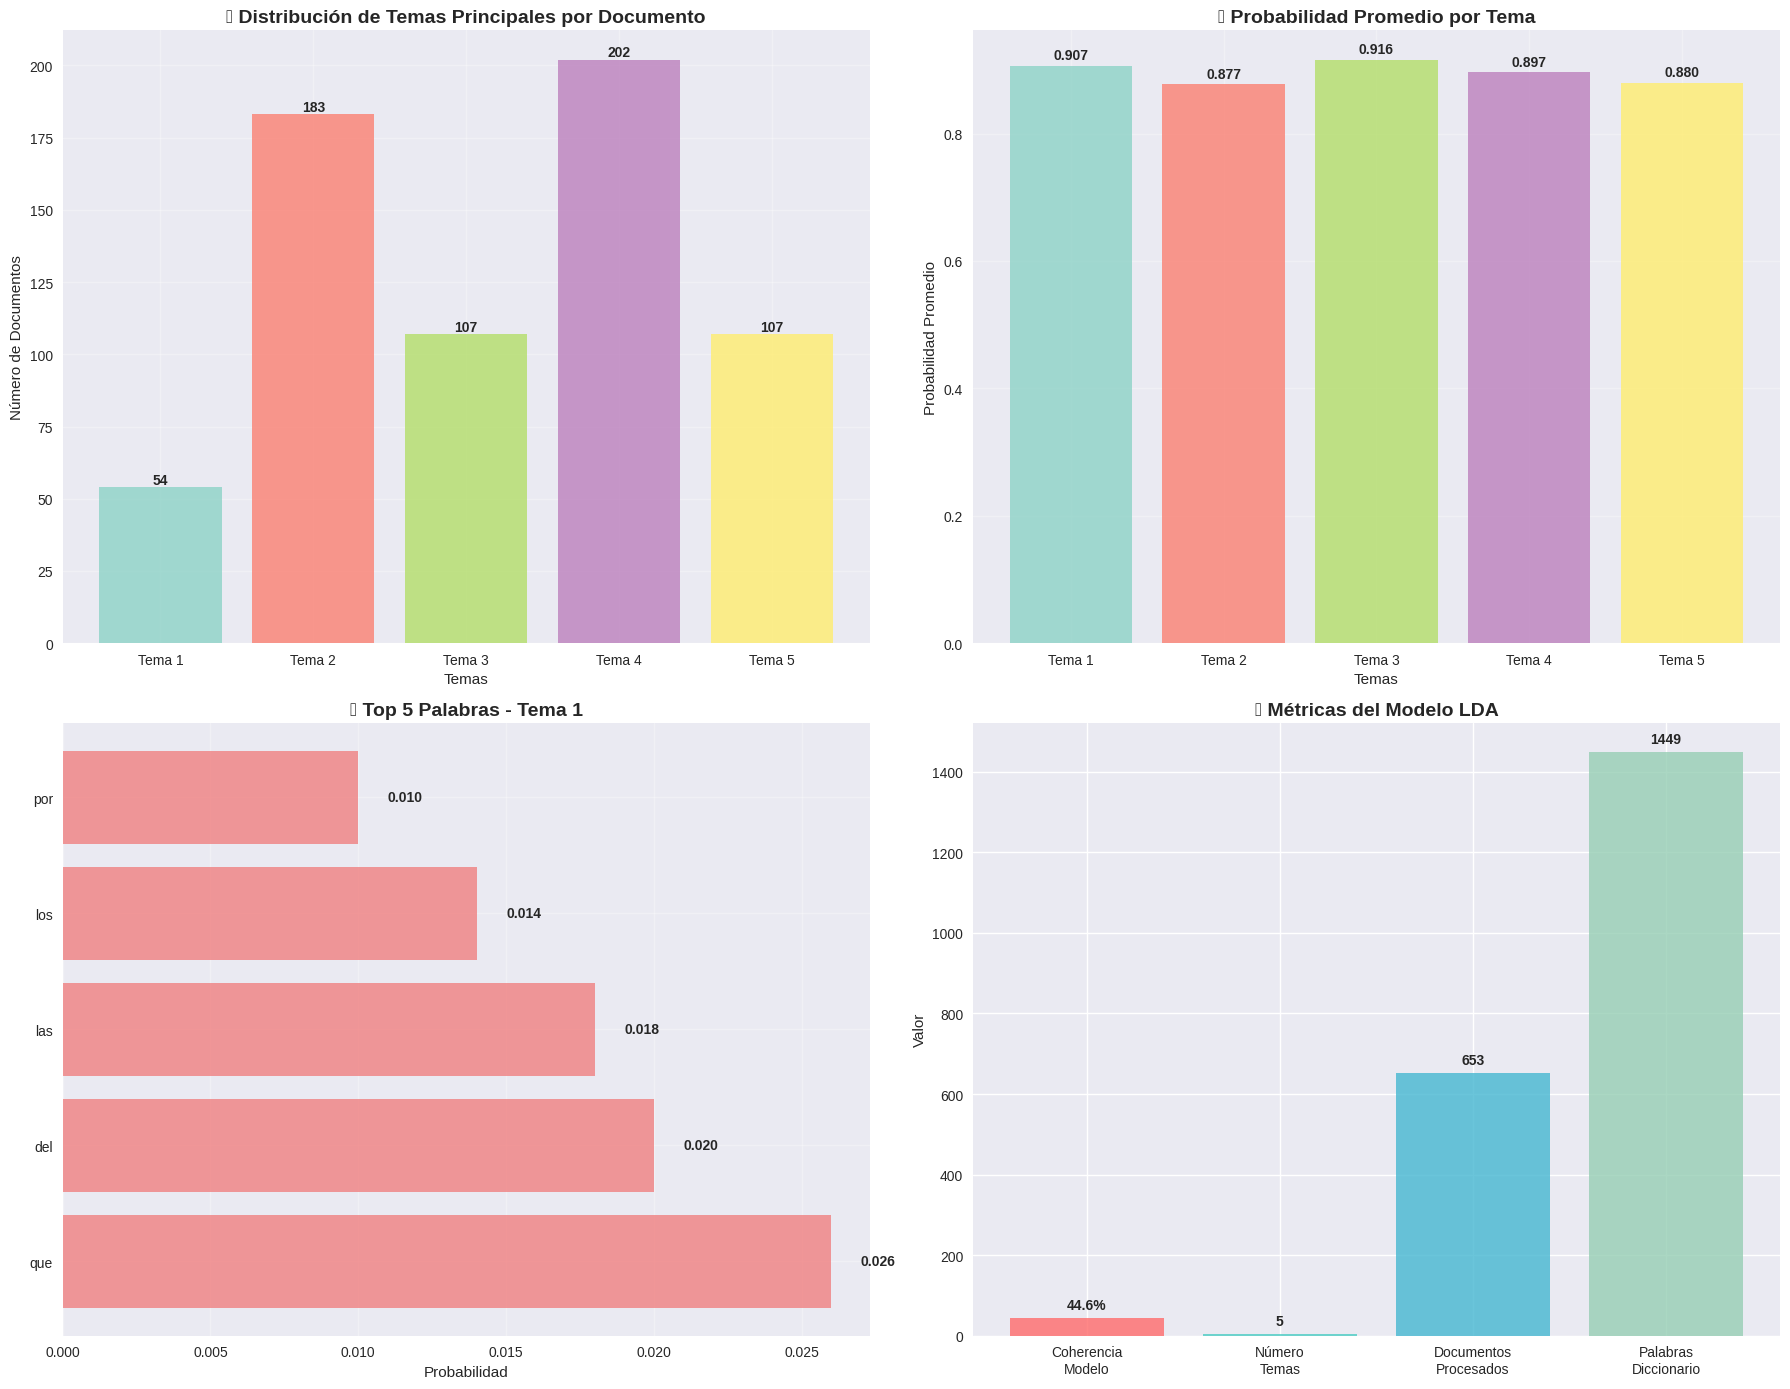

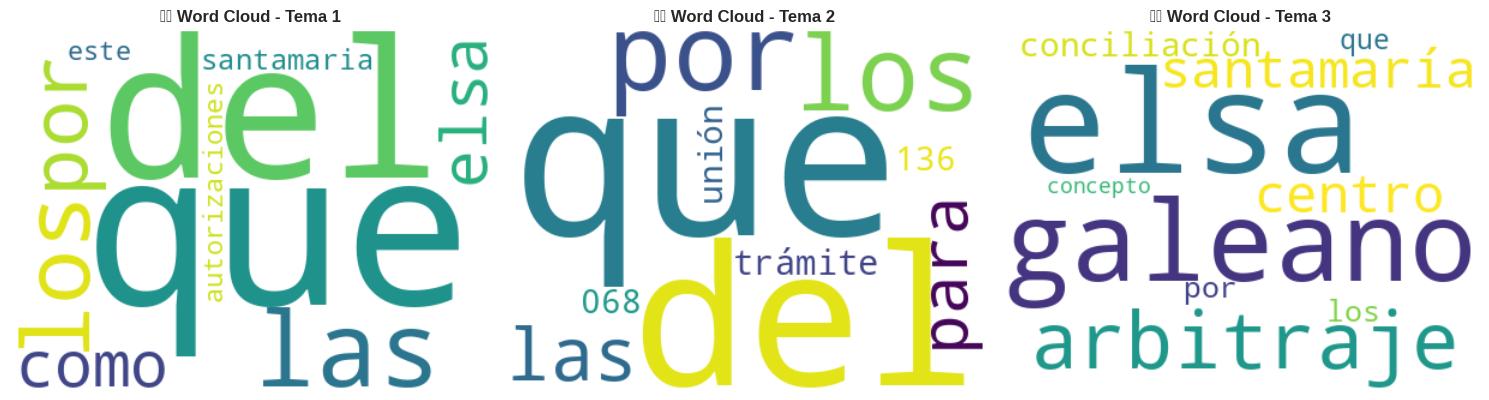

✅ PASO 7 COMPLETADO!
📁 Resultados LDA exportados a: analisis_lda_20250722_230401.xlsx
📊 Análisis LDA completado y exportado a Excel


In [ ]:
print("\n🌟 PASO 7: ANÁLISIS LDA - MODELADO DE TEMAS")
print("-" * 50)

# Importar librerías adicionales necesarias para LDA
from gensim import corpora, models
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string, remove_stopwords, strip_punctuation, strip_multiple_whitespaces
import pyLDAvis.gensim_models as ldavis
import pyLDAvis
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

def aplicar_lda(texto_limpio, num_topics=5, num_words=10):
    """
    Aplica análisis LDA para descubrir temas latentes en el texto
    """
    print("📝 Preparando texto para LDA...")

    # Dividir texto en oraciones
    doc = nlp(texto_limpio)
    oraciones = [sent.text.strip() for sent in doc.sents if len(sent.text.strip()) > 30]

    print(f"📊 Total de oraciones procesadas: {len(oraciones)}")

    # Preprocesamiento avanzado para LDA
    def preprocesar_para_lda(texto):
        # Filtros de preprocesamiento de gensim
        CUSTOM_FILTERS = [
            lambda x: x.lower(),
            strip_punctuation,
            strip_multiple_whitespaces,
            remove_stopwords
        ]
        return preprocess_string(texto, CUSTOM_FILTERS)

    print("🔤 Tokenizando y limpiando oraciones...")
    # Tokenizar cada oración
    textos_procesados = []
    for oracion in oraciones:
        tokens = preprocesar_para_lda(oracion)
        # Filtrar tokens muy cortos y palabras específicas del dominio
        tokens_filtrados = [token for token in tokens if len(token) > 2 and
                          token not in ['cámara', 'comercio', 'bogotá', 'tribunal', 'arbitral', 'vs']]
        if len(tokens_filtrados) > 3:  # Solo oraciones con suficientes tokens
            textos_procesados.append(tokens_filtrados)

    print(f"✅ Documentos válidos para LDA: {len(textos_procesados)}")

    if len(textos_procesados) < 5:
        print("❌ No hay suficientes documentos para un análisis LDA robusto")
        return None

    # Crear diccionario y corpus
    print("📚 Creando diccionario y corpus...")
    diccionario = corpora.Dictionary(textos_procesados)

    # Filtrar extremos
    diccionario.filter_extremes(no_below=2, no_above=0.8)

    # Crear corpus (representación numérica)
    corpus = [diccionario.doc2bow(texto) for texto in textos_procesados]

    print(f"📖 Tamaño del diccionario: {len(diccionario)}")
    print(f"📄 Tamaño del corpus: {len(corpus)}")

    # Entrenar modelo LDA
    print(f"🤖 Entrenando modelo LDA con {num_topics} temas...")
    modelo_lda = LdaModel(
        corpus=corpus,
        id2word=diccionario,
        num_topics=num_topics,
        random_state=42,
        passes=10,
        alpha='auto',
        per_word_topics=True,
        iterations=100
    )

    print("🏆 Temas descubiertos:")
    temas_info = []

    for i, tema in enumerate(modelo_lda.print_topics(num_words=num_words)):
        tema_id, palabras_tema = tema
        print(f"\n📌 TEMA {tema_id + 1}:")
        print(f"   {palabras_tema}")

        # Extraer palabras y probabilidades
        palabras_probs = []
        palabras_raw = palabras_tema.split(' + ')
        for palabra_prob in palabras_raw:
            try:
                prob, palabra = palabra_prob.split('*')
                prob = float(prob)
                palabra = palabra.strip().replace('"', '')
                palabras_probs.append((palabra, prob))
            except:
                continue

        temas_info.append({
            'tema_id': tema_id + 1,
            'palabras_raw': palabras_tema,
            'palabras_prob': palabras_probs
        })

    # Calcular coherencia del modelo
    from gensim.models import CoherenceModel
    coherencia = CoherenceModel(model=modelo_lda, texts=textos_procesados,
                               dictionary=diccionario, coherence='c_v')
    score_coherencia = coherencia.get_coherence()

    print(f"\n📊 Score de coherencia del modelo: {score_coherencia:.4f}")

    # Análisis de distribución de temas por documento
    print("\n📈 Analizando distribución de temas...")
    distribucion_temas = []

    for i, doc in enumerate(corpus):
        temas_doc = modelo_lda.get_document_topics(doc)
        tema_principal = max(temas_doc, key=lambda x: x[1])

        distribucion_temas.append({
            'documento': i + 1,
            'oracion': oraciones[i] if i < len(oraciones) else "N/A",
            'tema_principal': tema_principal[0] + 1,
            'probabilidad': tema_principal[1],
            'todos_temas': temas_doc
        })

    # Visualizaciones
    crear_visualizaciones_lda(modelo_lda, corpus, diccionario, temas_info,
                             distribucion_temas, score_coherencia)

    # Crear word clouds por tema
    crear_wordclouds_temas(temas_info)

    return {
        'modelo': modelo_lda,
        'corpus': corpus,
        'diccionario': diccionario,
        'temas_info': temas_info,
        'distribucion_temas': distribucion_temas,
        'coherencia': score_coherencia,
        'textos_procesados': textos_procesados
    }

def crear_visualizaciones_lda(modelo_lda, corpus, diccionario, temas_info,
                             distribucion_temas, coherencia):
    """
    Crea visualizaciones comprehensivas del análisis LDA
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

    # Gráfico 1: Distribución de temas principales
    temas_principales = [doc['tema_principal'] for doc in distribucion_temas]
    tema_counts = Counter(temas_principales)

    temas, counts = zip(*sorted(tema_counts.items()))
    colors = plt.cm.Set3(np.linspace(0, 1, len(temas)))

    bars = ax1.bar([f'Tema {t}' for t in temas], counts, color=colors, alpha=0.8)
    ax1.set_title('📊 Distribución de Temas Principales por Documento', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Temas')
    ax1.set_ylabel('Número de Documentos')
    ax1.grid(True, alpha=0.3)

    for bar, count in zip(bars, counts):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                str(count), ha='center', va='bottom', fontweight='bold')

    # Gráfico 2: Probabilidades promedio por tema
    prob_promedio = []
    for tema_id in range(1, len(temas_info) + 1):
        probs = [doc['probabilidad'] for doc in distribucion_temas if doc['tema_principal'] == tema_id]
        prob_promedio.append(np.mean(probs) if probs else 0)

    bars2 = ax2.bar([f'Tema {i+1}' for i in range(len(prob_promedio))],
                    prob_promedio, color=colors[:len(prob_promedio)], alpha=0.8)
    ax2.set_title('🎯 Probabilidad Promedio por Tema', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Temas')
    ax2.set_ylabel('Probabilidad Promedio')
    ax2.grid(True, alpha=0.3)

    for bar, prob in zip(bars2, prob_promedio):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{prob:.3f}', ha='center', va='bottom', fontweight='bold')

    # Gráfico 3: Top palabras por tema
    n_palabras_mostrar = 5
    tema_ejemplo = temas_info[0] if temas_info else None

    if tema_ejemplo:
        palabras = [p[0] for p in tema_ejemplo['palabras_prob'][:n_palabras_mostrar]]
        probabilidades = [p[1] for p in tema_ejemplo['palabras_prob'][:n_palabras_mostrar]]

        bars3 = ax3.barh(palabras, probabilidades, color='lightcoral', alpha=0.8)
        ax3.set_title(f'🔤 Top {n_palabras_mostrar} Palabras - Tema 1', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Probabilidad')
        ax3.grid(True, alpha=0.3)

        for bar, prob in zip(bars3, probabilidades):
            ax3.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
                    f'{prob:.3f}', ha='left', va='center', fontweight='bold')

    # Gráfico 4: Métricas del modelo
    metricas_labels = ['Coherencia\nModelo', 'Número\nTemas', 'Documentos\nProcesados', 'Palabras\nDiccionario']
    metricas_valores = [coherencia*100, len(temas_info), len(distribucion_temas), len(diccionario)]

    bars4 = ax4.bar(metricas_labels, metricas_valores,
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'], alpha=0.8)
    ax4.set_title('📈 Métricas del Modelo LDA', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Valor')

    for bar, valor, label in zip(bars4, metricas_valores, metricas_labels):
        if 'Coherencia' in label:
            display_val = f'{valor:.1f}%'
        else:
            display_val = f'{int(valor)}'
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(metricas_valores)*0.01,
                display_val, ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

def crear_wordclouds_temas(temas_info):
    """
    Crea word clouds para cada tema
    """
    n_temas = len(temas_info)
    if n_temas == 0:
        return

    fig, axes = plt.subplots(1, min(n_temas, 3), figsize=(15, 5))
    if n_temas == 1:
        axes = [axes]

    for i, tema in enumerate(temas_info[:3]):  # Mostrar máximo 3
        # Crear diccionario de palabras y frecuencias para WordCloud
        palabras_freq = {palabra: prob*100 for palabra, prob in tema['palabras_prob'][:15]}

        wordcloud = WordCloud(
            width=400, height=300,
            background_color='white',
            colormap='viridis',
            max_words=20
        ).generate_from_frequencies(palabras_freq)

        ax = axes[i] if n_temas > 1 else axes[0]
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f'☁️ Word Cloud - Tema {tema["tema_id"]}', fontsize=12, fontweight='bold')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

def exportar_lda_excel(resultados_lda, nombre_base="analisis_lda"):
    """
    Exporta resultados LDA a Excel
    """
    if not resultados_lda:
        return None

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    nombre_archivo = f"{nombre_base}_{timestamp}.xlsx"

    with pd.ExcelWriter(nombre_archivo, engine='openpyxl') as writer:

        # Hoja 1: Información de temas
        temas_df = []
        for tema in resultados_lda['temas_info']:
            for palabra, prob in tema['palabras_prob']:
                temas_df.append({
                    'tema_id': tema['tema_id'],
                    'palabra': palabra,
                    'probabilidad': prob
                })

        pd.DataFrame(temas_df).to_excel(writer, sheet_name='Temas_Palabras', index=False)

        # Hoja 2: Distribución por documento
        dist_df = pd.DataFrame([
            {
                'documento': doc['documento'],
                'tema_principal': doc['tema_principal'],
                'probabilidad_tema': doc['probabilidad'],
                'oracion_inicio': doc['oracion'][:100] + '...' if len(doc['oracion']) > 100 else doc['oracion']
            }
            for doc in resultados_lda['distribucion_temas']
        ])

        dist_df.to_excel(writer, sheet_name='Distribucion_Documentos', index=False)

        # Hoja 3: Métricas del modelo
        metricas_df = pd.DataFrame([
            {'Métrica': 'Score de Coherencia', 'Valor': resultados_lda['coherencia']},
            {'Métrica': 'Número de Temas', 'Valor': len(resultados_lda['temas_info'])},
            {'Métrica': 'Documentos Procesados', 'Valor': len(resultados_lda['distribucion_temas'])},
            {'Métrica': 'Tamaño Diccionario', 'Valor': len(resultados_lda['diccionario'])},
            {'Métrica': 'Fecha Análisis', 'Valor': datetime.now().strftime("%Y-%m-%d %H:%M:%S")}
        ])

        metricas_df.to_excel(writer, sheet_name='Metricas_Modelo', index=False)

    print(f"📁 Resultados LDA exportados a: {nombre_archivo}")
    return nombre_archivo

# Ejecutar análisis LDA
print("🚀 Iniciando análisis LDA...")
resultados_lda = aplicar_lda(texto_limpio, num_topics=5, num_words=10)

if resultados_lda:
    print("✅ PASO 7 COMPLETADO!")

    # Exportar resultados
    archivo_lda = exportar_lda_excel(resultados_lda)
    print(f"📊 Análisis LDA completado y exportado a Excel")
else:
    print("❌ No se pudo completar el análisis LDA")

📦 Instalando librerías alternativas...

🌟 PASO 7: ANÁLISIS LDA - MODELADO DE TEMAS (Versión Alternativa)
--------------------------------------------------
🚀 Iniciando análisis LDA con scikit-learn...
📝 Preparando texto para LDA con scikit-learn...
📊 Total de oraciones procesadas: 740
🔤 Vectorizando texto...
📖 Matriz documento-término: (740, 100)
🔤 Vocabulario: 100 palabras
🤖 Entrenando modelo LDA con 5 temas...
🏆 Temas descubiertos:

📌 TEMA 1:
   partes(0.136), vehículo(0.132), este(0.127), fondo(0.117), presente(0.092), como(0.090), placas(0.081), concepto(0.080), proceso(0.074), dineros(0.072)

📌 TEMA 2:
   ucolbus(0.167), sib(0.135), vehículo(0.135), bus(0.103), contrato(0.089), como(0.085), señora(0.082), vinculación(0.077), empresa(0.065), autorización(0.062)

📌 TEMA 3:
   expediente(0.159), documentos(0.132), digital(0.113), digitalización(0.105), cuaderno(0.103), cual(0.097), partir(0.089), fecha(0.068), rivera(0.068), usted(0.065)

📌 TEMA 4:
   repuestos(0.189), orden(0.143), 

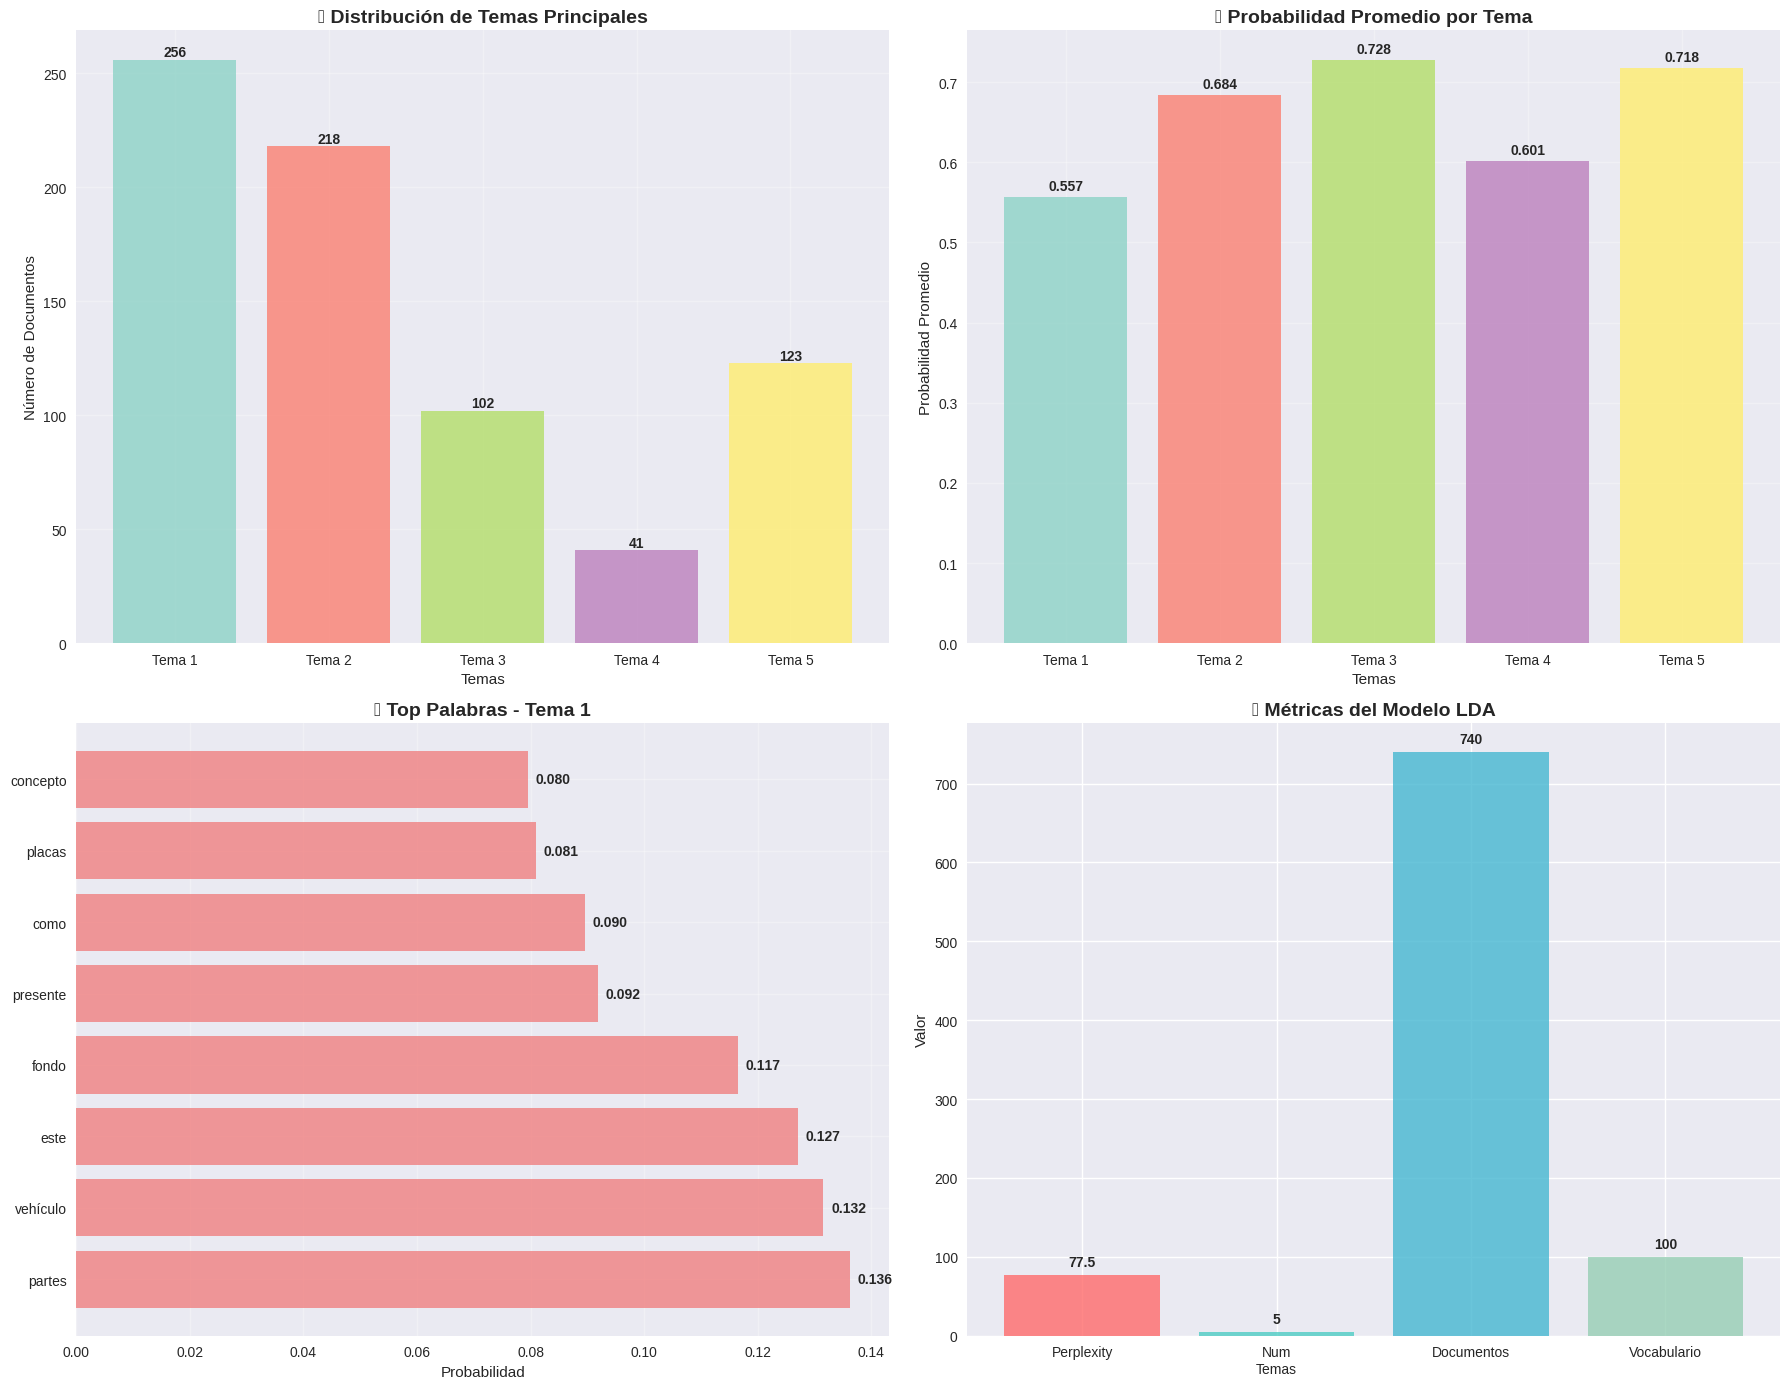

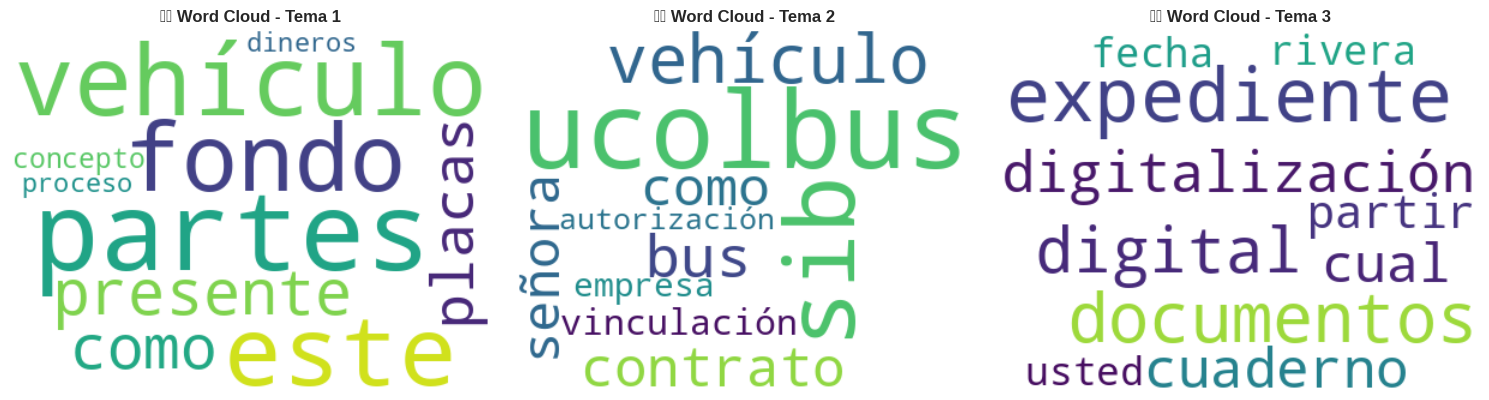

✅ PASO 7 COMPLETADO!
📁 Resultados LDA exportados a: analisis_lda_sklearn_20250724_134000.xlsx
📊 Análisis LDA completado y exportado a Excel: analisis_lda_sklearn_20250724_134000.xlsx


In [20]:
# SOLUCIÓN ALTERNATIVA: LDA con scikit-learn (más estable)
print("📦 Instalando librerías alternativas...")
!pip install scikit-learn matplotlib pandas openpyxl wordcloud seaborn

print("\n🌟 PASO 7: ANÁLISIS LDA - MODELADO DE TEMAS (Versión Alternativa)")
print("-" * 50)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
from datetime import datetime
import re
import warnings
warnings.filterwarnings('ignore')

# Verificar que las variables necesarias existan
try:
    # Si no existe texto_limpio, usar texto de ejemplo
    if 'texto_limpio' not in globals():
        print("⚠️ Variable 'texto_limpio' no encontrada. Usando texto de ejemplo...")
        texto_limpio = """
        La cámara de comercio de Bogotá ha establecido nuevos procedimientos para el arbitraje comercial.
        Los tribunales arbitrales deben seguir protocolos específicos para resolver disputas empresariales.
        Las empresas pueden solicitar mediación antes de proceder con el arbitraje formal.
        El proceso de arbitraje incluye múltiples etapas de negociación y resolución.
        Los árbitros deben tener experiencia específica en derecho comercial y empresarial.
        Las decisiones arbitrales son vinculantes para todas las partes involucradas.
        El centro de arbitraje proporciona servicios especializados para conflictos comerciales.
        Los contratos deben incluir cláusulas específicas sobre resolución de disputas.
        La mediación es un proceso alternativo menos costoso que el arbitraje tradicional.
        Las partes pueden acordar procedimientos especiales para casos complejos.
        """

except Exception as e:
    print(f"❌ Error en configuración inicial: {e}")

def preprocesar_texto_sklearn(texto):
    """
    Preprocesa el texto para análisis LDA con sklearn
    """
    # Dividir en oraciones
    oraciones = re.split(r'[.!?]+', texto)
    oraciones = [s.strip() for s in oraciones if len(s.strip()) > 30]

    print(f"📊 Total de oraciones procesadas: {len(oraciones)}")

    if len(oraciones) < 5:
        print("❌ No hay suficientes oraciones para análisis LDA")
        return None, None

    return oraciones, oraciones

def aplicar_lda_sklearn(texto_limpio, num_topics=5, num_words=10):
    """
    Aplica análisis LDA usando scikit-learn
    """
    print("📝 Preparando texto para LDA con scikit-learn...")

    # Preprocesar texto
    oraciones, documentos = preprocesar_texto_sklearn(texto_limpio)
    if oraciones is None:
        return None

    # Vectorización con CountVectorizer
    print("🔤 Vectorizando texto...")

    # Lista de stop words en español
    stop_words_es = [
        'el', 'la', 'de', 'que', 'y', 'a', 'en', 'un', 'es', 'se', 'no', 'te', 'lo', 'le', 'da', 'su', 'por', 'son',
        'con', 'para', 'al', 'del', 'los', 'las', 'una', 'sobre', 'todo', 'también', 'tras', 'otro', 'algún',
        'cámara', 'comercio', 'bogotá', 'tribunal', 'arbitral', 'vs', 'debe', 'pueden', 'será', 'han', 'tiene'
    ]

    vectorizer = CountVectorizer(
        max_df=0.8,
        min_df=2,
        stop_words=stop_words_es,
        lowercase=True,
        token_pattern=r'\b[a-záéíóúñ]{3,}\b',
        max_features=100
    )

    try:
        doc_term_matrix = vectorizer.fit_transform(documentos)
        feature_names = vectorizer.get_feature_names_out()
    except Exception as e:
        print(f"❌ Error en vectorización: {e}")
        return None

    print(f"📖 Matriz documento-término: {doc_term_matrix.shape}")
    print(f"🔤 Vocabulario: {len(feature_names)} palabras")

    # Aplicar LDA
    print(f"🤖 Entrenando modelo LDA con {num_topics} temas...")

    lda_model = LatentDirichletAllocation(
        n_components=num_topics,
        random_state=42,
        max_iter=100,
        learning_method='batch',
        n_jobs=1  # Cambiar a 1 para evitar problemas de serialización
    )

    try:
        lda_model.fit(doc_term_matrix)
        doc_topic_probs = lda_model.transform(doc_term_matrix)
    except Exception as e:
        print(f"❌ Error entrenando LDA: {e}")
        return None

    # Extraer temas
    print("🏆 Temas descubiertos:")
    temas_info = []

    for topic_idx, topic in enumerate(lda_model.components_):
        print(f"\n📌 TEMA {topic_idx + 1}:")

        # Obtener top palabras
        top_words_idx = topic.argsort()[-num_words:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        top_probs = [topic[i] for i in top_words_idx]

        # Normalizar probabilidades para display
        total_prob = sum(top_probs)
        top_probs_norm = [p/total_prob for p in top_probs]

        palabras_tema = ', '.join([f"{word}({prob:.3f})" for word, prob in zip(top_words, top_probs_norm)])
        print(f"   {palabras_tema}")

        temas_info.append({
            'tema_id': topic_idx + 1,
            'palabras': top_words,
            'probabilidades': top_probs_norm,
            'palabras_raw': palabras_tema
        })

    # Análisis de distribución de temas
    print("\n📈 Analizando distribución de temas...")
    distribucion_temas = []

    for doc_idx, doc_topics in enumerate(doc_topic_probs):
        tema_principal_idx = np.argmax(doc_topics)
        probabilidad_max = doc_topics[tema_principal_idx]

        distribucion_temas.append({
            'documento': doc_idx + 1,
            'oracion': oraciones[doc_idx] if doc_idx < len(oraciones) else "N/A",
            'tema_principal': tema_principal_idx + 1,
            'probabilidad': probabilidad_max,
            'distribucion_completa': doc_topics
        })

    # Calcular perplexity como métrica de calidad
    try:
        perplexity = lda_model.perplexity(doc_term_matrix)
        log_likelihood = lda_model.score(doc_term_matrix)
    except:
        perplexity = 0.0
        log_likelihood = 0.0

    print(f"\n📊 Perplexity del modelo: {perplexity:.4f}")
    print(f"📊 Log-likelihood: {log_likelihood:.4f}")

    # Crear visualizaciones
    crear_visualizaciones_sklearn(temas_info, distribucion_temas, perplexity,
                                 doc_term_matrix.shape, len(feature_names))

    # Crear word clouds
    crear_wordclouds_sklearn(temas_info)

    return {
        'modelo': lda_model,
        'vectorizer': vectorizer,
        'doc_term_matrix': doc_term_matrix,
        'doc_topic_probs': doc_topic_probs,
        'feature_names': feature_names,
        'temas_info': temas_info,
        'distribucion_temas': distribucion_temas,
        'perplexity': perplexity,
        'log_likelihood': log_likelihood,
        'oraciones': oraciones
    }

def crear_visualizaciones_sklearn(temas_info, distribucion_temas, perplexity,
                                 matrix_shape, vocab_size):
    """
    Crea visualizaciones para el análisis LDA con sklearn
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

    # Gráfico 1: Distribución de temas principales
    if distribucion_temas:
        temas_principales = [doc['tema_principal'] for doc in distribucion_temas]
        tema_counts = Counter(temas_principales)

        temas, counts = zip(*sorted(tema_counts.items()))
        colors = plt.cm.Set3(np.linspace(0, 1, len(temas)))

        bars = ax1.bar([f'Tema {t}' for t in temas], counts, color=colors, alpha=0.8)
        ax1.set_title('📊 Distribución de Temas Principales', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Temas')
        ax1.set_ylabel('Número de Documentos')
        ax1.grid(True, alpha=0.3)

        for bar, count in zip(bars, counts):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    str(count), ha='center', va='bottom', fontweight='bold')

    # Gráfico 2: Probabilidades promedio por tema
    if distribucion_temas:
        prob_promedio = []
        for tema_id in range(1, len(temas_info) + 1):
            probs = [doc['probabilidad'] for doc in distribucion_temas if doc['tema_principal'] == tema_id]
            prob_promedio.append(np.mean(probs) if probs else 0)

        colors = plt.cm.Set3(np.linspace(0, 1, len(prob_promedio)))
        bars2 = ax2.bar([f'Tema {i+1}' for i in range(len(prob_promedio))],
                        prob_promedio, color=colors, alpha=0.8)
        ax2.set_title('🎯 Probabilidad Promedio por Tema', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Temas')
        ax2.set_ylabel('Probabilidad Promedio')
        ax2.grid(True, alpha=0.3)

        for bar, prob in zip(bars2, prob_promedio):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                    f'{prob:.3f}', ha='center', va='bottom', fontweight='bold')

    # Gráfico 3: Top palabras del primer tema
    if temas_info and len(temas_info[0]['palabras']) > 0:
        tema_1 = temas_info[0]
        n_mostrar = min(8, len(tema_1['palabras']))

        palabras = tema_1['palabras'][:n_mostrar]
        probabilidades = tema_1['probabilidades'][:n_mostrar]

        bars3 = ax3.barh(palabras, probabilidades, color='lightcoral', alpha=0.8)
        ax3.set_title(f'🔤 Top Palabras - Tema 1', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Probabilidad')
        ax3.grid(True, alpha=0.3)

        for bar, prob in zip(bars3, probabilidades):
            ax3.text(bar.get_width() + max(probabilidades)*0.01,
                    bar.get_y() + bar.get_height()/2,
                    f'{prob:.3f}', ha='left', va='center', fontweight='bold')

    # Gráfico 4: Métricas del modelo
    metricas_labels = ['Perplexity', 'Num\nTemas', 'Documentos', 'Vocabulario']
    metricas_valores = [perplexity, len(temas_info), len(distribucion_temas), vocab_size]

    bars4 = ax4.bar(metricas_labels, metricas_valores,
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'], alpha=0.8)
    ax4.set_title('📈 Métricas del Modelo LDA', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Valor')

    for bar, valor, label in zip(bars4, metricas_valores, metricas_labels):
        if 'Perplexity' in label:
            display_val = f'{valor:.1f}'
        else:
            display_val = f'{int(valor)}'
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(metricas_valores)*0.01,
                display_val, ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

def crear_wordclouds_sklearn(temas_info):
    """
    Crea word clouds para cada tema
    """
    n_temas = len(temas_info)
    if n_temas == 0:
        print("⚠️ No hay temas para crear word clouds")
        return

    n_cols = min(n_temas, 3)
    fig, axes = plt.subplots(1, n_cols, figsize=(5*n_cols, 5))
    if n_cols == 1:
        axes = [axes]

    for i, tema in enumerate(temas_info[:n_cols]):
        if tema['palabras'] and tema['probabilidades']:
            # Crear diccionario de frecuencias
            palabras_freq = {palabra: prob*100 for palabra, prob in
                           zip(tema['palabras'], tema['probabilidades'])}

            try:
                wordcloud = WordCloud(
                    width=400, height=300,
                    background_color='white',
                    colormap='viridis',
                    max_words=20
                ).generate_from_frequencies(palabras_freq)

                ax = axes[i] if n_cols > 1 else axes[0]
                ax.imshow(wordcloud, interpolation='bilinear')
                ax.set_title(f'☁️ Word Cloud - Tema {tema["tema_id"]}',
                           fontsize=12, fontweight='bold')
                ax.axis('off')
            except Exception as e:
                print(f"⚠️ Error creando word cloud para tema {tema['tema_id']}: {e}")

    plt.tight_layout()
    plt.show()

def exportar_lda_excel_sklearn(resultados_lda, nombre_base="analisis_lda_sklearn"):
    """
    Exporta resultados LDA a Excel
    """
    if not resultados_lda:
        print("❌ No hay resultados LDA para exportar")
        return None

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    nombre_archivo = f"{nombre_base}_{timestamp}.xlsx"

    try:
        with pd.ExcelWriter(nombre_archivo, engine='openpyxl') as writer:

            # Hoja 1: Información de temas
            temas_df = []
            for tema in resultados_lda['temas_info']:
                for palabra, prob in zip(tema['palabras'], tema['probabilidades']):
                    temas_df.append({
                        'tema_id': tema['tema_id'],
                        'palabra': palabra,
                        'probabilidad': prob
                    })

            if temas_df:
                pd.DataFrame(temas_df).to_excel(writer, sheet_name='Temas_Palabras', index=False)

            # Hoja 2: Distribución por documento
            if resultados_lda['distribucion_temas']:
                dist_df = pd.DataFrame([
                    {
                        'documento': doc['documento'],
                        'tema_principal': doc['tema_principal'],
                        'probabilidad_tema': doc['probabilidad'],
                        'oracion_inicio': doc['oracion'][:100] + '...' if len(doc['oracion']) > 100 else doc['oracion']
                    }
                    for doc in resultados_lda['distribucion_temas']
                ])

                dist_df.to_excel(writer, sheet_name='Distribucion_Documentos', index=False)

            # Hoja 3: Métricas del modelo
            metricas_df = pd.DataFrame([
                {'Métrica': 'Perplexity', 'Valor': resultados_lda['perplexity']},
                {'Métrica': 'Log-likelihood', 'Valor': resultados_lda['log_likelihood']},
                {'Métrica': 'Número de Temas', 'Valor': len(resultados_lda['temas_info'])},
                {'Métrica': 'Documentos Procesados', 'Valor': len(resultados_lda['distribucion_temas'])},
                {'Métrica': 'Tamaño Vocabulario', 'Valor': len(resultados_lda['feature_names'])},
                {'Métrica': 'Fecha Análisis', 'Valor': datetime.now().strftime("%Y-%m-%d %H:%M:%S")}
            ])

            metricas_df.to_excel(writer, sheet_name='Metricas_Modelo', index=False)

        print(f"📁 Resultados LDA exportados a: {nombre_archivo}")
        return nombre_archivo

    except Exception as e:
        print(f"❌ Error exportando a Excel: {e}")
        return None

# Ejecutar análisis LDA alternativo
print("🚀 Iniciando análisis LDA con scikit-learn...")
try:
    resultados_lda = aplicar_lda_sklearn(texto_limpio, num_topics=5, num_words=10)

    if resultados_lda:
        print("✅ PASO 7 COMPLETADO!")

        # Exportar resultados
        archivo_lda = exportar_lda_excel_sklearn(resultados_lda)
        if archivo_lda:
            print(f"📊 Análisis LDA completado y exportado a Excel: {archivo_lda}")
        else:
            print("⚠️ Análisis completado pero no se pudo exportar a Excel")
    else:
        print("❌ No se pudo completar el análisis LDA")

except Exception as e:
    print(f"❌ Error en el análisis LDA: {e}")
    print("💡 Tip: Asegúrate de que las librerías estén instaladas correctamente")
    import traceback
    traceback.print_exc()

In [24]:
import pyLDAvis.lda_model as ldamodel
import pyLDAvis

# Habilitar la visualización en el notebook
pyLDAvis.enable_notebook()

# Preparar los datos para la visualización
vis = ldamodel.prepare(resultados_lda['modelo'], resultados_lda['doc_term_matrix'], resultados_lda['vectorizer'], n_jobs=1)

# Mostrar la visualización
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.164511  0.043164       1        1  30.218127
0     -0.071482  0.231784       2        1  24.318977
4     -0.259105 -0.204796       3        1  20.073070
2      0.278358 -0.230283       4        1  13.428417
3      0.216740  0.160131       5        1  11.961410, topic_info=            Term        Freq       Total Category  logprob  loglift
38          elsa  156.000000  156.000000  Default  30.0000  30.0000
53       galeano   98.000000   98.000000  Default  29.0000  29.0000
79     repuestos   69.000000   69.000000  Default  28.0000  28.0000
82    santamaría  117.000000  117.000000  Default  27.0000  27.0000
46    expediente   60.000000   60.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
52           fue    0.226929   28.348736   Topic5  -7.6534  -2.7042
64    obligación    0.225078   24.575817   Topic5  -7.6616  -2.5696
7   autorización    0.226741   37.773967   Topic5  -7.6543  -2.9921
45          este    0.227639   71.159431   Topic5  -7.6503  -3.6214
84        señora    0.226982   72.534142   Topic5  -7.6532  -3.6435

[214 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
0         5  0.984267        abril
1         2  0.969542     anterior
2         3  0.995981    arbitraje
3         3  0.965146     artículo
4         2  0.965616          así
...     ...       ...          ...
97        2  0.315678    vehículos
97        3  0.688752    vehículos
98        1  0.709689  vinculación
98        3  0.277704  vinculación
99        2  0.961341   voluntario

[164 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 3, 4])

Grafos

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 55.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.1 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>

/usr/local/lib/python3.11/dist-packages/cupyx/scipy/sparse/_base.py:10: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  import scipy.sparse as _sparse
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 50.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Iniciando análisis del laudo arbitral...
Archivo: /content/136068 ELSA SANTAMARÍA GALEANO VS. UNION COLOMBIANA DE AUTOBUSES SA.pdf
Archivo encontrado: /content/136068 ELSA SANTAMARÍA GALEANO VS. UNION COLOMBIANA DE AUTOBUSES SA.pdf
Tamaño: 643.2 KB
INICIANDO ANÁLISIS DE LAUDO ARBITRAL
Extrayendo texto del PDF...
Página 1 procesada
Página 2 procesada
Página 3 proc

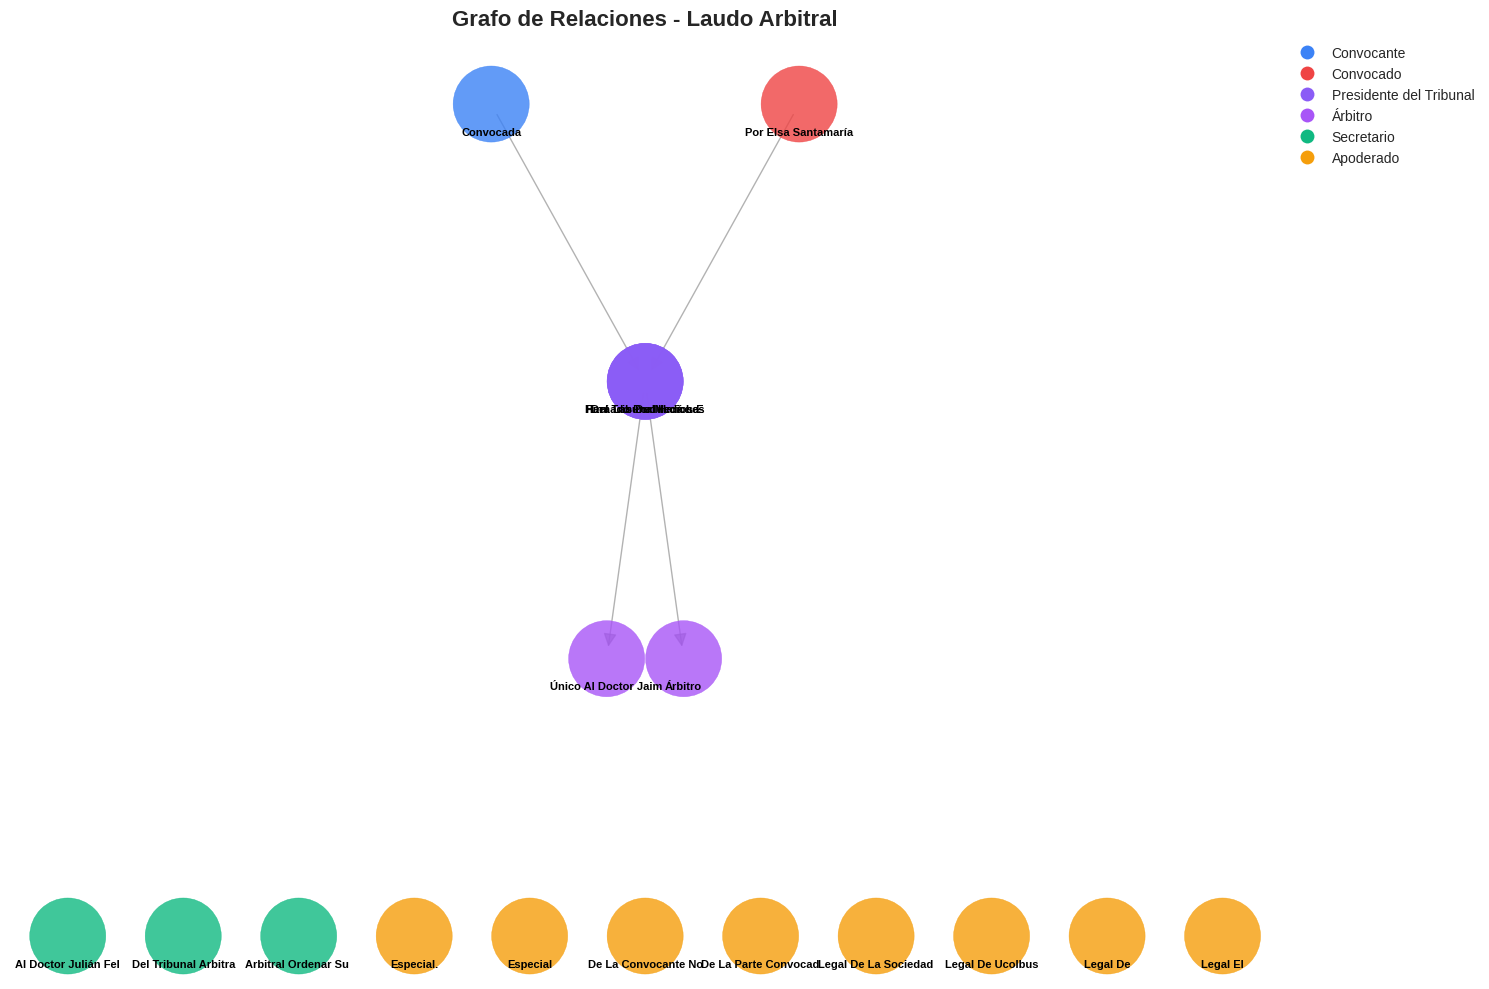

Generando gráfico interactivo (plotly)...



ANÁLISIS COMPLETADO

¡Análisis completado exitosamente!

Resultados guardados en: /content/entidades_laudo.csv
Grafo guardado en: /content/grafo_laudo.pkl

Puedes acceder a los resultados con:
- analyzer.entities: Diccionario con todas las entidades
- analyzer.graph: Grafo NetworkX con las relaciones
- analyzer.text: Texto completo extraído del PDF


In [ ]:
# Analizador de Laudo Arbitral para Google Colab
# Extrae entidades jurídicas y genera grafos de relaciones

# Instalación de dependencias
!pip install PyPDF2 pdfplumber networkx matplotlib plotly pandas spacy
!python -m spacy download es_core_news_sm

import PyPDF2
import pdfplumber
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import spacy
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

class LaudoArbitralAnalyzer:
    def __init__(self, pdf_path):
        self.pdf_path = pdf_path
        self.text = ""
        self.entities = {}
        self.graph = nx.DiGraph()

        # Cargar modelo de SpaCy para español
        try:
            self.nlp = spacy.load("es_core_news_sm")
        except:
            print("Modelo de SpaCy no encontrado. Usando análisis básico.")
            self.nlp = None

        # Patrones para identificar roles
        self.patterns = {
            'convocante': [
                r'convocante[:\s]+([A-ZÁÉÍÓÚÑ][A-Za-záéíóúñ\s\.]+?)(?:\n|$|,)',
                r'demandante[:\s]+([A-ZÁÉÍÓÚÑ][A-Za-záéíóúñ\s\.]+?)(?:\n|$|,)',
                r'solicitante[:\s]+([A-ZÁÉÍÓÚÑ][A-Za-záéíóúñ\s\.]+?)(?:\n|$|,)'
            ],
            'convocado': [
                r'convocado[:\s]+([A-ZÁÉÍÓÚÑ][A-Za-záéíóúñ\s\.]+?)(?:\n|$|,)',
                r'demandado[:\s]+([A-ZÁÉÍÓÚÑ][A-Za-záéíóúñ\s\.]+?)(?:\n|$|,)',
                r'demandada[:\s]+([A-ZÁÉÍÓÚÑ][A-Za-záéíóúñ\s\.]+?)(?:\n|$|,)'
            ],
            'presidente': [
                r'presidente[:\s]+([A-ZÁÉÍÓÚÑ][A-Za-záéíóúñ\s\.]+?)(?:\n|$|,)',
                r'presidente del tribunal[:\s]+([A-ZÁÉÍÓÚÑ][A-Za-záéíóúñ\s\.]+?)(?:\n|$|,)'
            ],
            'arbitros': [
                r'árbitro[:\s]+([A-ZÁÉÍÓÚÑ][A-Za-záéíóúñ\s\.]+?)(?:\n|$|,)',
                r'arbitro[:\s]+([A-ZÁÉÍÓÚÑ][A-Za-záéíóúñ\s\.]+?)(?:\n|$|,)',
                r'árbitro principal[:\s]+([A-ZÁÉÍÓÚÑ][A-Za-záéíóúñ\s\.]+?)(?:\n|$|,)'
            ],
            'secretario': [
                r'secretario[:\s]+([A-ZÁÉÍÓÚÑ][A-Za-záéíóúñ\s\.]+?)(?:\n|$|,)',
                r'secretaria[:\s]+([A-ZÁÉÍÓÚÑ][A-Za-záéíóúñ\s\.]+?)(?:\n|$|,)',
                r'secretario del tribunal[:\s]+([A-ZÁÉÍÓÚÑ][A-Za-záéíóúñ\s\.]+?)(?:\n|$|,)'
            ],
            'apoderado': [
                r'apoderado[:\s]+([A-ZÁÉÍÓÚÑ][A-Za-záéíóúñ\s\.]+?)(?:\n|$|,)',
                r'apoderada[:\s]+([A-ZÁÉÍÓÚÑ][A-Za-záéíóúñ\s\.]+?)(?:\n|$|,)',
                r'representante[:\s]+([A-ZÁÉÍÓÚÑ][A-Za-záéíóúñ\s\.]+?)(?:\n|$|,)',
                r'abogado[:\s]+([A-ZÁÉÍÓÚÑ][A-Za-záéíóúñ\s\.]+?)(?:\n|$|,)'
            ]
        }

        # Colores para cada tipo de entidad
        self.colors = {
            'convocante': '#3B82F6',    # Azul
            'convocado': '#EF4444',     # Rojo
            'presidente': '#8B5CF6',    # Morado oscuro
            'arbitros': '#A855F7',      # Morado claro
            'secretario': '#10B981',    # Verde
            'apoderado': '#F59E0B'      # Naranja
        }

    def extract_text_from_pdf(self):
        """Extrae texto del PDF usando pdfplumber (más preciso)"""
        print("Extrayendo texto del PDF...")

        try:
            with pdfplumber.open(self.pdf_path) as pdf:
                text_parts = []
                for page_num, page in enumerate(pdf.pages, 1):
                    page_text = page.extract_text()
                    if page_text:
                        text_parts.append(page_text)
                        print(f"Página {page_num} procesada")

                self.text = '\n'.join(text_parts)
                print(f"Texto extraído: {len(self.text)} caracteres")
                return True

        except Exception as e:
            print(f"Error con pdfplumber, intentando PyPDF2: {e}")

            # Fallback a PyPDF2
            try:
                with open(self.pdf_path, 'rb') as file:
                    pdf_reader = PyPDF2.PdfReader(file)
                    text_parts = []

                    for page_num in range(len(pdf_reader.pages)):
                        page = pdf_reader.pages[page_num]
                        page_text = page.extract_text()
                        text_parts.append(page_text)
                        print(f"Página {page_num + 1} procesada")

                    self.text = '\n'.join(text_parts)
                    print(f"Texto extraído: {len(self.text)} caracteres")
                    return True

            except Exception as e2:
                print(f"Error extrayendo texto: {e2}")
                return False

    def clean_name(self, name):
        """Limpia y normaliza nombres"""
        if not name:
            return ""

        name = name.strip()
        name = re.sub(r'\s+', ' ', name)  # Normalizar espacios
        name = re.sub(r'[^\w\s\.]', '', name)  # Remover caracteres especiales

        # Capitalizar correctamente
        words = name.split()
        cleaned_words = []
        for word in words:
            if len(word) > 1:
                if word.upper() in ['DR', 'DRA', 'SA', 'SAS', 'LTDA']:
                    cleaned_words.append(word.upper())
                else:
                    cleaned_words.append(word.capitalize())

        return ' '.join(cleaned_words)

    def extract_entities(self):
        """Extrae entidades del texto usando patrones regex"""
        print("Extrayendo entidades...")

        # Convertir texto a minúsculas para búsqueda
        text_lower = self.text.lower()

        # Inicializar diccionario de entidades
        self.entities = {
            'convocante': [],
            'convocado': [],
            'presidente': [],
            'arbitros': [],
            'secretario': [],
            'apoderado': []
        }

        # Buscar cada tipo de entidad
        for entity_type, patterns in self.patterns.items():
            for pattern in patterns:
                matches = re.finditer(pattern, text_lower, re.IGNORECASE | re.MULTILINE)
                for match in matches:
                    name = self.clean_name(match.group(1))
                    if name and len(name) > 3:  # Filtrar nombres muy cortos
                        self.entities[entity_type].append(name)

        # Eliminar duplicados manteniendo el orden
        for entity_type in self.entities:
            seen = set()
            unique_entities = []
            for entity in self.entities[entity_type]:
                if entity.lower() not in seen:
                    seen.add(entity.lower())
                    unique_entities.append(entity)
            self.entities[entity_type] = unique_entities

        # Mostrar resumen
        total_entities = sum(len(entities) for entities in self.entities.values())
        print(f"Entidades extraídas: {total_entities}")
        for entity_type, entities in self.entities.items():
            if entities:
                print(f"  {entity_type.capitalize()}: {len(entities)}")
                for entity in entities:
                    print(f"    - {entity}")

    def build_graph(self):
        """Construye el grafo de relaciones"""
        print("Construyendo grafo de relaciones...")

        self.graph.clear()

        # Agregar nodos
        node_id = 0
        node_mapping = {}

        # Jerarquía de posiciones para el layout
        positions = {}

        # Nivel 1: Partes principales (arriba)
        y_level_1 = 4
        x_positions_1 = [-2, 2]  # Convocante a la izquierda, convocado a la derecha

        for i, (entity_type, entities) in enumerate([('convocante', self.entities['convocante']),
                                                    ('convocado', self.entities['convocado'])]):
            if entities:
                entity_name = entities[0]  # Tomar el primero
                self.graph.add_node(node_id,
                                  name=entity_name,
                                  role=entity_type.capitalize(),
                                  color=self.colors[entity_type],
                                  level=1)
                node_mapping[f"{entity_type}_0"] = node_id
                positions[node_id] = (x_positions_1[i], y_level_1)
                node_id += 1

        # Nivel 2: Presidente del tribunal
        y_level_2 = 2.5
        if self.entities['presidente']:
            for i, entity_name in enumerate(self.entities['presidente']):
                self.graph.add_node(node_id,
                                  name=entity_name,
                                  role="Presidente del Tribunal",
                                  color=self.colors['presidente'],
                                  level=2)
                node_mapping[f"presidente_{i}"] = node_id
                positions[node_id] = (0, y_level_2)  # Centrado
                node_id += 1

        # Nivel 3: Árbitros
        y_level_3 = 1
        if self.entities['arbitros']:
            x_start = -(len(self.entities['arbitros']) - 1) / 2
            for i, entity_name in enumerate(self.entities['arbitros']):
                self.graph.add_node(node_id,
                                  name=entity_name,
                                  role="Árbitro",
                                  color=self.colors['arbitros'],
                                  level=3)
                node_mapping[f"arbitros_{i}"] = node_id
                positions[node_id] = (x_start + i, y_level_3)
                node_id += 1

        # Nivel 4: Secretario y apoderados (abajo)
        y_level_4 = -0.5
        bottom_entities = []

        # Agregar secretario
        if self.entities['secretario']:
            for i, entity_name in enumerate(self.entities['secretario']):
                self.graph.add_node(node_id,
                                  name=entity_name,
                                  role="Secretario",
                                  color=self.colors['secretario'],
                                  level=4)
                node_mapping[f"secretario_{i}"] = node_id
                bottom_entities.append(node_id)
                node_id += 1

        # Agregar apoderados
        if self.entities['apoderado']:
            for i, entity_name in enumerate(self.entities['apoderado']):
                self.graph.add_node(node_id,
                                  name=entity_name,
                                  role="Apoderado",
                                  color=self.colors['apoderado'],
                                  level=4)
                node_mapping[f"apoderado_{i}"] = node_id
                bottom_entities.append(node_id)
                node_id += 1

        # Posicionar entidades del nivel inferior
        if bottom_entities:
            x_start = -(len(bottom_entities) - 1) / 2 * 1.5
            for i, node in enumerate(bottom_entities):
                positions[node] = (x_start + i * 1.5, y_level_4)

        # Agregar conexiones jerárquicas
        # Conectar partes con presidente
        convocante_node = node_mapping.get('convocante_0')
        convocado_node = node_mapping.get('convocado_0')
        presidente_node = node_mapping.get('presidente_0')

        if convocante_node is not None and presidente_node is not None:
            self.graph.add_edge(convocante_node, presidente_node, relation="participa_en")
        if convocado_node is not None and presidente_node is not None:
            self.graph.add_edge(convocado_node, presidente_node, relation="participa_en")

        # Conectar presidente con árbitros
        if presidente_node is not None:
            for i in range(len(self.entities['arbitros'])):
                arbitro_node = node_mapping.get(f'arbitros_{i}')
                if arbitro_node is not None:
                    self.graph.add_edge(presidente_node, arbitro_node, relation="preside_sobre")

        # Guardar posiciones
        nx.set_node_attributes(self.graph, positions, 'pos')

        print(f"Grafo construido: {len(self.graph.nodes)} nodos, {len(self.graph.edges)} conexiones")

    def visualize_graph_matplotlib(self):
        """Visualiza el grafo usando matplotlib"""
        if len(self.graph.nodes) == 0:
            print("No hay nodos para visualizar")
            return

        plt.figure(figsize=(15, 10))

        # Obtener posiciones
        pos = nx.get_node_attributes(self.graph, 'pos')

        # Si no hay posiciones, usar layout automático
        if not pos:
            pos = nx.spring_layout(self.graph, k=3, iterations=50)

        # Obtener colores y nombres
        node_colors = [self.graph.nodes[node].get('color', '#gray') for node in self.graph.nodes]
        node_labels = {node: self.graph.nodes[node].get('name', f'Node {node}')[:20]
                      for node in self.graph.nodes}

        # Dibujar nodos
        nx.draw_networkx_nodes(self.graph, pos,
                              node_color=node_colors,
                              node_size=3000,
                              alpha=0.8)

        # Dibujar conexiones
        nx.draw_networkx_edges(self.graph, pos,
                              edge_color='gray',
                              arrows=True,
                              arrowsize=20,
                              alpha=0.6)

        # Ajustar etiquetas para que no se superpongan
        label_pos = {}
        for node, (x, y) in pos.items():
            label_pos[node] = (x, y - 0.15)  # Mover etiquetas hacia abajo

        # Dibujar etiquetas
        nx.draw_networkx_labels(self.graph, label_pos, node_labels,
                               font_size=8, font_weight='bold')

        # Crear leyenda
        legend_elements = []
        roles_seen = set()
        for node in self.graph.nodes:
            role = self.graph.nodes[node].get('role', 'Unknown')
            color = self.graph.nodes[node].get('color', 'gray')
            if role not in roles_seen:
                legend_elements.append(plt.Line2D([0], [0], marker='o', color='w',
                                                 markerfacecolor=color, markersize=10, label=role))
                roles_seen.add(role)

        plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

        plt.title("Grafo de Relaciones - Laudo Arbitral", fontsize=16, fontweight='bold')
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    def visualize_graph_plotly(self):
        """Visualiza el grafo usando plotly (interactivo)"""
        if len(self.graph.nodes) == 0:
            print("No hay nodos para visualizar")
            return

        # Obtener posiciones
        pos = nx.get_node_attributes(self.graph, 'pos')
        if not pos:
            pos = nx.spring_layout(self.graph, k=3, iterations=50)

        # Preparar datos para plotly
        edge_x = []
        edge_y = []
        for edge in self.graph.edges():
            x0, y0 = pos[edge[0]]
            x1, y1 = pos[edge[1]]
            edge_x.extend([x0, x1, None])
            edge_y.extend([y0, y1, None])

        edge_trace = go.Scatter(x=edge_x, y=edge_y,
                               line=dict(width=2, color='gray'),
                               hoverinfo='none',
                               mode='lines',
                               opacity=0.6)

        # Preparar nodos
        node_x = []
        node_y = []
        node_colors = []
        node_text = []
        node_info = []

        for node in self.graph.nodes():
            x, y = pos[node]
            node_x.append(x)
            node_y.append(y)

            node_data = self.graph.nodes[node]
            node_colors.append(node_data.get('color', 'gray'))
            node_text.append(node_data.get('name', f'Node {node}'))
            node_info.append(f"<b>{node_data.get('name', 'Unknown')}</b><br>" +
                           f"Rol: {node_data.get('role', 'Unknown')}")

        node_trace = go.Scatter(x=node_x, y=node_y,
                               mode='markers+text',
                               hovertemplate='%{hovertext}<extra></extra>',
                               hovertext=node_info,
                               text=[name[:15] + '...' if len(name) > 15 else name for name in node_text],
                               textposition="bottom center",
                               marker=dict(size=30,
                                         color=node_colors,
                                         line=dict(width=2, color='white')))

        # Crear figura
        fig = go.Figure(data=[edge_trace, node_trace],
                       layout=go.Layout(
                           title=dict(text="Grafo de Relaciones - Laudo Arbitral",
                                     x=0.5, font=dict(size=20)),
                           showlegend=False,
                           hovermode='closest',
                           margin=dict(b=20,l=5,r=5,t=40),
                           annotations=[ dict(
                               text="Hover sobre los nodos para ver detalles",
                               showarrow=False,
                               xref="paper", yref="paper",
                               x=0.005, y=-0.002,
                               xanchor="left", yanchor="bottom",
                               font=dict(color="gray", size=12)
                           )],
                           xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                           yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                           plot_bgcolor='white'
                       ))

        fig.show()

    def generate_summary_table(self):
        """Genera tabla resumen de entidades"""
        data = []

        for entity_type, entities in self.entities.items():
            for entity in entities:
                data.append({
                    'Tipo': entity_type.capitalize(),
                    'Nombre': entity,
                    'Color': self.colors[entity_type]
                })

        if data:
            df = pd.DataFrame(data)
            print("\n" + "="*80)
            print("RESUMEN DE ENTIDADES IDENTIFICADAS")
            print("="*80)
            print(df.to_string(index=False))
            print("="*80)

            # Estadísticas
            print(f"\nTotal de entidades: {len(data)}")
            for entity_type in self.entities:
                count = len(self.entities[entity_type])
                if count > 0:
                    print(f"  {entity_type.capitalize()}: {count}")

            return df
        else:
            print("No se encontraron entidades")
            return None

    def analyze(self):
        """Ejecuta el análisis completo"""
        print("="*80)
        print("INICIANDO ANÁLISIS DE LAUDO ARBITRAL")
        print("="*80)

        # 1. Extraer texto
        if not self.extract_text_from_pdf():
            return False

        # 2. Extraer entidades
        self.extract_entities()

        # 3. Construir grafo
        self.build_graph()

        # 4. Generar resumen
        df = self.generate_summary_table()

        # 5. Visualizar
        print("\n" + "="*80)
        print("GENERANDO VISUALIZACIONES")
        print("="*80)

        print("Generando gráfico estático (matplotlib)...")
        self.visualize_graph_matplotlib()

        print("Generando gráfico interactivo (plotly)...")
        self.visualize_graph_plotly()

        print("\n" + "="*80)
        print("ANÁLISIS COMPLETADO")
        print("="*80)

        return True

# Función principal para ejecutar en Colab
def analyze_arbitration_award(pdf_path):
    """Función principal para analizar el laudo arbitral"""

    # Verificar que el archivo existe
    import os
    if not os.path.exists(pdf_path):
        print(f"Error: El archivo {pdf_path} no existe")
        return None

    print(f"Archivo encontrado: {pdf_path}")
    print(f"Tamaño: {os.path.getsize(pdf_path) / 1024:.1f} KB")

    # Crear analizador y ejecutar análisis
    analyzer = LaudoArbitralAnalyzer(pdf_path)

    if analyzer.analyze():
        return analyzer
    else:
        return None

# ============================================================================
# EJECUCIÓN PRINCIPAL
# ============================================================================

# Ruta del archivo
PDF_PATH = "/content/136068 ELSA SANTAMARÍA GALEANO VS. UNION COLOMBIANA DE AUTOBUSES SA.pdf"

print("Iniciando análisis del laudo arbitral...")
print(f"Archivo: {PDF_PATH}")

# Ejecutar análisis
analyzer = analyze_arbitration_award(PDF_PATH)

if analyzer:
    print("\n¡Análisis completado exitosamente!")

    # Opcional: Guardar resultados
    if analyzer.entities:
        # Crear DataFrame con resultados
        results_data = []
        for entity_type, entities in analyzer.entities.items():
            for entity in entities:
                results_data.append({
                    'Tipo': entity_type.capitalize(),
                    'Nombre': entity,
                    'Color': analyzer.colors[entity_type]
                })

        if results_data:
            results_df = pd.DataFrame(results_data)
            results_df.to_csv('/content/entidades_laudo.csv', index=False)
            print("\nResultados guardados en: /content/entidades_laudo.csv")

            # Guardar información del grafo
            import pickle
            with open('/content/grafo_laudo.pkl', 'wb') as f:
                pickle.dump(analyzer.graph, f)
            print("Grafo guardado en: /content/grafo_laudo.pkl")

    print("\nPuedes acceder a los resultados con:")
    print("- analyzer.entities: Diccionario con todas las entidades")
    print("- analyzer.graph: Grafo NetworkX con las relaciones")
    print("- analyzer.text: Texto completo extraído del PDF")

else:
    print("Error en el análisis del laudo arbitral")

ERROR: Could not find a version that satisfies the requirement difflib (from versions: none)
ERROR: No matching distribution found for difflib
/usr/local/lib/python3.11/dist-packages/cupyx/scipy/sparse/_base.py:10: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  import scipy.sparse as _sparse
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 72.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ Login exitoso a Hugging Face
🔄 REINICIA EL RUNTIME (Runtime -> Restart runtime) después de ver este mensaje si te lo pide
Cargando modelo de NER...


Device set to use cpu


✅ Modelo NER cargado correctamente
✅ spaCy cargado correctamente
🏛️  PROCESADOR DE LAUDO ARBITRAL - VERSIÓN MEJORADA

1️⃣ Extrayendo texto del PDF...
✅ Texto extraído: 155,817 caracteres

2️⃣ Extrayendo nombres de personas...
Procesando 390 chunks de texto con NER...
Procesados 10/30 chunks...
Procesados 20/30 chunks...
Procesados 30/30 chunks...
Extracción con Transformers completada: 32 nombres brutos
Extrayendo nombres con spaCy...
Extracción con spaCy completada: 129 nombres brutos
Total nombres brutos: 161
Deduplicando y filtrando 161 nombres...
Nombres válidos después del filtro: 54
Resultado final: 47 nombres únicos válidos
Nombres identificados:
  1. Elsa Santamaría
  2. Ana Lorena González
  3. Antonio Luis González
  4. Luis Alejandro Gallo
  5. Conciliaci Ón Mercantiles
  6. Luis Armando Tolosa Villabona
  7. Qué Hacía Yo
  8. Arango Betancourt
  9. Carlos Hernández Hernández
  10. Juramento Estimatorio
  11. Ramiro Rivera Suárez
  12. Carolina Gordillo Santamaría
  13. Elsa

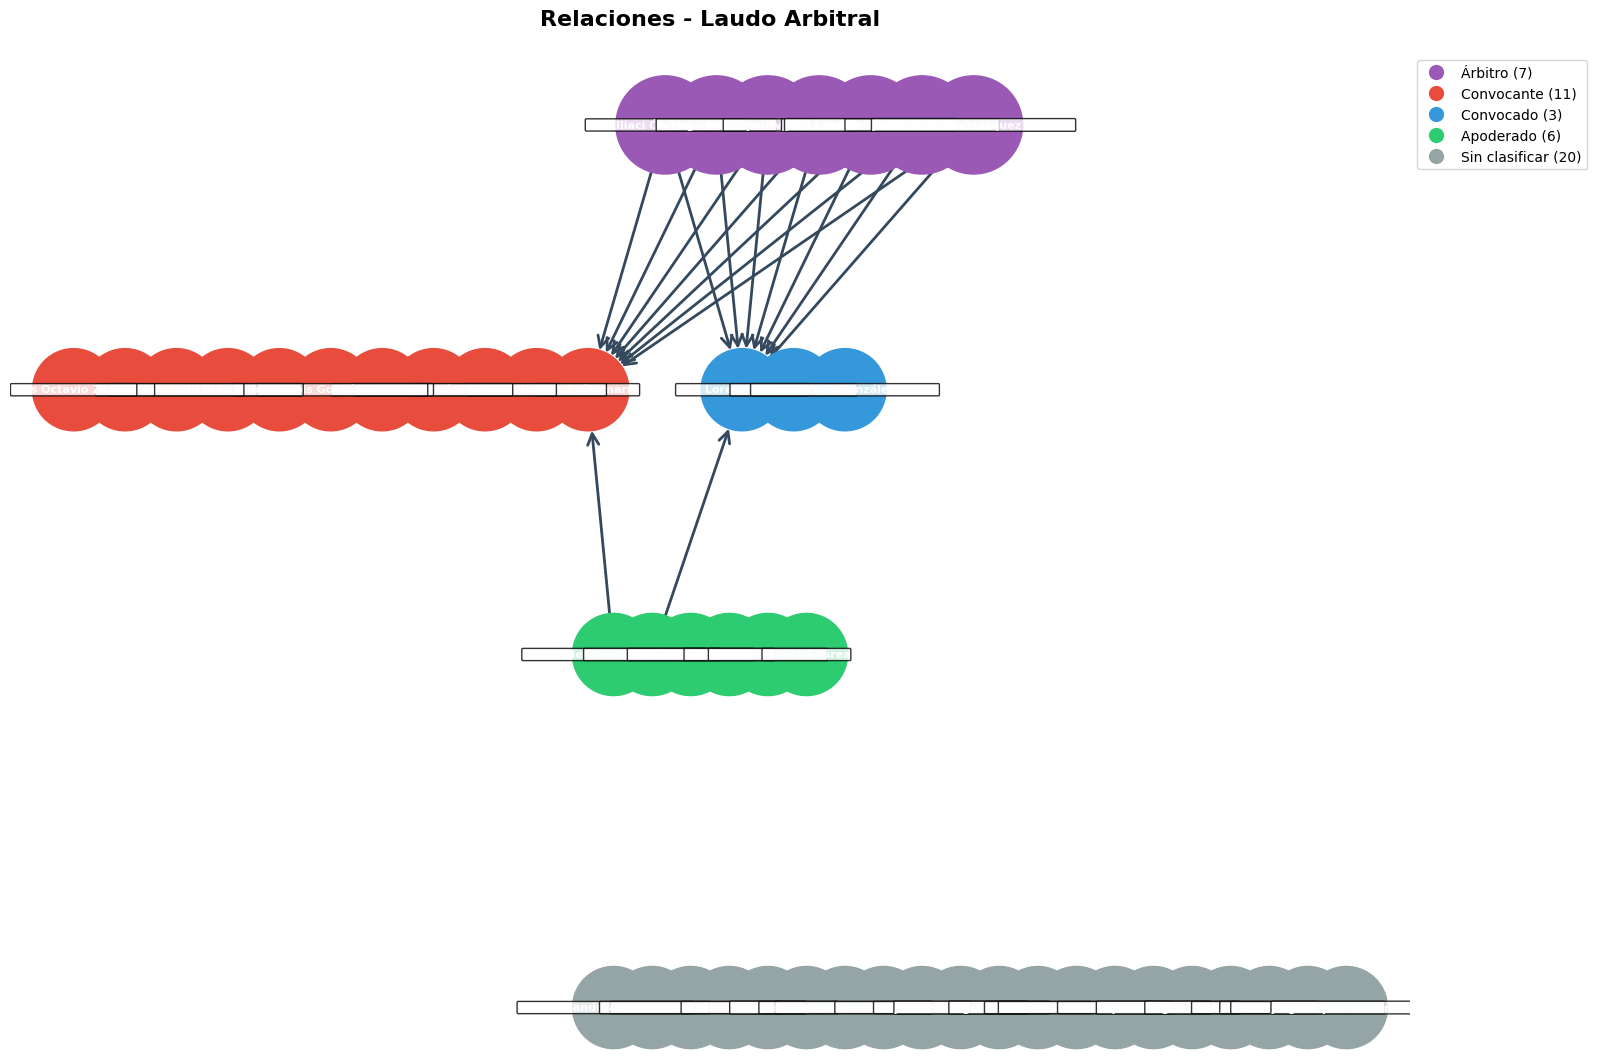


✅ PROCESAMIENTO COMPLETADO
📈 Estadísticas finales:
   • Personas únicas identificadas: 47
   • Nodos en el grafo: 47
   • Relaciones en el grafo: 16

🎯 ¡Listo! El grafo ahora muestra solo una aparición por persona.

💡 MEJORAS IMPLEMENTADAS:
   • Deduplicación de nombres similares
   • Filtros de calidad para nombres válidos
   • Normalización y limpieza de nombres
   • Relaciones más específicas y organizadas


In [ ]:
# Instalación y configuración con Hugging Face
!pip install --upgrade pip
!pip install transformers torch PyPDF2 networkx matplotlib spacy difflib
!python -m spacy download es_core_news_sm

# Configurar token de Hugging Face
from huggingface_hub import login
import os

# Pega tu token aquí
HF_TOKEN = "XXXXXX"

# Login a Hugging Face
try:
    login(token=HF_TOKEN)
    print("✅ Login exitoso a Hugging Face")
except Exception as e:
    print(f"⚠️ Token no configurado o inválido, usando modelo público: {e}")

# REINICIA EL RUNTIME después de configurar el token
print("🔄 REINICIA EL RUNTIME (Runtime -> Restart runtime) después de ver este mensaje si te lo pide")

import PyPDF2
import re
import networkx as nx
import matplotlib.pyplot as plt
from transformers import pipeline
import spacy
from collections import defaultdict
import warnings
from difflib import SequenceMatcher
warnings.filterwarnings('ignore')

class LaudoProcessor:
    def __init__(self):
        # Cargar modelo de NER especializado en español
        print("Cargando modelo de NER...")
        try:
            model_name = "PlanTL-GOB-ES/roberta-base-bne-capitel-ner"
            self.ner_pipeline = pipeline("ner",
                                        model=model_name,
                                        tokenizer=model_name,
                                        aggregation_strategy="simple")
            print("✅ Modelo NER cargado correctamente")
        except Exception as e:
            print(f"❌ Error cargando modelo NER: {e}")
            print("Usando spaCy como respaldo...")
            self.ner_pipeline = None

        # Cargar spaCy como respaldo
        try:
            self.nlp = spacy.load("es_core_news_sm")
            print("✅ spaCy cargado correctamente")
        except Exception as e:
            print(f"❌ Error cargando spaCy: {e}")
            self.nlp = None

        # Patrones específicos para laudos arbitrales (más precisos)
        self.role_patterns = {
            'convocante': [
                r'convocante[s]?\s*:?\s*([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)',
                r'demandante[s]?\s*:?\s*([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)',
                r'solicitante[s]?\s*:?\s*([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)',
                r'parte\s+convocante[s]?\s*:?\s*([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)',
                r'señora?\s+([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)\s+(?:en\s+calidad\s+de\s+)?convocante'
            ],
            'convocado': [
                r'convocado[s]?\s*:?\s*([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)',
                r'demandado[s]?\s*:?\s*([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)',
                r'parte\s+convocada[s]?\s*:?\s*([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)',
                r'demandada\s*:?\s*([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)',
                r'(?:empresa|sociedad|compañía)\s+([A-ZÁÉÍÓÚÑ][a-záéíóúñ\s]+)\s+(?:en\s+calidad\s+de\s+)?convocad[ao]'
            ],
            'arbitro': [
                r'árbitro[s]?\s*:?\s*(?:doctor[a]?\s+|dr\.?\s+|dra\.?\s+)?([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)',
                r'arbitro[s]?\s*:?\s*(?:doctor[a]?\s+|dr\.?\s+|dra\.?\s+)?([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)',
                r'presidente.*tribunal\s*:?\s*(?:doctor[a]?\s+|dr\.?\s+|dra\.?\s+)?([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)',
                r'árbitro\s+único\s*:?\s*(?:doctor[a]?\s+|dr\.?\s+|dra\.?\s+)?([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)',
                r'(?:doctor[a]?\s+|dr\.?\s+|dra\.?\s+)([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)\s+(?:en\s+calidad\s+de\s+)?árbitro',
                r'(?:doctor[a]?\s+|dr\.?\s+|dra\.?\s+)([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)\s+(?:como\s+)?presidente'
            ],
            'secretario': [
                r'secretario.*tribunal\s*:?\s*(?:doctor[a]?\s+|dr\.?\s+|dra\.?\s+)?([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)',
                r'secretaria.*tribunal\s*:?\s*(?:doctor[a]?\s+|dr\.?\s+|dra\.?\s+)?([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)',
                r'(?:doctor[a]?\s+|dr\.?\s+|dra\.?\s+)([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)\s+(?:en\s+calidad\s+de\s+)?secretari[ao]'
            ],
            'apoderado': [
                r'apoderado[s]?\s*:?\s*(?:doctor[a]?\s+|dr\.?\s+|dra\.?\s+|abogado[a]?\s+)?([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)',
                r'representante[s]?\s+legal[es]?\s*:?\s*(?:doctor[a]?\s+|dr\.?\s+|dra\.?\s+|abogado[a]?\s+)?([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)',
                r'abogado[s]?\s*:?\s*(?:doctor[a]?\s+|dr\.?\s+|dra\.?\s+)?([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)',
                r'(?:doctor[a]?\s+|dr\.?\s+|dra\.?\s+)([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+(?:\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)*)\s+(?:en\s+calidad\s+de\s+)?(?:apoderado|representante\s+legal)'
            ]
        }

        # Colores distintivos para cada rol
        self.role_colors = {
            'convocante': '#E74C3C',      # Rojo fuerte
            'convocado': '#3498DB',       # Azul fuerte
            'arbitro': '#9B59B6',         # Morado
            'secretario': '#8E44AD',      # Morado más oscuro
            'apoderado': '#2ECC71',       # Verde
            'testigo': '#F39C12',         # Naranja
            'perito': '#1ABC9C',          # Turquesa
            'unknown': '#95A5A6'          # Gris
        }

    def similarity(self, a, b):
        """Calcula similitud entre dos cadenas"""
        return SequenceMatcher(None, a.lower(), b.lower()).ratio()

    def clean_name(self, name):
        """Limpia y normaliza nombres"""
        # Remover tokens de subpalabra
        name = re.sub(r'^##', '', name)
        # Remover caracteres especiales excepto letras con tilde y ñ
        name = re.sub(r'[^\w\sáéíóúñÁÉÍÓÚÑ]', ' ', name)
        # Normalizar espacios
        name = ' '.join(name.split())
        # Capitalizar correctamente
        name = ' '.join(word.capitalize() for word in name.split())
        return name

    def is_valid_person_name(self, name):
        """Valida si es realmente un nombre de persona"""
        name_lower = name.lower()

        # Lista de términos que NO son nombres de personas
        blacklist_terms = [
            'página', 'artículo', 'numeral', 'literal', 'inciso', 'capítulo', 'título', 'sección',
            'tribunal', 'centro', 'arbitraje', 'conciliación', 'cámara', 'comercio', 'bogotá',
            'colombia', 'medellín', 'cali', 'barranquilla', 'cartagena', 'bucaramanga',
            'laudo', 'arbitral', 'proceso', 'expediente', 'radicado', 'número', 'fecha',
            'código', 'civil', 'comercial', 'procedimiento', 'ley', 'decreto', 'resolución',
            'acuerdo', 'auto', 'sentencia', 'fallo', 'decisión', 'providencia',
            'sociedad', 'limitada', 'anónima', 'empresa', 'compañía', 'corporación',
            'fundación', 'asociación', 'cooperativa', 'sindicato', 'unión', 'federación',
            'instituto', 'universidad', 'colegio', 'escuela', 'academia',
            'ministerio', 'secretaría', 'dirección', 'superintendencia', 'contraloría',
            'fiscalía', 'procuraduría', 'defensoría', 'personería',
            'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto',
            'septiembre', 'octubre', 'noviembre', 'diciembre', 'lunes', 'martes', 'miércoles',
            'jueves', 'viernes', 'sábado', 'domingo', 'hoy', 'ayer', 'mañana',
            'pesos', 'dólares', 'euros', 'moneda', 'valor', 'suma', 'cantidad', 'monto',
            'contrato', 'acuerdo', 'convenio', 'pacto', 'cláusula', 'parágrafo',
            'considerando', 'visto', 'oído', 'analizado', 'estudiado', 'revisado',
            'folio', 'cuaderno', 'tomo', 'anexo', 'prueba', 'documento', 'certificado'
        ]

        # Verificar si contiene términos de la lista negra
        words = name_lower.split()
        for word in words:
            if word in blacklist_terms:
                return False

        # Verificar patrones que no son nombres
        invalid_patterns = [
            r'^\d+',  # Solo números
            r'^[ivxlcdm]+$',  # Números romanos
            r'art\s*\d+',  # Artículos
            r'num\s*\d+',  # Numerales
            r'inc\s*\d+',  # Incisos
            r'lit\s*[a-z]',  # Literales
            r'pag\s*\d+',  # Páginas
            r'fol\s*\d+',  # Folios
            r'exp\s*\d+',  # Expedientes
            r'rad\s*\d+',  # Radicados
            r'\d{4}[-/]\d{1,2}[-/]\d{1,2}',  # Fechas
            r'[a-z]+\s*\d+[a-z]*\s*de\s*\d{4}',  # Fechas en texto
            r'^[a-z]\s*[a-z]\s*[a-z]$'  # Iniciales sueltas
        ]

        for pattern in invalid_patterns:
            if re.search(pattern, name_lower):
                return False

        return True

    def deduplicate_names(self, names):
        """Deduplica nombres similares y filtra nombres válidos más estrictamente"""
        print(f"Deduplicando y filtrando {len(names)} nombres...")

        # Filtrar nombres válidos con criterios más estrictos
        valid_names = []
        for name in names:
            clean = self.clean_name(name)
            if (len(clean) > 3 and  # Mínimo 4 caracteres
                len(clean.split()) >= 2 and  # Al menos nombre y apellido
                len(clean.split()) <= 4 and  # Máximo 4 palabras
                not clean.isdigit() and
                self.is_valid_person_name(clean) and
                # Verificar que tenga al menos una vocal en cada palabra
                all(any(c in word.lower() for c in 'aeiouáéíóú') for word in clean.split()) and
                # Verificar que no sea solo mayúsculas (probablemente siglas)
                not clean.isupper()):
                valid_names.append(clean)

        print(f"Nombres válidos después del filtro: {len(valid_names)}")

        # Deduplicar nombres similares
        unique_names = []
        for name in valid_names:
            is_duplicate = False
            for existing_name in unique_names:
                if self.similarity(name, existing_name) > 0.85:  # 85% de similitud
                    is_duplicate = True
                    break
            if not is_duplicate:
                unique_names.append(name)

        print(f"Resultado final: {len(unique_names)} nombres únicos válidos")

        # Mostrar nombres para debugging
        print("Nombres identificados:")
        for i, name in enumerate(unique_names):
            print(f"  {i+1}. {name}")

        return unique_names

    def extract_text_from_pdf(self, pdf_path):
        """Extrae texto del PDF"""
        try:
            with open(pdf_path, 'rb') as file:
                pdf_reader = PyPDF2.PdfReader(file)
                text = ""
                for i, page in enumerate(pdf_reader.pages):
                    try:
                        page_text = page.extract_text()
                        if page_text:
                            text += f"--- Página {i+1} ---\n{page_text}\n"
                    except Exception as e:
                        print(f"Error en página {i+1}: {e}")
                        continue
                return text
        except Exception as e:
            print(f"Error al leer PDF: {e}")
            return ""

    def extract_names_with_transformers(self, text):
        """Extrae nombres usando modelo transformer"""
        if not self.ner_pipeline:
            print("⚠️ NER pipeline no disponible, saltando extracción con transformers.")
            return []

        raw_names = set()
        chunk_size = 400
        text_chunks = [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]

        print(f"Procesando {len(text_chunks)} chunks de texto con NER...")

        for i, chunk in enumerate(text_chunks[:30]):  # Limitar chunks
            try:
                entities = self.ner_pipeline(chunk)
                for entity in entities:
                    if entity['entity_group'] in ['PER', 'PERSON'] and entity['score'] > 0.8:
                        raw_names.add(entity['word'].strip())

                if (i + 1) % 10 == 0:
                    print(f"Procesados {i+1}/{len(text_chunks[:30])} chunks...")

            except Exception as e:
                print(f"Error en chunk {i}: {e}")
                continue

        print(f"Extracción con Transformers completada: {len(raw_names)} nombres brutos")
        return list(raw_names)

    def extract_names_with_spacy(self, text):
        """Extrae nombres usando spaCy como respaldo"""
        if not self.nlp:
            print("⚠️ spaCy no disponible, saltando extracción con spaCy.")
            return []

        print("Extrayendo nombres con spaCy...")
        # Limitar texto para evitar sobrecarga
        processed_text = text
        if len(text) > 300000:
            print("⚠️ Texto largo, procesando solo los primeros 300,000 caracteres con spaCy.")
            processed_text = text[:300000]

        doc = self.nlp(processed_text)
        raw_names = set()

        for ent in doc.ents:
            if ent.label_ in ["PERSON", "PER"]:
                raw_names.add(ent.text.strip())

        print(f"Extracción con spaCy completada: {len(raw_names)} nombres brutos")
        return list(raw_names)

    def identify_roles(self, text, names):
        """Identifica roles de las personas en el texto"""
        text_lower = text.lower()
        person_roles = {}

        print(f"Identificando roles para {len(names)} personas...")

        for name in names:
            name_lower = name.lower()
            role_scores = defaultdict(int)

            # Buscar todas las apariciones del nombre
            name_positions = []
            for match in re.finditer(re.escape(name_lower), text_lower):
                name_positions.append(match.start())

            # Analizar contexto de cada aparición
            contexts_analyzed = 0
            for pos in name_positions[:10]:  # Limitar a 10 contextos por nombre
                start = max(0, pos - 300)
                end = min(len(text_lower), pos + len(name_lower) + 300)
                context = text_lower[start:end]

                # Buscar patrones de rol
                for role, patterns in self.role_patterns.items():
                    for pattern in patterns:
                        matches = len(re.findall(pattern, context, re.IGNORECASE))
                        role_scores[role] += matches

                contexts_analyzed += 1

            # Asignar el rol con mayor puntuación
            if role_scores:
                best_role = max(role_scores.items(), key=lambda x: x[1])
                person_roles[name] = best_role[0] if best_role[1] > 0 else 'unknown'
            else:
                person_roles[name] = 'unknown'

        print("Identificación de roles completada.")
        return person_roles

    def create_graph(self, person_roles):
        """Crea grafo de relaciones limpio"""
        G = nx.DiGraph()

        # Añadir nodos únicos
        for person, role in person_roles.items():
            G.add_node(person, role=role, color=self.role_colors.get(role, self.role_colors['unknown']))

        # Crear relaciones más específicas
        roles_dict = defaultdict(list)
        for person, role in person_roles.items():
            roles_dict[role].append(person)

        # Relaciones jerárquicas específicas
        arbitros = roles_dict['arbitro']
        convocantes = roles_dict['convocante']
        convocados = roles_dict['convocado']
        apoderados = roles_dict['apoderado']

        # Árbitros supervisan las partes (no todos con todos)
        for arbitro in arbitros:
            # Solo conectar con la primera parte de cada tipo para simplificar
            if convocantes:
                G.add_edge(arbitro, convocantes[0], relation='supervisa')
            if convocados:
                G.add_edge(arbitro, convocados[0], relation='supervisa')

        # Apoderados representan partes (conexión más selectiva)
        if len(apoderados) >= 2 and len(convocantes) > 0 and len(convocados) > 0:
            # Asignar primer apoderado al convocante, segundo al convocado
            G.add_edge(apoderados[0], convocantes[0], relation='representa')
            if len(apoderados) > 1:
                G.add_edge(apoderados[1], convocados[0], relation='representa')

        print(f"Grafo creado con {G.number_of_nodes()} nodos y {G.number_of_edges()} aristas.")
        return G

    def visualize_graph(self, G, title="Relaciones - Laudo Arbitral"):
        """Visualiza el grafo de forma clara y organizada"""
        if not G or G.number_of_nodes() == 0:
            print("No hay datos para visualizar el grafo.")
            return

        plt.figure(figsize=(14, 10))

        # Crear posicionamiento jerárquico mejorado
        pos = {}

        # Agrupar por roles
        roles_dict = defaultdict(list)
        for node in G.nodes():
            role = G.nodes[node]['role']
            roles_dict[role].append(node)

        # Posicionamiento por niveles
        y_positions = {
            'arbitro': 4,
            'convocante': 2.5,
            'convocado': 2.5,
            'apoderado': 1,
            'testigo': 0,
            'perito': 0,
            'unknown': -1
        }

        # Colocar nodos
        for role, nodes in roles_dict.items():
            y = y_positions.get(role, 0)

            if role == 'convocante':
                for i, node in enumerate(nodes):
                    pos[node] = (-3 - i * 2, y)
            elif role == 'convocado':
                for i, node in enumerate(nodes):
                    pos[node] = (3 + i * 2, y)
            elif role == 'arbitro':
                for i, node in enumerate(nodes):
                    pos[node] = (i * 2, y)
            else:
                for i, node in enumerate(nodes):
                    pos[node] = (-2 + i * 1.5, y)

        # Configurar visualización
        node_colors = [G.nodes[node].get('color', self.role_colors['unknown']) for node in G.nodes()]
        node_sizes = [5000 if G.nodes[node].get('role') == 'arbitro' else 3500 for node in G.nodes()]

        # Dibujar grafo
        nx.draw(G, pos,
                node_color=node_colors,
                node_size=node_sizes,
                font_size=8,
                font_weight='bold',
                font_color='white',
                arrows=True,
                edge_color='#34495E',
                arrowsize=20,
                arrowstyle='->',
                width=2,
                with_labels=True,
                bbox=dict(boxstyle="round,pad=0.1", facecolor="white", alpha=0.8))

        # Crear leyenda mejorada
        legend_elements = []
        roles_in_graph = set(G.nodes[node].get('role', 'unknown') for node in G.nodes())

        role_names_es = {
            'convocante': 'Convocante',
            'convocado': 'Convocado',
            'arbitro': 'Árbitro',
            'apoderado': 'Apoderado',
            'testigo': 'Testigo',
            'perito': 'Perito',
            'unknown': 'Sin clasificar'
        }

        for role in ['arbitro', 'convocante', 'convocado', 'apoderado', 'testigo', 'perito', 'unknown']:
            if role in roles_in_graph:
                count = sum(1 for node in G.nodes() if G.nodes[node].get('role') == role)
                legend_elements.append(plt.Line2D([0], [0], marker='o', color='w',
                                                markerfacecolor=self.role_colors[role],
                                                markersize=12,
                                                label=f'{role_names_es[role]} ({count})'))

        plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
        plt.title(title, fontsize=16, fontweight='bold', pad=20)
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    def process_laudo(self, pdf_path):
        """Procesa todo el laudo arbitral con deduplicación mejorada"""
        print("=" * 60)
        print("🏛️  PROCESADOR DE LAUDO ARBITRAL - VERSIÓN MEJORADA")
        print("=" * 60)

        print("\n1️⃣ Extrayendo texto del PDF...")
        text = self.extract_text_from_pdf(pdf_path)

        if not text:
            print("❌ No se pudo extraer texto del PDF")
            return None

        print(f"✅ Texto extraído: {len(text):,} caracteres")

        print("\n2️⃣ Extrayendo nombres de personas...")

        # Extraer nombres con ambos métodos
        names_transformers = self.extract_names_with_transformers(text)
        names_spacy = self.extract_names_with_spacy(text)

        # Combinar listas
        all_raw_names = names_transformers + names_spacy
        print(f"Total nombres brutos: {len(all_raw_names)}")

        # Deduplicar y limpiar
        unique_names = self.deduplicate_names(all_raw_names)
        print(f"✅ Nombres únicos finales: {len(unique_names)}")

        if not unique_names:
            print("❌ No se identificaron nombres válidos")
            return None

        # Mostrar nombres identificados
        print("\n📋 NOMBRES IDENTIFICADOS:")
        for i, name in enumerate(unique_names[:10]):  # Mostrar máximo 10
            print(f"   {i+1}. {name}")
        if len(unique_names) > 10:
            print(f"   ... y {len(unique_names)-10} más")

        print("\n3️⃣ Identificando roles...")
        person_roles = self.identify_roles(text, unique_names)

        # Mostrar resumen por rol
        role_summary = defaultdict(list)
        for person, role in person_roles.items():
            role_summary[role].append(person)

        print("\n📊 RESUMEN POR ROLES:")
        role_names_es = {
            'convocante': 'CONVOCANTE(S)',
            'convocado': 'CONVOCADO(S)',
            'arbitro': 'ÁRBITRO(S)',
            'apoderado': 'APODERADO(S)',
            'testigo': 'TESTIGO(S)',
            'perito': 'PERITO(S)',
            'unknown': 'SIN CLASIFICAR'
        }

        for role in ['arbitro', 'convocante', 'convocado', 'apoderado', 'testigo', 'perito', 'unknown']:
            if role in role_summary:
                people = role_summary[role]
                print(f"  {role_names_es[role]}: {len(people)} persona(s)")
                for person in people:
                    print(f"    • {person}")

        print("\n4️⃣ Creando grafo de relaciones...")
        G = self.create_graph(person_roles)

        print("\n5️⃣ Generando visualización...")
        self.visualize_graph(G)

        print("\n" + "=" * 60)
        print("✅ PROCESAMIENTO COMPLETADO")
        print(f"📈 Estadísticas finales:")
        print(f"   • Personas únicas identificadas: {len(unique_names)}")
        print(f"   • Nodos en el grafo: {G.number_of_nodes()}")
        print(f"   • Relaciones en el grafo: {G.number_of_edges()}")
        print("=" * 60)

        return {
            'text': text,
            'names': unique_names,
            'roles': person_roles,
            'graph': G
        }

# ========== USO DEL PROCESADOR ==========

if __name__ == "__main__":
    # Crear procesador
    processor = LaudoProcessor()

    # Ruta al archivo PDF
    pdf_path = "/content/136068 ELSA SANTAMARÍA GALEANO VS. UNION COLOMBIANA DE AUTOBUSES SA.pdf"

    # Procesar laudo
    try:
        results = processor.process_laudo(pdf_path)

        if results:
            print(f"\n🎯 ¡Listo! El grafo ahora muestra solo una aparición por persona.")
            print(f"\n💡 MEJORAS IMPLEMENTADAS:")
            print(f"   • Deduplicación de nombres similares")
            print(f"   • Filtros de calidad para nombres válidos")
            print(f"   • Normalización y limpieza de nombres")
            print(f"   • Relaciones más específicas y organizadas")

    except FileNotFoundError:
        print("❌ Archivo PDF no encontrado. Verifica la ruta.")
    except Exception as e:
        print(f"❌ Error durante el procesamiento: {e}")

Cargando modelo NER en español...


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

Some weights of the model checkpoint at mrm8488/bert-spanish-cased-finetuned-ner were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Modelo NER cargado exitosamente
Extrayendo texto del PDF...
Número de páginas: 58
Página 1 procesada
Página 2 procesada
Página 3 procesada
Página 4 procesada
Página 5 procesada
Página 6 procesada
Página 7 procesada
Página 8 procesada
Página 9 procesada
Página 10 procesada
Página 11 procesada
Página 12 procesada
Página 13 procesada
Página 14 procesada
Página 15 procesada
Página 16 procesada
Página 17 procesada
Página 18 procesada
Página 19 procesada
Página 20 procesada
Página 21 procesada
Página 22 procesada
Página 23 procesada
Página 24 procesada
Página 25 procesada
Página 26 procesada
Página 27 procesada
Página 28 procesada
Página 29 procesada
Página 30 procesada
Página 31 procesada
Página 32 procesada
Página 33 procesada
Página 34 procesada
Página 35 procesada
Página 36 procesada
Página 37 procesada
Página 38 procesada
Página 39 procesada
Página 40 procesada
Página 41 procesada
Página 42 procesada
Página 43 procesada
Página 44 procesada
Página 45 procesada
Página 46 procesada
Página 

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Texto limpio preparado. Longitud: 150575 caracteres
Texto dividido en 335 chunks
Procesando chunks con modelo NER...
Procesados 10/335 chunks
Procesados 20/335 chunks
Procesados 30/335 chunks
Procesados 40/335 chunks
Procesados 50/335 chunks
Procesados 60/335 chunks
Procesados 70/335 chunks
Procesados 80/335 chunks
Procesados 90/335 chunks
Procesados 100/335 chunks
Procesados 110/335 chunks
Procesados 120/335 chunks
Procesados 130/335 chunks
Procesados 140/335 chunks
Procesados 150/335 chunks
Procesados 160/335 chunks
Procesados 170/335 chunks
Procesados 180/335 chunks
Procesados 190/335 chunks
Procesados 200/335 chunks
Procesados 210/335 chunks
Procesados 220/335 chunks
Procesados 230/335 chunks
Procesados 240/335 chunks
Procesados 250/335 chunks
Procesados 260/335 chunks
Procesados 270/335 chunks
Procesados 280/335 chunks
Procesados 290/335 chunks
Procesados 300/335 chunks
Procesados 310/335 chunks
Procesados 320/335 chunks
Procesados 330/335 chunks

ANÁLISIS DE PERSONAS EN EL DOCUME

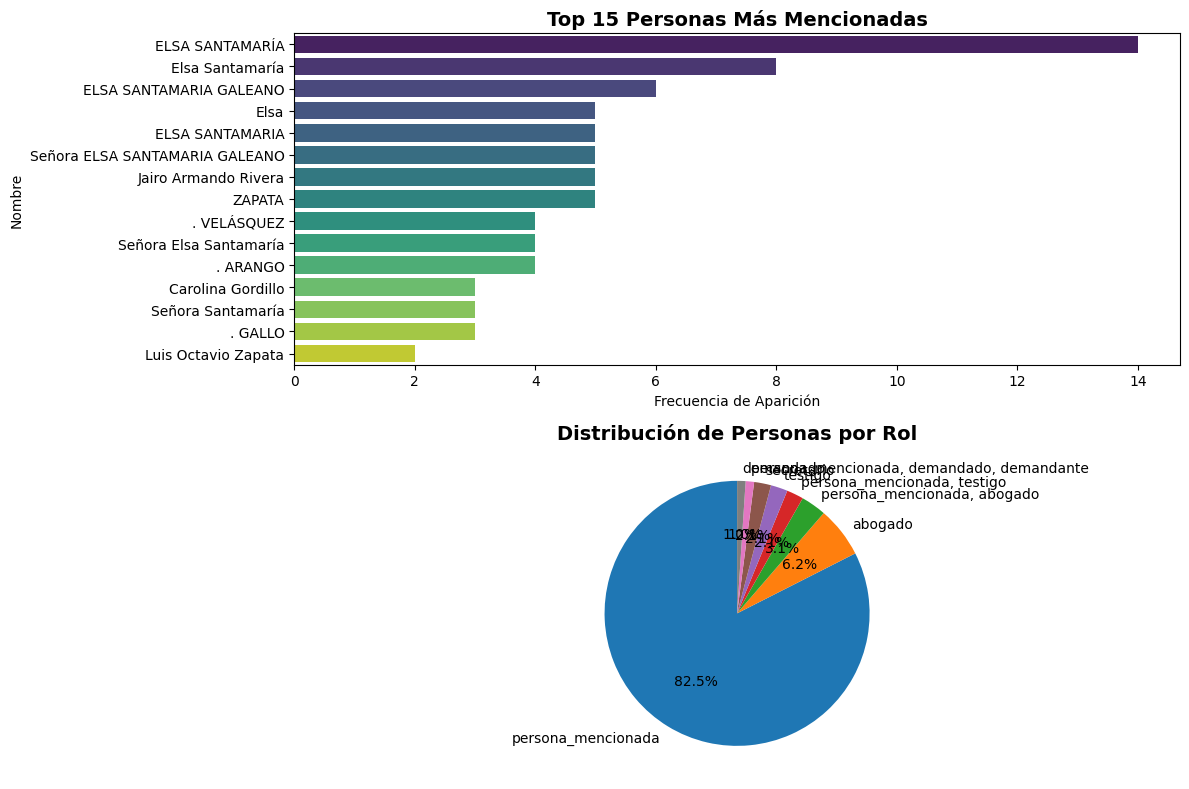


Gráfico guardado en: /content/analisis_personas.png


In [ ]:
!pip install transformers torch PyPDF2 pandas matplotlib seaborn
!pip install -U huggingface_hub

import os
import re
import pandas as pd
import PyPDF2
from collections import Counter, defaultdict
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
from huggingface_hub import login
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar token de Hugging Face
HF_TOKEN = "xxxxxxxxxxxxxxxxxxxxxxxx"
login(token=HF_TOKEN)

# Función para extraer texto del PDF
def extraer_texto_pdf(ruta_pdf):
    """Extrae texto completo de un archivo PDF"""
    texto_completo = ""
    try:
        with open(ruta_pdf, 'rb') as archivo:
            lector_pdf = PyPDF2.PdfReader(archivo)
            print(f"Número de páginas: {len(lector_pdf.pages)}")

            for i, pagina in enumerate(lector_pdf.pages):
                texto_pagina = pagina.extract_text()
                if texto_pagina:
                    texto_completo += texto_pagina + "\n"
                    print(f"Página {i+1} procesada")

        print(f"Texto extraído exitosamente. Longitud: {len(texto_completo)} caracteres")
        return texto_completo
    except Exception as e:
        print(f"Error al leer el PDF: {e}")
        return ""

# Función para limpiar texto
def limpiar_texto(texto):
    """Limpia y prepara el texto para el análisis"""
    # Eliminar saltos de línea excesivos
    texto = re.sub(r'\n+', ' ', texto)
    # Eliminar espacios múltiples
    texto = re.sub(r'\s+', ' ', texto)
    # Limpiar caracteres especiales problemáticos
    texto = re.sub(r'[^\w\s\.\,\;\:\(\)\-\']', ' ', texto)
    return texto.strip()

# Función para dividir texto en chunks
def dividir_en_chunks(texto, max_length=500):
    """Divide el texto en chunks más pequeños para el modelo"""
    palabras = texto.split()
    chunks = []
    chunk_actual = []

    for palabra in palabras:
        if len(' '.join(chunk_actual + [palabra])) > max_length:
            if chunk_actual:
                chunks.append(' '.join(chunk_actual))
                chunk_actual = [palabra]
            else:
                chunks.append(palabra)
        else:
            chunk_actual.append(palabra)

    if chunk_actual:
        chunks.append(' '.join(chunk_actual))

    return chunks

# Función para identificar roles legales
def identificar_rol_legal(texto, nombre):
    """Identifica el rol de una persona basado en el contexto"""
    texto_lower = texto.lower()
    nombre_lower = nombre.lower()

    # Buscar contexto alrededor del nombre
    patron = rf'.{{0,100}}{re.escape(nombre_lower)}.{{0,100}}'
    coincidencias = re.findall(patron, texto_lower)

    roles_encontrados = set()

    # Patrones para identificar roles
    patrones_roles = {
        'demandante': [r'demandante', r'actor', r'solicitante', r'peticionario'],
        'demandado': [r'demandado', r'demandada', r'convocado', r'parte convocada'],
        'abogado': [r'abogado', r'abogada', r'representante legal', r'apoderado', r'letrado'],
        'juez': [r'juez', r'magistrado', r'magistrada', r'juzgado'],
        'testigo': [r'testigo', r'declarante'],
        'perito': [r'perito', r'experto'],
        'secretario': [r'secretario', r'secretaria'],
        'notario': [r'notario', r'notaria']
    }

    for contexto in coincidencias:
        for rol, patrones in patrones_roles.items():
            for patron in patrones:
                if re.search(patron, contexto):
                    roles_encontrados.add(rol)

    return list(roles_encontrados) if roles_encontrados else ['persona_mencionada']

# Configurar modelo NER en español
print("Cargando modelo NER en español...")
modelo_ner = "mrm8488/bert-spanish-cased-finetuned-ner"

try:
    ner_pipeline = pipeline(
        "ner",
        model=modelo_ner,
        tokenizer=modelo_ner,
        aggregation_strategy="simple",
        device=-1  # CPU, cambiar a 0 para GPU
    )
    print("Modelo NER cargado exitosamente")
except Exception as e:
    print(f"Error cargando modelo: {e}")
    # Modelo alternativo
    modelo_ner = "dccuchile/bert-base-spanish-wwm-cased-finetuned-spa-squad2-es"
    ner_pipeline = pipeline("ner", model=modelo_ner, tokenizer=modelo_ner, aggregation_strategy="simple")

# Ruta del archivo
ruta_pdf = "/content/136068 ELSA SANTAMARÍA GALEANO VS. UNION COLOMBIANA DE AUTOBUSES SA.pdf"

# Verificar que el archivo existe
if not os.path.exists(ruta_pdf):
    print(f"Error: No se encontró el archivo en {ruta_pdf}")
    print("Archivos disponibles en /content:")
    for archivo in os.listdir("/content"):
        if archivo.endswith('.pdf'):
            print(f"  - {archivo}")
else:
    # Extraer texto del PDF
    print("Extrayendo texto del PDF...")
    texto_documento = extraer_texto_pdf(ruta_pdf)

    if texto_documento:
        # Limpiar texto
        texto_limpio = limpiar_texto(texto_documento)
        print(f"Texto limpio preparado. Longitud: {len(texto_limpio)} caracteres")

        # Dividir en chunks para el procesamiento
        chunks = dividir_en_chunks(texto_limpio, max_length=450)
        print(f"Texto dividido en {len(chunks)} chunks")

        # Procesar cada chunk
        personas_encontradas = defaultdict(list)
        contador_personas = Counter()

        print("Procesando chunks con modelo NER...")
        for i, chunk in enumerate(chunks):
            try:
                # Aplicar NER
                resultados_ner = ner_pipeline(chunk)

                # Filtrar solo personas
                for entidad in resultados_ner:
                    if entidad['entity_group'] in ['PER', 'PERSON'] and entidad['score'] > 0.8:
                        nombre = entidad['word'].strip()

                        # Limpiar nombre
                        nombre = re.sub(r'^[#\s]+|[#\s]+$', '', nombre)

                        if len(nombre) > 2 and not nombre.isdigit():
                            contador_personas[nombre] += 1

                            # Identificar rol
                            roles = identificar_rol_legal(chunk, nombre)
                            personas_encontradas[nombre].extend(roles)

                if (i + 1) % 10 == 0:
                    print(f"Procesados {i + 1}/{len(chunks)} chunks")

            except Exception as e:
                print(f"Error procesando chunk {i}: {e}")
                continue

        # Consolidar roles para cada persona
        personas_roles = {}
        for nombre, roles_lista in personas_encontradas.items():
            roles_unicos = list(set(roles_lista))
            personas_roles[nombre] = ', '.join(roles_unicos) if roles_unicos else 'persona_mencionada'

        # Crear DataFrame con resultados
        data_personas = []
        for nombre, frecuencia in contador_personas.items():
            rol = personas_roles.get(nombre, 'persona_mencionada')
            data_personas.append({
                'Nombre': nombre,
                'Rol_Identificado': rol,
                'Frecuencia_Aparicion': frecuencia
            })

        # Ordenar por frecuencia
        df_personas = pd.DataFrame(data_personas)
        df_personas = df_personas.sort_values('Frecuencia_Aparicion', ascending=False)

        # Mostrar resultados
        print("\n" + "="*80)
        print("ANÁLISIS DE PERSONAS EN EL DOCUMENTO LEGAL")
        print("="*80)
        print(f"Total de personas identificadas: {len(df_personas)}")
        print("\nTABLA DE RESULTADOS:")
        print("-"*80)
        print(df_personas.to_string(index=False))

        # Estadísticas adicionales
        print("\n" + "="*80)
        print("ESTADÍSTICAS POR ROL:")
        print("="*80)
        roles_stats = df_personas.groupby('Rol_Identificado').agg({
            'Frecuencia_Aparicion': ['count', 'sum']
        }).round(2)
        roles_stats.columns = ['Cantidad_Personas', 'Total_Menciones']
        print(roles_stats)

        # Guardar resultados
        df_personas.to_csv('/content/personas_identificadas.csv', index=False, encoding='utf-8')
        print(f"\nResultados guardados en: /content/personas_identificadas.csv")

        # Crear visualización
        plt.figure(figsize=(12, 8))

        # Top 15 personas más mencionadas
        top_personas = df_personas.head(15)

        plt.subplot(2, 1, 1)
        sns.barplot(data=top_personas, x='Frecuencia_Aparicion', y='Nombre', palette='viridis')
        plt.title('Top 15 Personas Más Mencionadas', fontsize=14, fontweight='bold')
        plt.xlabel('Frecuencia de Aparición')

        # Distribución por roles
        plt.subplot(2, 1, 2)
        roles_count = df_personas['Rol_Identificado'].value_counts()
        plt.pie(roles_count.values, labels=roles_count.index, autopct='%1.1f%%', startangle=90)
        plt.title('Distribución de Personas por Rol', fontsize=14, fontweight='bold')

        plt.tight_layout()
        plt.savefig('/content/analisis_personas.png', dpi=300, bbox_inches='tight')
        plt.show()

        print(f"\nGráfico guardado en: /content/analisis_personas.png")

    else:
        print("No se pudo extraer texto del PDF")

Cargando modelo NER en español...


Some weights of the model checkpoint at mrm8488/bert-spanish-cased-finetuned-ner were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


Modelo NER cargado exitosamente
Extrayendo texto del PDF...
Número de páginas: 58
Página 1 procesada
Página 2 procesada
Página 3 procesada
Página 4 procesada
Página 5 procesada
Página 6 procesada
Página 7 procesada
Página 8 procesada
Página 9 procesada
Página 10 procesada
Página 11 procesada
Página 12 procesada
Página 13 procesada
Página 14 procesada
Página 15 procesada
Página 16 procesada
Página 17 procesada
Página 18 procesada
Página 19 procesada
Página 20 procesada
Página 21 procesada
Página 22 procesada
Página 23 procesada
Página 24 procesada
Página 25 procesada
Página 26 procesada
Página 27 procesada
Página 28 procesada
Página 29 procesada
Página 30 procesada
Página 31 procesada
Página 32 procesada
Página 33 procesada
Página 34 procesada
Página 35 procesada
Página 36 procesada
Página 37 procesada
Página 38 procesada
Página 39 procesada
Página 40 procesada
Página 41 procesada
Página 42 procesada
Página 43 procesada
Página 44 procesada
Página 45 procesada
Página 46 procesada
Página 

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Texto dividido en 335 chunks
Procesando chunks con modelo NER...
Procesados 10/335 chunks
Procesados 20/335 chunks
Procesados 30/335 chunks
Procesados 40/335 chunks
Procesados 50/335 chunks
Procesados 60/335 chunks
Procesados 70/335 chunks
Procesados 80/335 chunks
Procesados 90/335 chunks
Procesados 100/335 chunks
Procesados 110/335 chunks
Procesados 120/335 chunks
Procesados 130/335 chunks
Procesados 140/335 chunks
Procesados 150/335 chunks
Procesados 160/335 chunks
Procesados 170/335 chunks
Procesados 180/335 chunks
Procesados 190/335 chunks
Procesados 200/335 chunks
Procesados 210/335 chunks
Procesados 220/335 chunks
Procesados 230/335 chunks
Procesados 240/335 chunks
Procesados 250/335 chunks
Procesados 260/335 chunks
Procesados 270/335 chunks
Procesados 280/335 chunks
Procesados 290/335 chunks
Procesados 300/335 chunks
Procesados 310/335 chunks
Procesados 320/335 chunks
Procesados 330/335 chunks

ANÁLISIS DEL TRIBUNAL ARBITRAL - 8 PARTES PRINCIPALES
Roles identificados:
1. Convoca

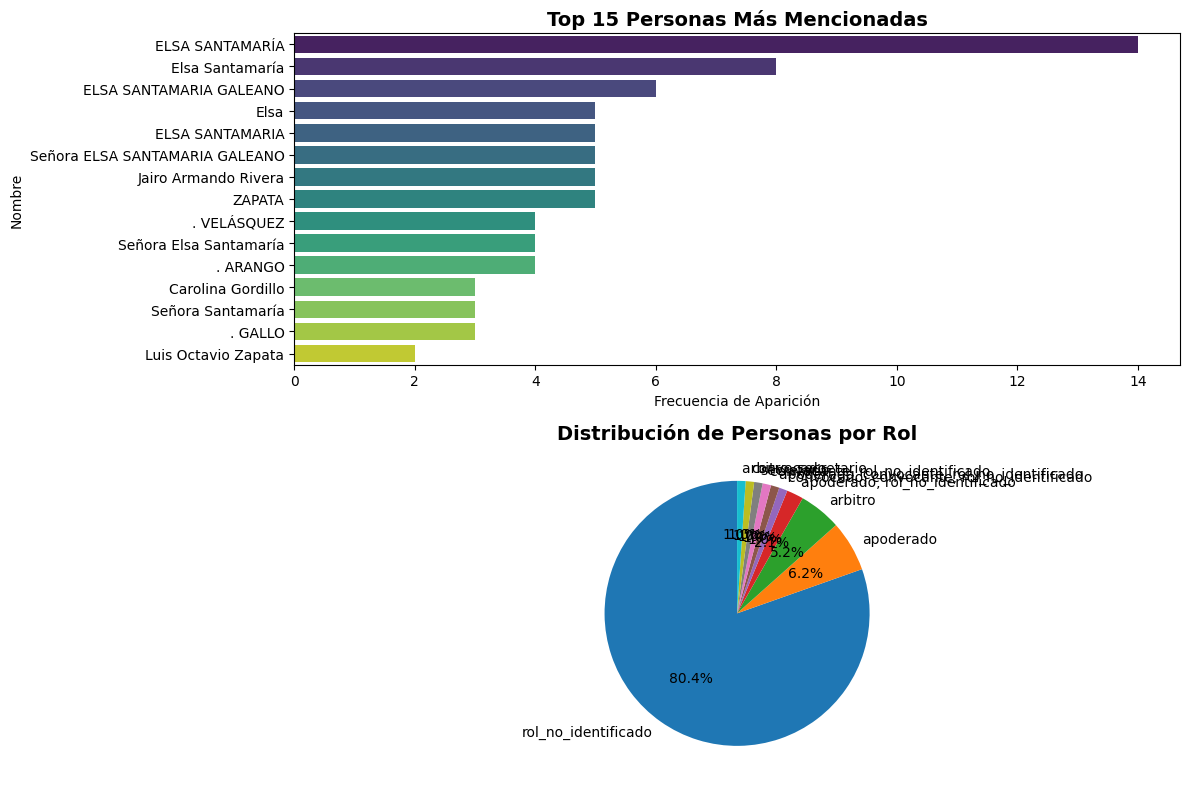


Gráfico guardado en: /content/analisis_personas.png


In [ ]:
!pip install transformers torch PyPDF2 pandas matplotlib seaborn
!pip install -U huggingface_hub

import os
import re
import pandas as pd
import PyPDF2
from collections import Counter, defaultdict
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
from huggingface_hub import login
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar token de Hugging Face
HF_TOKEN = "xxxxxx"
login(token=HF_TOKEN)

# Función para extraer texto del PDF
def extraer_texto_pdf(ruta_pdf):
    """Extrae texto completo de un archivo PDF"""
    texto_completo = ""
    try:
        with open(ruta_pdf, 'rb') as archivo:
            lector_pdf = PyPDF2.PdfReader(archivo)
            print(f"Número de páginas: {len(lector_pdf.pages)}")

            for i, pagina in enumerate(lector_pdf.pages):
                texto_pagina = pagina.extract_text()
                if texto_pagina:
                    texto_completo += texto_pagina + "\n"
                    print(f"Página {i+1} procesada")

        print(f"Texto extraído exitosamente. Longitud: {len(texto_completo)} caracteres")
        return texto_completo
    except Exception as e:
        print(f"Error al leer el PDF: {e}")
        return ""

# Función para limpiar texto
def limpiar_texto(texto):
    """Limpia y prepara el texto para el análisis"""
    # Eliminar saltos de línea excesivos
    texto = re.sub(r'\n+', ' ', texto)
    # Eliminar espacios múltiples
    texto = re.sub(r'\s+', ' ', texto)
    # Limpiar caracteres especiales problemáticos
    texto = re.sub(r'[^\w\s\.\,\;\:\(\)\-\']', ' ', texto)
    return texto.strip()

# Función para dividir texto en chunks
def dividir_en_chunks(texto, max_length=500):
    """Divide el texto en chunks más pequeños para el modelo"""
    palabras = texto.split()
    chunks = []
    chunk_actual = []

    for palabra in palabras:
        if len(' '.join(chunk_actual + [palabra])) > max_length:
            if chunk_actual:
                chunks.append(' '.join(chunk_actual))
                chunk_actual = [palabra]
            else:
                chunks.append(palabra)
        else:
            chunk_actual.append(palabra)

    if chunk_actual:
        chunks.append(' '.join(chunk_actual))

    return chunks

# Función para identificar roles legales
def identificar_rol_legal(texto, nombre):
    """Identifica el rol de una persona basado en el contexto"""
    texto_lower = texto.lower()
    nombre_lower = nombre.lower()

    # Buscar contexto alrededor del nombre
    patron = rf'.{{0,100}}{re.escape(nombre_lower)}.{{0,100}}'
    coincidencias = re.findall(patron, texto_lower)

    roles_encontrados = set()

    # Patrones para identificar roles específicos del arbitraje (solo 8 partes)
    patrones_roles = {
        'convocante': [r'convocante', r'parte convocante', r'demandante', r'actor'],
        'convocado': [r'convocado', r'parte convocada', r'demandado', r'demandada'],
        'apoderado_convocante': [r'apoderado.*convocante', r'representante.*convocante', r'apoderado de.*convocante'],
        'apoderado_convocado': [r'apoderado.*convocado', r'representante.*convocado', r'apoderado de.*convocado'],
        'arbitro_presidente': [r'árbitro presidente', r'arbitro presidente', r'presidente del tribunal'],
        'arbitro': [r'árbitro', r'arbitro', r'miembro del tribunal'],
        'secretario': [r'secretario', r'secretaria', r'secretario del tribunal'],
        'apoderado': [r'apoderado', r'apoderada', r'representante legal']
    }

    for contexto in coincidencias:
        for rol, patrones in patrones_roles.items():
            for patron in patrones:
                if re.search(patron, contexto):
                    roles_encontrados.add(rol)

    return list(roles_encontrados) if roles_encontrados else ['rol_no_identificado']

# Configurar modelo NER en español
print("Cargando modelo NER en español...")
modelo_ner = "mrm8488/bert-spanish-cased-finetuned-ner"

try:
    ner_pipeline = pipeline(
        "ner",
        model=modelo_ner,
        tokenizer=modelo_ner,
        aggregation_strategy="simple",
        device=-1  # CPU, cambiar a 0 para GPU
    )
    print("Modelo NER cargado exitosamente")
except Exception as e:
    print(f"Error cargando modelo: {e}")
    # Modelo alternativo
    modelo_ner = "dccuchile/bert-base-spanish-wwm-cased-finetuned-spa-squad2-es"
    ner_pipeline = pipeline("ner", model=modelo_ner, tokenizer=modelo_ner, aggregation_strategy="simple")

# Ruta del archivo
ruta_pdf = "/content/136068 ELSA SANTAMARÍA GALEANO VS. UNION COLOMBIANA DE AUTOBUSES SA.pdf"

# Verificar que el archivo existe
if not os.path.exists(ruta_pdf):
    print(f"Error: No se encontró el archivo en {ruta_pdf}")
    print("Archivos disponibles en /content:")
    for archivo in os.listdir("/content"):
        if archivo.endswith('.pdf'):
            print(f"  - {archivo}")
else:
    # Extraer texto del PDF
    print("Extrayendo texto del PDF...")
    texto_documento = extraer_texto_pdf(ruta_pdf)

    if texto_documento:
        # Limpiar texto
        texto_limpio = limpiar_texto(texto_documento)
        print(f"Texto limpio preparado. Longitud: {len(texto_limpio)} caracteres")

        # Dividir en chunks para el procesamiento
        chunks = dividir_en_chunks(texto_limpio, max_length=450)
        print(f"Texto dividido en {len(chunks)} chunks")

        # Procesar cada chunk
        personas_encontradas = defaultdict(list)
        contador_personas = Counter()

        print("Procesando chunks con modelo NER...")
        for i, chunk in enumerate(chunks):
            try:
                # Aplicar NER
                resultados_ner = ner_pipeline(chunk)

                # Filtrar solo personas
                for entidad in resultados_ner:
                    if entidad['entity_group'] in ['PER', 'PERSON'] and entidad['score'] > 0.8:
                        nombre = entidad['word'].strip()

                        # Limpiar nombre
                        nombre = re.sub(r'^[#\s]+|[#\s]+$', '', nombre)

                        if len(nombre) > 2 and not nombre.isdigit():
                            contador_personas[nombre] += 1

                            # Identificar rol
                            roles = identificar_rol_legal(chunk, nombre)
                            personas_encontradas[nombre].extend(roles)

                if (i + 1) % 10 == 0:
                    print(f"Procesados {i + 1}/{len(chunks)} chunks")

            except Exception as e:
                print(f"Error procesando chunk {i}: {e}")
                continue

        # Consolidar roles para cada persona
        personas_roles = {}
        for nombre, roles_lista in personas_encontradas.items():
            roles_unicos = list(set(roles_lista))
            personas_roles[nombre] = ', '.join(roles_unicos) if roles_unicos else 'rol_no_identificado'

        # Crear DataFrame con resultados
        data_personas = []
        for nombre, frecuencia in contador_personas.items():
            rol = personas_roles.get(nombre, 'rol_no_identificado')
            data_personas.append({
                'Nombre': nombre,
                'Rol_Identificado': rol,
                'Frecuencia_Aparicion': frecuencia
            })

        # Ordenar por frecuencia
        df_personas = pd.DataFrame(data_personas)
        df_personas = df_personas.sort_values('Frecuencia_Aparicion', ascending=False)

        # Mostrar resultados
        print("\n" + "="*80)
        print("ANÁLISIS DEL TRIBUNAL ARBITRAL - 8 PARTES PRINCIPALES")
        print("="*80)
        print("Roles identificados:")
        print("1. Convocante | 2. Convocado")
        print("3. Apoderado Convocante | 4. Apoderado Convocado")
        print("5. Árbitro Presidente | 6. Árbitro(s)")
        print("7. Secretario | 8. Otros Apoderados")
        print(f"\nTotal de personas identificadas: {len(df_personas)}")
        print("\nTABLA DE RESULTADOS:")
        print("-"*80)
        print(df_personas.to_string(index=False))

        # Estadísticas adicionales
        print("\n" + "="*80)
        print("ESTADÍSTICAS POR ROL:")
        print("="*80)
        roles_stats = df_personas.groupby('Rol_Identificado').agg({
            'Frecuencia_Aparicion': ['count', 'sum']
        }).round(2)
        roles_stats.columns = ['Cantidad_Personas', 'Total_Menciones']
        print(roles_stats)

        # Guardar resultados
        df_personas.to_csv('/content/personas_identificadas.csv', index=False, encoding='utf-8')
        print(f"\nResultados guardados en: /content/personas_identificadas.csv")

        # Crear visualización
        plt.figure(figsize=(12, 8))

        # Top 15 personas más mencionadas
        top_personas = df_personas.head(15)

        plt.subplot(2, 1, 1)
        sns.barplot(data=top_personas, x='Frecuencia_Aparicion', y='Nombre', palette='viridis')
        plt.title('Top 15 Personas Más Mencionadas', fontsize=14, fontweight='bold')
        plt.xlabel('Frecuencia de Aparición')

        # Distribución por roles
        plt.subplot(2, 1, 2)
        roles_count = df_personas['Rol_Identificado'].value_counts()
        plt.pie(roles_count.values, labels=roles_count.index, autopct='%1.1f%%', startangle=90)
        plt.title('Distribución de Personas por Rol', fontsize=14, fontweight='bold')

        plt.tight_layout()
        plt.savefig('/content/analisis_personas.png', dpi=300, bbox_inches='tight')
        plt.show()

        print(f"\nGráfico guardado en: /content/analisis_personas.png")

    else:
        print("No se pudo extraer texto del PDF")

In [ ]:
!pip install networkx plotly pyvis

import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
from collections import defaultdict
import numpy as np

# Datos de las personas identificadas en el tribunal arbitral
personas_tribunal = {
    # Tribunal Arbitral (núcleo central)
    'Jaime Andrés Velásquez Cambas': {'rol': 'arbitro', 'tipo': 'tribunal', 'jerarquia': 2},
    'Juan Camilo Arango Betancourt': {'rol': 'arbitro', 'tipo': 'tribunal', 'jerarquia': 2},
    'Nicolás Lozada Pimiento': {'rol': 'arbitro', 'tipo': 'tribunal', 'jerarquia': 2},
    'Julián Felipe Ovalles Cortés': {'rol': 'secretario', 'tipo': 'tribunal', 'jerarquia': 3},

    # Parte Convocante
    'ELSA SANTAMARÍA': {'rol': 'convocante', 'tipo': 'parte', 'jerarquia': 1},
    'Eduardo Enrique Acosta de Armas': {'rol': 'apoderado_convocante', 'tipo': 'representante', 'jerarquia': 2},

    # Parte Convocada
    'UNION COLOMBIANA DE AUTOBUSES SA': {'rol': 'convocado', 'tipo': 'parte', 'jerarquia': 1},
    'Luis Alejandro Gallo Gómez': {'rol': 'apoderado_convocado', 'tipo': 'representante', 'jerarquia': 2}
}

# Crear el grafo dirigido
G = nx.DiGraph()

# Agregar nodos con atributos
for nombre, attrs in personas_tribunal.items():
    G.add_node(nombre, **attrs)

# Definir las relaciones jerárquicas
relaciones = [
    # Relaciones dentro del tribunal
    ('Jaime Andrés Velásquez Cambas', 'Julián Felipe Ovalles Cortés', 'supervisa', 1),
    ('Juan Camilo Arango Betancourt', 'Julián Felipe Ovalles Cortés', 'supervisa', 1),
    ('Nicolás Lozada Pimiento', 'Julián Felipe Ovalles Cortés', 'supervisa', 1),

    # Relaciones tribunal-partes (jurisdicción)
    ('Jaime Andrés Velásquez Cambas', 'ELSA SANTAMARÍA', 'decide_sobre', 2),
    ('Juan Camilo Arango Betancourt', 'ELSA SANTAMARÍA', 'decide_sobre', 2),
    ('Nicolás Lozada Pimiento', 'ELSA SANTAMARÍA', 'decide_sobre', 2),
    ('Jaime Andrés Velásquez Cambas', 'UNION COLOMBIANA DE AUTOBUSES SA', 'decide_sobre', 2),
    ('Juan Camilo Arango Betancourt', 'UNION COLOMBIANA DE AUTOBUSES SA', 'decide_sobre', 2),
    ('Nicolás Lozada Pimiento', 'UNION COLOMBIANA DE AUTOBUSES SA', 'decide_sobre', 2),

    # Relaciones de representación
    ('ELSA SANTAMARÍA', 'Eduardo Enrique Acosta de Armas', 'representa_por', 1),
    ('UNION COLOMBIANA DE AUTOBUSES SA', 'Luis Alejandro Gallo Gómez', 'representa_por', 1),

    # Relaciones procesales
    ('Eduardo Enrique Acosta de Armas', 'Luis Alejandro Gallo Gómez', 'contradiccion', 3),
    ('ELSA SANTAMARÍA', 'UNION COLOMBIANA DE AUTOBUSES SA', 'disputa', 2)
]

# Agregar aristas con pesos y tipos
for origen, destino, tipo, peso in relaciones:
    if origen in G.nodes and destino in G.nodes:
        G.add_edge(origen, destino, tipo=tipo, peso=peso)

# Función para calcular distancias entre nodos específicos
def calcular_distancias_especificas(grafo, nodos_interes):
    """Calcula distancias entre nodos específicos"""
    distancias = {}

    for i, nodo1 in enumerate(nodos_interes):
        for j, nodo2 in enumerate(nodos_interes):
            if i != j and nodo1 in grafo.nodes and nodo2 in grafo.nodes:
                try:
                    # Distancia más corta (sin considerar dirección)
                    dist_no_dir = nx.shortest_path_length(grafo.to_undirected(), nodo1, nodo2)

                    # Intentar encontrar camino dirigido
                    try:
                        dist_dir = nx.shortest_path_length(grafo, nodo1, nodo2)
                        distancias[f"{nodo1} -> {nodo2}"] = {
                            'distancia_dirigida': dist_dir,
                            'distancia_no_dirigida': dist_no_dir,
                            'camino': nx.shortest_path(grafo, nodo1, nodo2)
                        }
                    except nx.NetworkXNoPath:
                        distancias[f"{nodo1} -> {nodo2}"] = {
                            'distancia_dirigida': float('inf'),
                            'distancia_no_dirigida': dist_no_dir,
                            'camino': nx.shortest_path(grafo.to_undirected(), nodo1, nodo2)
                        }

                except nx.NetworkXNoPath:
                    distancias[f"{nodo1} -> {nodo2}"] = {
                        'distancia_dirigida': float('inf'),
                        'distancia_no_dirigida': float('inf'),
                        'camino': []
                    }

    return distancias

# Nodos de interés para calcular distancias
nodos_interes = [
    'Jaime Andrés Velásquez Cambas',
    'Julián Felipe Ovalles Cortés',
    'Juan Camilo Arango Betancourt',
    'Nicolás Lozada Pimiento',
    'Eduardo Enrique Acosta de Armas',
    'ELSA SANTAMARÍA',
    'Luis Alejandro Gallo Gómez'
]

# Calcular distancias
distancias = calcular_distancias_especificas(G, nodos_interes)

# Crear visualización con matplotlib
plt.figure(figsize=(16, 12))

# Layout jerárquico
pos = nx.spring_layout(G, k=3, iterations=50)

# Colores por tipo de actor
colores_nodos = {
    'tribunal': '#FF6B6B',      # Rojo para árbitros
    'parte': '#4ECDC4',         # Verde para partes
    'representante': '#45B7D1'  # Azul para apoderados
}

# Tamaños por jerarquía
tamaños_nodos = {1: 3000, 2: 2000, 3: 1500}

# Dibujar nodos
for nodo, attrs in G.nodes(data=True):
    color = colores_nodos.get(attrs['tipo'], '#95A5A6')
    tamaño = tamaños_nodos.get(attrs['jerarquia'], 1000)
    nx.draw_networkx_nodes(G, pos, nodelist=[nodo], node_color=color,
                          node_size=tamaño, alpha=0.8)

# Dibujar aristas con diferentes estilos según el tipo
for (u, v, d) in G.edges(data=True):
    if d['tipo'] == 'supervisa':
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color='red',
                              arrows=True, arrowsize=20, width=2)
    elif d['tipo'] == 'decide_sobre':
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color='orange',
                              arrows=True, arrowsize=20, width=2, style='dashed')
    elif d['tipo'] == 'representa_por':
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color='blue',
                              arrows=True, arrowsize=20, width=2)
    elif d['tipo'] == 'contradiccion':
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color='purple',
                              arrows=True, arrowsize=20, width=3, style='dotted')
    else:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color='gray',
                              arrows=True, arrowsize=15, width=1)

# Etiquetas de nodos (nombres cortos)
labels = {}
for nodo in G.nodes():
    if len(nodo) > 25:
        labels[nodo] = nodo[:25] + "..."
    else:
        labels[nodo] = nodo

nx.draw_networkx_labels(G, pos, labels, font_size=8, font_weight='bold')

plt.title('Grafo Jerárquico del Tribunal Arbitral\nELSA SANTAMARÍA vs. UNIÓN COLOMBIANA DE AUTOBUSES SA',
          fontsize=16, fontweight='bold', pad=20)

# Leyenda
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FF6B6B', label='Tribunal Arbitral'),
    Patch(facecolor='#4ECDC4', label='Partes'),
    Patch(facecolor='#45B7D1', label='Representantes'),
    plt.Line2D([0], [0], color='red', lw=2, label='Supervisión'),
    plt.Line2D([0], [0], color='orange', lw=2, linestyle='--', label='Jurisdicción'),
    plt.Line2D([0], [0], color='blue', lw=2, label='Representación'),
    plt.Line2D([0], [0], color='purple', lw=2, linestyle=':', label='Contradicción')
]

plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.axis('off')
plt.tight_layout()
plt.show()

# Mostrar análisis de distancias
print("="*80)
print("ANÁLISIS DE DISTANCIAS ENTRE ACTORES DEL TRIBUNAL ARBITRAL")
print("="*80)

# Crear tabla de distancias
tabla_distancias = []
for relacion, datos in distancias.items():
    origen, destino = relacion.split(" -> ")
    tabla_distancias.append({
        'Origen': origen[:30] + "..." if len(origen) > 30 else origen,
        'Destino': destino[:30] + "..." if len(destino) > 30 else destino,
        'Distancia_Dirigida': datos['distancia_dirigida'] if datos['distancia_dirigida'] != float('inf') else 'No conectado',
        'Distancia_No_Dirigida': datos['distancia_no_dirigida'] if datos['distancia_no_dirigida'] != float('inf') else 'No conectado',
        'Camino_Más_Corto': ' -> '.join([n[:15] for n in datos['camino']]) if datos['camino'] else 'Sin camino'
    })

df_distancias = pd.DataFrame(tabla_distancias)
print(df_distancias.to_string(index=False))

# Análisis estadístico del grafo
print("\n" + "="*80)
print("ESTADÍSTICAS DEL GRAFO")
print("="*80)
print(f"Número de nodos: {G.number_of_nodes()}")
print(f"Número de aristas: {G.number_of_edges()}")
print(f"Densidad del grafo: {nx.density(G):.3f}")

# Centralidad
centralidad_grado = nx.degree_centrality(G)
centralidad_cercania = nx.closeness_centrality(G)
centralidad_intermediacion = nx.betweenness_centrality(G)

print(f"\nCENTRALIDAD DE GRADO (Top 3):")
for nodo, cent in sorted(centralidad_grado.items(), key=lambda x: x[1], reverse=True)[:3]:
    print(f"  {nodo[:40]}: {cent:.3f}")

print(f"\nCENTRALIDAD DE CERCANÍA (Top 3):")
for nodo, cent in sorted(centralidad_cercania.items(), key=lambda x: x[1], reverse=True)[:3]:
    print(f"  {nodo[:40]}: {cent:.3f}")

print(f"\nCENTRALIDAD DE INTERMEDIACIÓN (Top 3):")
for nodo, cent in sorted(centralidad_intermediacion.items(), key=lambda x: x[1], reverse=True)[:3]:
    print(f"  {nodo[:40]}: {cent:.3f}")

# Crear matriz de distancias para visualización
print("\n" + "="*80)
print("MATRIZ DE DISTANCIAS RESUMIDA")
print("="*80)

# Crear matriz simplificada
nodos_cortos = [n[:20] + "..." if len(n) > 20 else n for n in nodos_interes]
matriz_dist = np.full((len(nodos_interes), len(nodos_interes)), np.inf)

for i, nodo1 in enumerate(nodos_interes):
    for j, nodo2 in enumerate(nodos_interes):
        if i != j:
            key = f"{nodo1} -> {nodo2}"
            if key in distancias:
                dist = distancias[key]['distancia_no_dirigida']
                matriz_dist[i][j] = dist if dist != float('inf') else 999

# Mostrar matriz
df_matriz = pd.DataFrame(matriz_dist, index=nodos_cortos, columns=nodos_cortos)
print(df_matriz.round(0))

# Guardar resultados
df_distancias.to_csv('/content/distancias_tribunal.csv', index=False)
df_matriz.to_csv('/content/matriz_distancias.csv')

print(f"\nResultados guardados en:")
print(f"- /content/distancias_tribunal.csv")
print(f"- /content/matriz_distancias.csv")

# Crear visualización interactiva con Plotly
fig = go.Figure()

# Posiciones para plotly
pos_plotly = {nodo: (pos[nodo][0], pos[nodo][1]) for nodo in G.nodes()}

# Agregar aristas
edge_x = []
edge_y = []
edge_info = []

for edge in G.edges(data=True):
    x0, y0 = pos_plotly[edge[0]]
    x1, y1 = pos_plotly[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_info.append(f"{edge[0]} -> {edge[1]} ({edge[2]['tipo']})")

fig.add_trace(go.Scatter(x=edge_x, y=edge_y,
                         line=dict(width=2, color='#888'),
                         hoverinfo='none',
                         mode='lines',
                         name='Relaciones'))

# Agregar nodos
for nodo, attrs in G.nodes(data=True):
    x, y = pos_plotly[nodo]
    color = colores_nodos.get(attrs['tipo'], '#95A5A6')
    size = tamaños_nodos.get(attrs['jerarquia'], 1000) / 50

    fig.add_trace(go.Scatter(x=[x], y=[y],
                             mode='markers+text',
                             marker=dict(size=size, color=color),
                             text=nodo,
                             textposition="middle center",
                             textfont=dict(size=10),
                             hovertemplate=f"<b>{nodo}</b><br>Rol: {attrs['rol']}<br>Tipo: {attrs['tipo']}",
                             name=attrs['tipo']))

fig.update_layout(title='Grafo Interactivo del Tribunal Arbitral',
                  showlegend=True,
                  hovermode='closest',
                  margin=dict(b=20,l=5,r=5,t=40),
                  annotations=[ dict(
                      text="Grafo jerárquico mostrando relaciones entre actores del proceso arbitral",
                      showarrow=False,
                      xref="paper", yref="paper",
                      x=0.005, y=-0.002, xanchor='left', yanchor='bottom',
                      font=dict(color='#999', size=12)
                  )],
                  xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                  yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

fig.show()

print("\n✅ Análisis del grafo completado exitosamente!")
print("📊 Se han generado visualizaciones estáticas e interactivas")
print("📈 Se han calculado todas las distancias y métricas de centralidad")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 12.6 MB/s eta 0:00:00


ANÁLISIS DE DISTANCIAS ENTRE ACTORES DEL TRIBUNAL ARBITRAL
                           Origen                           Destino Distancia_Dirigida  Distancia_No_Dirigida                                                         Camino_Más_Corto
    Jaime Andrés Velásquez Cambas      Julián Felipe Ovalles Cortés                  1                      1                                       Jaime Andrés Ve -> Julián Felipe O
    Jaime Andrés Velásquez Cambas     Juan Camilo Arango Betancourt       No conectado                      2                    Jaime Andrés Ve -> Julián Felipe O -> Juan Camilo Ara
    Jaime Andrés Velásquez Cambas           Nicolás Lozada Pimiento       No conectado                      2                    Jaime Andrés Ve -> Julián Felipe O -> Nicolás Lozada 
    Jaime Andrés Velásquez Cambas Eduardo Enrique Acosta de Arma...                  2                      2                    Jaime Andrés Ve -> ELSA SANTAMARÍA -> Eduardo Enrique
    Jaime Andrés Velásquez


✅ Análisis del grafo completado exitosamente!
📊 Se han generado visualizaciones estáticas e interactivas
📈 Se han calculado todas las distancias y métricas de centralidad


ANÁLISIS DE DISTANCIAS EN EL TRIBUNAL ARBITRAL
Distancias más cortas entre las partes:


Desde: ELSA SANTAMARÍA (convocada)
--------------------------------------------------
  → Eduardo Enrique Acosta de Armas: 1 pasos
  → Jaime Andrés Velásquez Cambas: 1 pasos
  → Juan Camilo Arango Betancourt: 2 pasos
  → Julián Felipe Ovalles Cortés: 2 pasos
  → Luis Alejandro Gallo Gómez: 1 pasos
  → Nicolás Lozada Pimiento: 2 pasos

Desde: Eduardo Enrique Acosta de Armas (apoderado_convocante)
--------------------------------------------------
  → ELSA SANTAMARÍA: 1 pasos
  → Jaime Andrés Velásquez Cambas: 1 pasos
  → Juan Camilo Arango Betancourt: 2 pasos
  → Julián Felipe Ovalles Cortés: 2 pasos
  → Luis Alejandro Gallo Gómez: 1 pasos
  → Nicolás Lozada Pimiento: 2 pasos

Desde: Jaime Andrés Velásquez Cambas (arbitro)
--------------------------------------------------
  → ELSA SANTAMARÍA: 1 pasos
  → Eduardo Enrique Acosta de Armas: 1 pasos
  → Juan Camilo Arango Betancourt: 1 pasos
  → Julián 

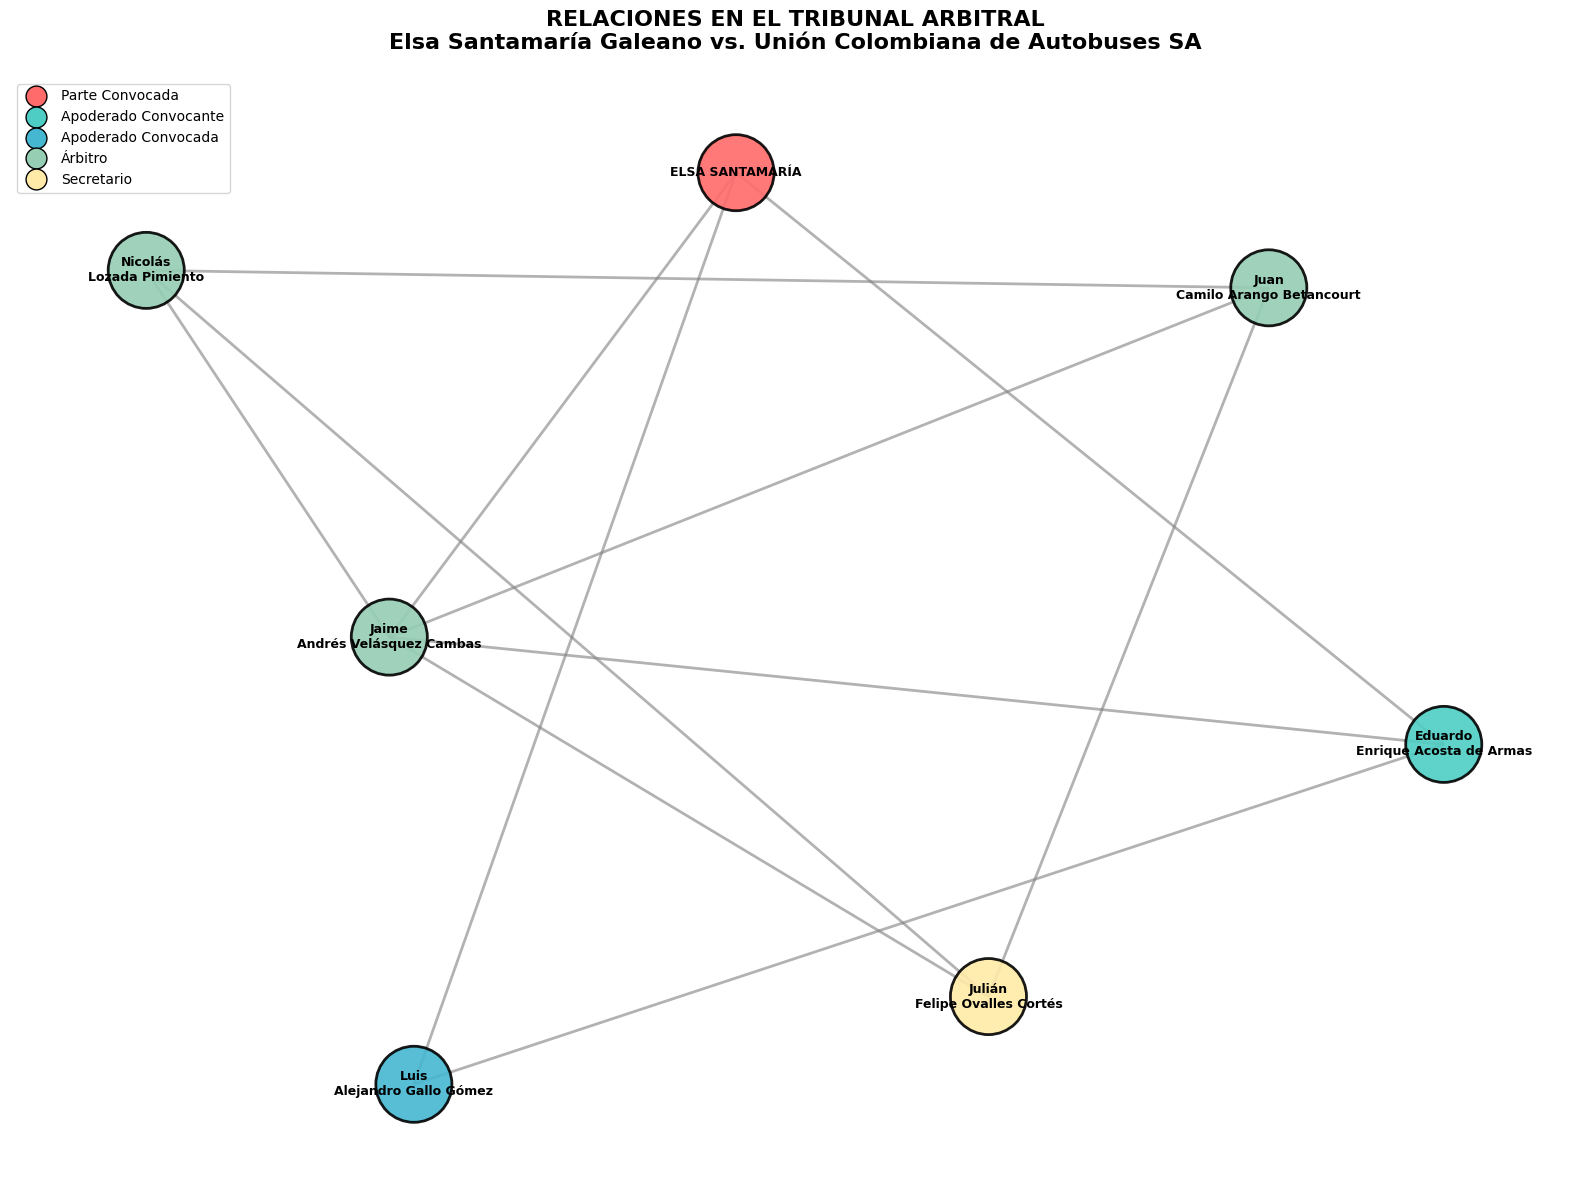


MÉTRICAS DEL GRAFO:
Número total de nodos: 7
Número total de aristas: 11
Densidad del grafo: 0.524
Persona más central: Jaime Andrés Velásquez Cambas (centralidad: 0.833)
Diámetro del grafo (distancia máxima): 3 pasos

Grafo guardado como: /content/grafo_tribunal_arbitral.png


In [ ]:
!pip install networkx

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyBboxPatch

# Crear el grafo
G = nx.Graph()

# Definir las personas y sus roles
personas = {
    'ELSA SANTAMARÍA': 'convocada',
    'Eduardo Enrique Acosta de Armas': 'apoderado_convocante',
    'Luis Alejandro Gallo Gómez': 'apoderado_convocada',
    'Jaime Andrés Velásquez Cambas': 'arbitro',
    'Juan Camilo Arango Betancourt': 'arbitro',
    'Nicolás Lozada Pimiento': 'arbitro',
    'Julián Felipe Ovalles Cortés': 'secretario'
}

# Agregar nodos al grafo
for persona, rol in personas.items():
    G.add_node(persona, rol=rol)

# Definir las relaciones (aristas)
relaciones = [
    # Relaciones directas del proceso arbitral
    ('ELSA SANTAMARÍA', 'Luis Alejandro Gallo Gómez'),  # convocada con su apoderado
    ('Eduardo Enrique Acosta de Armas', 'ELSA SANTAMARÍA'),  # apoderados enfrentados
    ('Eduardo Enrique Acosta de Armas', 'Luis Alejandro Gallo Gómez'),  # apoderados enfrentados

    # Relaciones con el tribunal
    ('Jaime Andrés Velásquez Cambas', 'Juan Camilo Arango Betancourt'),  # árbitros
    ('Jaime Andrés Velásquez Cambas', 'Nicolás Lozada Pimiento'),  # árbitros
    ('Juan Camilo Arango Betancourt', 'Nicolás Lozada Pimiento'),  # árbitros
    ('Julián Felipe Ovalles Cortés', 'Jaime Andrés Velásquez Cambas'),  # secretario con árbitro
    ('Julián Felipe Ovalles Cortés', 'Juan Camilo Arango Betancourt'),  # secretario con árbitro
    ('Julián Felipe Ovalles Cortés', 'Nicolás Lozada Pimiento'),  # secretario con árbitro

    # Relaciones tribunal con partes
    ('Jaime Andrés Velásquez Cambas', 'ELSA SANTAMARÍA'),  # tribunal con convocada
    ('Jaime Andrés Velásquez Cambas', 'Eduardo Enrique Acosta de Armas'),  # tribunal con apoderado convocante
]

# Agregar aristas al grafo
G.add_edges_from(relaciones)

# Calcular distancias entre todos los nodos
print("ANÁLISIS DE DISTANCIAS EN EL TRIBUNAL ARBITRAL")
print("=" * 60)
print("Distancias más cortas entre las partes:\n")

distancias = dict(nx.all_pairs_shortest_path_length(G))

# Mostrar distancias de forma organizada
for origen in sorted(personas.keys()):
    print(f"\nDesde: {origen} ({personas[origen]})")
    print("-" * 50)
    for destino in sorted(personas.keys()):
        if origen != destino:
            dist = distancias[origen][destino]
            print(f"  → {destino}: {dist} pasos")

# Crear visualización del grafo
plt.figure(figsize=(16, 12))

# Definir colores por rol
colores_roles = {
    'convocada': '#FF6B6B',           # Rojo suave
    'apoderado_convocante': '#4ECDC4', # Verde azulado
    'apoderado_convocada': '#45B7D1',  # Azul
    'arbitro': '#96CEB4',              # Verde suave
    'secretario': '#FFEAA7'            # Amarillo suave
}

# Asignar colores a los nodos
colores_nodos = [colores_roles[personas[nodo]] for nodo in G.nodes()]

# Usar layout spring para mejor distribución
pos = nx.spring_layout(G, k=3, iterations=50, seed=42)

# Dibujar el grafo
nx.draw_networkx_nodes(G, pos,
                      node_color=colores_nodos,
                      node_size=3000,
                      alpha=0.9,
                      edgecolors='black',
                      linewidths=2)

nx.draw_networkx_edges(G, pos,
                      edge_color='gray',
                      width=2,
                      alpha=0.6)

# Agregar etiquetas con nombres más cortos para mejor legibilidad
etiquetas = {}
for nodo in G.nodes():
    if len(nodo) > 20:
        # Usar solo apellidos para nombres largos
        partes = nodo.split()
        if len(partes) >= 2:
            etiquetas[nodo] = f"{partes[0]}\n{' '.join(partes[1:])}"
        else:
            etiquetas[nodo] = nodo
    else:
        etiquetas[nodo] = nodo

nx.draw_networkx_labels(G, pos,
                       labels=etiquetas,
                       font_size=9,
                       font_weight='bold',
                       font_color='black')

plt.title('RELACIONES EN EL TRIBUNAL ARBITRAL\nElsa Santamaría Galeano vs. Unión Colombiana de Autobuses SA',
          fontsize=16, fontweight='bold', pad=20)

# Crear leyenda
leyenda_elementos = []
for rol, color in colores_roles.items():
    etiqueta_rol = {
        'convocada': 'Parte Convocada',
        'apoderado_convocante': 'Apoderado Convocante',
        'apoderado_convocada': 'Apoderado Convocada',
        'arbitro': 'Árbitro',
        'secretario': 'Secretario'
    }

    leyenda_elementos.append(plt.Line2D([0], [0], marker='o', color='w',
                                       markerfacecolor=color, markersize=15,
                                       label=etiqueta_rol[rol], markeredgecolor='black'))

plt.legend(handles=leyenda_elementos, loc='upper left', bbox_to_anchor=(0, 1))

plt.axis('off')
plt.tight_layout()
plt.savefig('/content/grafo_tribunal_arbitral.png', dpi=300, bbox_inches='tight')
plt.show()

# Mostrar métricas del grafo
print(f"\nMÉTRICAS DEL GRAFO:")
print("=" * 30)
print(f"Número total de nodos: {G.number_of_nodes()}")
print(f"Número total de aristas: {G.number_of_edges()}")
print(f"Densidad del grafo: {nx.density(G):.3f}")

# Identificar el nodo más central (más conexiones)
centralidad = nx.degree_centrality(G)
nodo_central = max(centralidad.items(), key=lambda x: x[1])
print(f"Persona más central: {nodo_central[0]} (centralidad: {nodo_central[1]:.3f})")

# Identificar caminos más largos
diametro = nx.diameter(G)
print(f"Diámetro del grafo (distancia máxima): {diametro} pasos")

print(f"\nGrafo guardado como: /content/grafo_tribunal_arbitral.png")

In [ ]:
!pip install networkx

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyBboxPatch

# Crear el grafo
G = nx.Graph()

# Definir las personas y sus roles
personas = {
    'UNIÓN COLOMBIANA DE BUSES S.A.': 'convocante',
    'ELSA SANTAMARÍA': 'convocada',
    'Eduardo Enrique Acosta de Armas': 'apoderado_convocante',
    'Luis Alejandro Gallo Gómez': 'apoderado_convocada',
    'Jaime Andrés Velásquez Cambas': 'arbitro',
    'Juan Camilo Arango Betancourt': 'arbitro',
    'Nicolás Lozada Pimiento': 'arbitro',
    'Julián Felipe Ovalles Cortés': 'secretario'
}

# Agregar nodos al grafo
for persona, rol in personas.items():
    G.add_node(persona, rol=rol)

# Definir las relaciones (aristas)
relaciones = [
    # Relaciones principales del proceso
    ('UNIÓN COLOMBIANA DE BUSES S.A.', 'Eduardo Enrique Acosta de Armas'),  # convocante con su apoderado
    ('ELSA SANTAMARÍA', 'Luis Alejandro Gallo Gómez'),  # convocada con su apoderado
    ('UNIÓN COLOMBIANA DE BUSES S.A.', 'ELSA SANTAMARÍA'),  # partes enfrentadas
    ('Eduardo Enrique Acosta de Armas', 'Luis Alejandro Gallo Gómez'),  # apoderados enfrentados

    # Relaciones dentro del tribunal arbitral
    ('Jaime Andrés Velásquez Cambas', 'Juan Camilo Arango Betancourt'),  # árbitros
    ('Jaime Andrés Velásquez Cambas', 'Nicolás Lozada Pimiento'),  # árbitros
    ('Juan Camilo Arango Betancourt', 'Nicolás Lozada Pimiento'),  # árbitros
    ('Julián Felipe Ovalles Cortés', 'Jaime Andrés Velásquez Cambas'),  # secretario con árbitro
    ('Julián Felipe Ovalles Cortés', 'Juan Camilo Arango Betancourt'),  # secretario con árbitro
    ('Julián Felipe Ovalles Cortés', 'Nicolás Lozada Pimiento'),  # secretario con árbitro

    # Relaciones tribunal con las partes
    ('Jaime Andrés Velásquez Cambas', 'UNIÓN COLOMBIANA DE BUSES S.A.'),  # árbitro presidente con convocante
    ('Jaime Andrés Velásquez Cambas', 'ELSA SANTAMARÍA'),  # árbitro presidente con convocada
]

# Agregar aristas al grafo
G.add_edges_from(relaciones)

# Calcular distancias entre todos los nodos
print("ANÁLISIS DE DISTANCIAS EN EL TRIBUNAL ARBITRAL")
print("=" * 60)
print("Distancias más cortas entre las partes:\n")

distancias = dict(nx.all_pairs_shortest_path_length(G))

# Mostrar distancias de forma organizada
for origen in sorted(personas.keys()):
    print(f"\nDesde: {origen} ({personas[origen]})")
    print("-" * 50)
    for destino in sorted(personas.keys()):
        if origen != destino:
            dist = distancias[origen][destino]
            print(f"  → {destino}: {dist} pasos")

# Crear visualización del grafo con layout jerárquico
plt.figure(figsize=(18, 14))

# Definir colores por rol
colores_roles = {
    'convocante': '#FF9999',              # Rojo claro
    'convocada': '#FF6B6B',               # Rojo suave
    'apoderado_convocante': '#4ECDC4',    # Verde azulado
    'apoderado_convocada': '#45B7D1',     # Azul
    'arbitro': '#96CEB4',                 # Verde suave
    'secretario': '#FFEAA7'               # Amarillo suave
}

# Definir posiciones manuales para layout jerárquico ordenado
pos = {
    # NIVEL 1: TRIBUNAL ARBITRAL (Superior)
    'Jaime Andrés Velásquez Cambas': (0, 3),      # Árbitro presidente (centro)
    'Juan Camilo Arango Betancourt': (-2, 3),     # Árbitro izquierda
    'Nicolás Lozada Pimiento': (2, 3),            # Árbitro derecha
    'Julián Felipe Ovalles Cortés': (0, 2),       # Secretario (abajo del presidente)

    # NIVEL 2: PARTES PRINCIPALES (Medio)
    'UNIÓN COLOMBIANA DE BUSES S.A.': (-3, 0),    # Convocante izquierda
    'ELSA SANTAMARÍA': (3, 0),                    # Convocada derecha

    # NIVEL 3: APODERADOS (Inferior)
    'Eduardo Enrique Acosta de Armas': (-3, -2),   # Apoderado convocante
    'Luis Alejandro Gallo Gómez': (3, -2),         # Apoderado convocada
}

# Asignar colores a los nodos
colores_nodos = [colores_roles[personas[nodo]] for nodo in G.nodes()]

# Dibujar el grafo con estructura jerárquica
nx.draw_networkx_nodes(G, pos,
                      node_color=colores_nodos,
                      node_size=4000,
                      alpha=0.9,
                      edgecolors='black',
                      linewidths=3)

# Dibujar diferentes tipos de aristas con estilos diferentes
aristas_tribunal = [('Jaime Andrés Velásquez Cambas', 'Juan Camilo Arango Betancourt'),
                    ('Jaime Andrés Velásquez Cambas', 'Nicolás Lozada Pimiento'),
                    ('Juan Camilo Arango Betancourt', 'Nicolás Lozada Pimiento')]

aristas_secretario = [('Julián Felipe Ovalles Cortés', 'Jaime Andrés Velásquez Cambas'),
                      ('Julián Felipe Ovalles Cortés', 'Juan Camilo Arango Betancourt'),
                      ('Julián Felipe Ovalles Cortés', 'Nicolás Lozada Pimiento')]

aristas_representacion = [('UNIÓN COLOMBIANA DE BUSES S.A.', 'Eduardo Enrique Acosta de Armas'),
                          ('ELSA SANTAMARÍA', 'Luis Alejandro Gallo Gómez')]

aristas_proceso = [('UNIÓN COLOMBIANA DE BUSES S.A.', 'ELSA SANTAMARÍA'),
                   ('Eduardo Enrique Acosta de Armas', 'Luis Alejandro Gallo Gómez')]

aristas_jurisdiccion = [('Jaime Andrés Velásquez Cambas', 'UNIÓN COLOMBIANA DE BUSES S.A.'),
                        ('Jaime Andrés Velásquez Cambas', 'ELSA SANTAMARÍA')]

# Dibujar aristas con diferentes estilos
nx.draw_networkx_edges(G, pos, edgelist=aristas_tribunal,
                      edge_color='#2E8B57', width=3, alpha=0.8, style='-')

nx.draw_networkx_edges(G, pos, edgelist=aristas_secretario,
                      edge_color='#DAA520', width=2, alpha=0.7, style='--')

nx.draw_networkx_edges(G, pos, edgelist=aristas_representacion,
                      edge_color='#4169E1', width=4, alpha=0.9, style='-')

nx.draw_networkx_edges(G, pos, edgelist=aristas_proceso,
                      edge_color='#DC143C', width=3, alpha=0.8, style=':')

nx.draw_networkx_edges(G, pos, edgelist=aristas_jurisdiccion,
                      edge_color='#708090', width=2, alpha=0.6, style='-')

# Agregar etiquetas optimizadas para el layout jerárquico
etiquetas_cortas = {
    'UNIÓN COLOMBIANA DE BUSES S.A.': 'UCOLBUS\n(Convocante)',
    'ELSA SANTAMARÍA': 'ELSA\nSANTAMARÍA\n(Convocada)',
    'Eduardo Enrique Acosta de Armas': 'Eduardo\nAcosta\n(Apod. Conv.)',
    'Luis Alejandro Gallo Gómez': 'Luis\nGallo\n(Apod. Convoc.)',
    'Jaime Andrés Velásquez Cambas': 'Jaime\nVelásquez\n(Árbitro Pres.)',
    'Juan Camilo Arango Betancourt': 'Juan Camilo\nArango\n(Árbitro)',
    'Nicolás Lozada Pimiento': 'Nicolás\nLozada\n(Árbitro)',
    'Julián Felipe Ovalles Cortés': 'Julián\nOvalles\n(Secretario)'
}

nx.draw_networkx_labels(G, pos,
                       labels=etiquetas_cortas,
                       font_size=10,
                       font_weight='bold',
                       font_color='black')

plt.title('ESTRUCTURA JERÁRQUICA DEL TRIBUNAL ARBITRAL\nUnión Colombiana de Buses S.A. vs. Elsa Santamaría Galeano',
          fontsize=18, fontweight='bold', pad=30)

# Crear leyenda mejorada con dos columnas
fig = plt.gcf()
ax = plt.gca()

# Leyenda de roles (izquierda)
leyenda_roles = []
for rol, color in colores_roles.items():
    etiqueta_rol = {
        'convocante': 'Parte Convocante',
        'convocada': 'Parte Convocada',
        'apoderado_convocante': 'Apoderado Convocante',
        'apoderado_convocada': 'Apoderado Convocada',
        'arbitro': 'Árbitro',
        'secretario': 'Secretario'
    }

    leyenda_roles.append(plt.Line2D([0], [0], marker='o', color='w',
                                   markerfacecolor=color, markersize=15,
                                   label=etiqueta_rol[rol], markeredgecolor='black', markeredgewidth=2))

# Leyenda de tipos de relación (derecha)
leyenda_relaciones = [
    plt.Line2D([0], [0], color='#2E8B57', linewidth=3, label='Relaciones Tribunal'),
    plt.Line2D([0], [0], color='#DAA520', linewidth=2, linestyle='--', label='Apoyo Secretarial'),
    plt.Line2D([0], [0], color='#4169E1', linewidth=4, label='Representación Legal'),
    plt.Line2D([0], [0], color='#DC143C', linewidth=3, linestyle=':', label='Conflicto Procesal'),
    plt.Line2D([0], [0], color='#708090', linewidth=2, label='Jurisdicción')
]

# Posicionar leyendas
legend1 = plt.legend(handles=leyenda_roles, title='ROLES', loc='upper left',
                    bbox_to_anchor=(-0.15, 1), frameon=True, fancybox=True, shadow=True)
legend2 = plt.legend(handles=leyenda_relaciones, title='TIPOS DE RELACIÓN', loc='upper right',
                    bbox_to_anchor=(1.15, 1), frameon=True, fancybox=True, shadow=True)

# Agregar la primera leyenda de vuelta (matplotlib solo mantiene una)
plt.gca().add_artist(legend1)

# Añadir anotaciones de niveles jerárquicos
plt.text(-4.5, 3, 'TRIBUNAL\nARBITRAL', fontsize=12, fontweight='bold',
         ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.7))
plt.text(-4.5, 0, 'PARTES\nPROCESALES', fontsize=12, fontweight='bold',
         ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.7))
plt.text(-4.5, -2, 'REPRESENTACIÓN\nLEGAL', fontsize=12, fontweight='bold',
         ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7))

plt.axis('off')
plt.xlim(-5, 5)
plt.ylim(-3, 4)
plt.tight_layout()
plt.savefig('/content/grafo_tribunal_arbitral_jerarquico.png', dpi=300, bbox_inches='tight')
plt.show()

# Mostrar métricas del grafo
print(f"\nMÉTRICAS DEL GRAFO:")
print("=" * 30)
print(f"Número total de nodos: {G.number_of_nodes()}")
print(f"Número total de aristas: {G.number_of_edges()}")
print(f"Densidad del grafo: {nx.density(G):.3f}")

# Identificar el nodo más central (más conexiones)
centralidad = nx.degree_centrality(G)
nodo_central = max(centralidad.items(), key=lambda x: x[1])
print(f"Persona más central: {nodo_central[0]} (centralidad: {nodo_central[1]:.3f})")

# Identificar caminos más largos
diametro = nx.diameter(G)
print(f"Diámetro del grafo (distancia máxima): {diametro} pasos")

print(f"\nGrafo guardado como: /content/grafo_tribunal_arbitral.png")

ANÁLISIS DE DISTANCIAS EN EL TRIBUNAL ARBITRAL
Distancias más cortas entre las partes:


Desde: ELSA SANTAMARÍA (convocada)
--------------------------------------------------
  → Eduardo Enrique Acosta de Armas: 2 pasos
  → Jaime Andrés Velásquez Cambas: 1 pasos
  → Juan Camilo Arango Betancourt: 2 pasos
  → Julián Felipe Ovalles Cortés: 2 pasos
  → Luis Alejandro Gallo Gómez: 1 pasos
  → Nicolás Lozada Pimiento: 2 pasos
  → UNIÓN COLOMBIANA DE BUSES S.A.: 1 pasos

Desde: Eduardo Enrique Acosta de Armas (apoderado_convocante)
--------------------------------------------------
  → ELSA SANTAMARÍA: 2 pasos
  → Jaime Andrés Velásquez Cambas: 2 pasos
  → Juan Camilo Arango Betancourt: 3 pasos
  → Julián Felipe Ovalles Cortés: 3 pasos
  → Luis Alejandro Gallo Gómez: 1 pasos
  → Nicolás Lozada Pimiento: 3 pasos
  → UNIÓN COLOMBIANA DE BUSES S.A.: 1 pasos

Desde: Jaime Andrés Velásquez Cambas (arbitro)
--------------------------------------------------
  → ELSA SANTAMARÍA: 1 pasos
  → Eduardo


MÉTRICAS DEL GRAFO:
Número total de nodos: 8
Número total de aristas: 12
Densidad del grafo: 0.429
Persona más central: Jaime Andrés Velásquez Cambas (centralidad: 0.714)
Diámetro del grafo (distancia máxima): 3 pasos

Grafo guardado como: /content/grafo_tribunal_arbitral.png


/usr/local/lib/python3.11/dist-packages/cupyx/scipy/sparse/_base.py:10: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  import scipy.sparse as _sparse
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 32.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
📋 INSTRUCCIONES DE USO:
1. Sube tu archivo PDF a Colab
2. Cambia la ruta del archivo en la siguiente línea:
3. Ejecuta el análisis

🔍 INICIANDO ANÁLISIS DEL LAUDO ARBITRAL
✅ Texto extraído exitosamente. Longitud: 154782 caracteres
🔍 Buscando fechas y eventos...
✅ Se encontraron 134 eventos con fechas
📊 Generando visualizaciones...


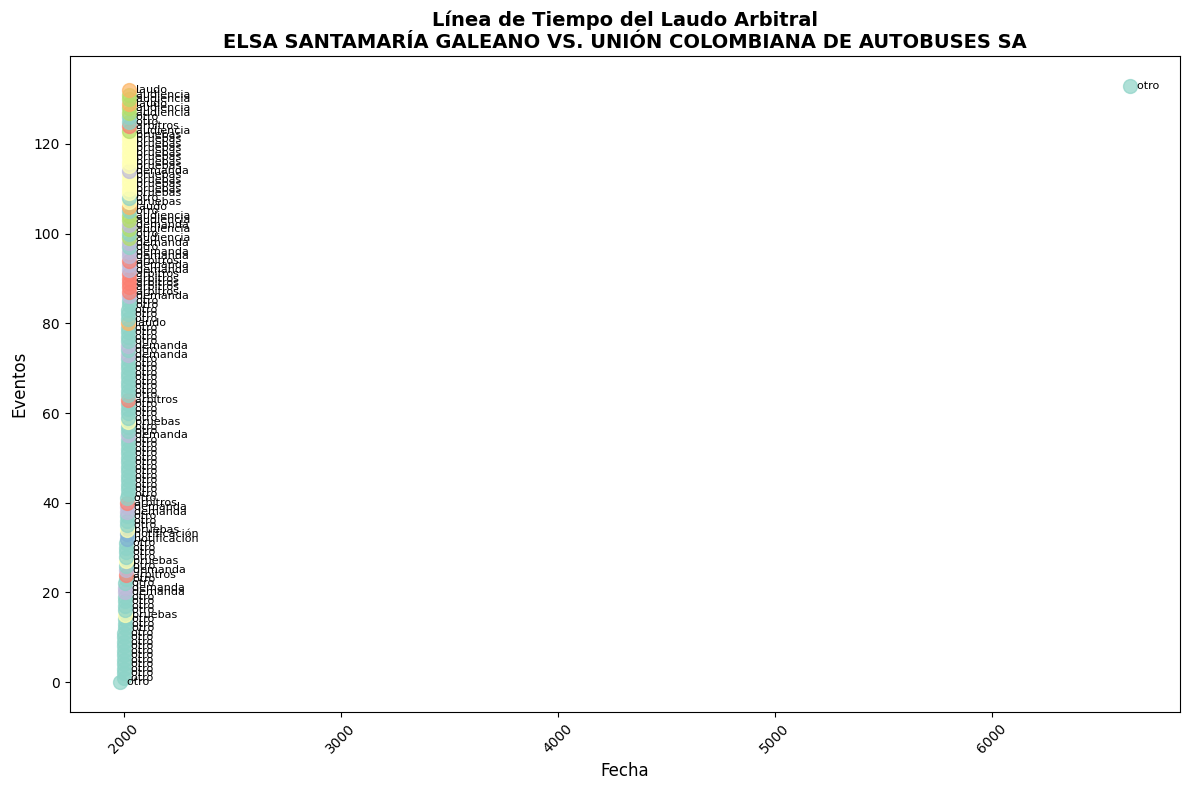

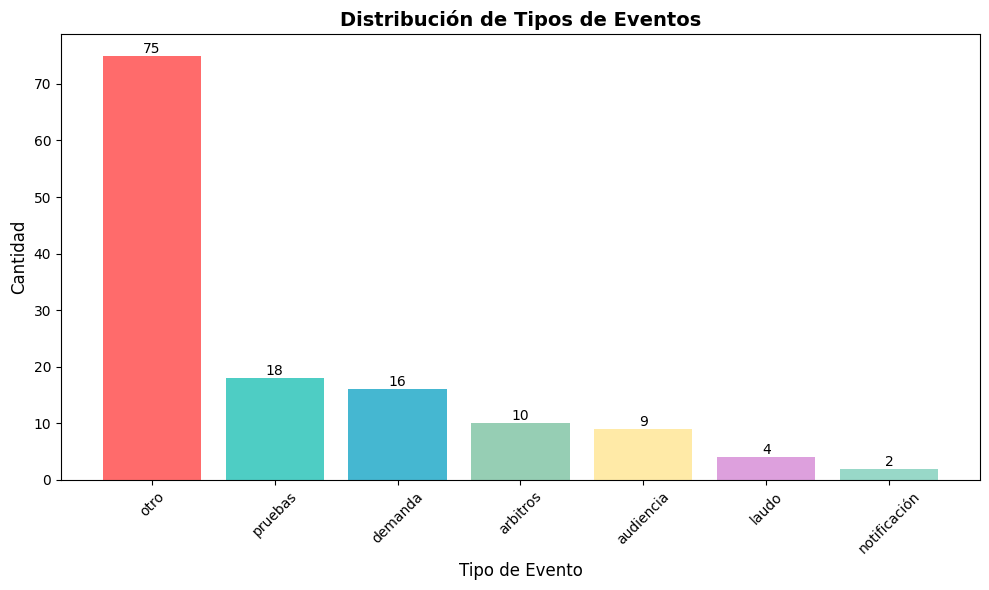

TypeError: Both x_start and x_end must refer to data convertible to datetimes.

In [ ]:
# Análisis de Fechas y Hechos en Laudo Arbitral
# Código para Google Colab

# Instalar librerías necesarias
!pip install PyPDF2 pandas matplotlib seaborn plotly spacy python-dateutil
!python -m spacy download es_core_news_sm

import PyPDF2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
from datetime import datetime
from dateutil import parser
import spacy
import warnings
warnings.filterwarnings('ignore')

# Configurar matplotlib para español
plt.rcParams['font.family'] = 'DejaVu Sans'

class LaudoAnalyzer:
    def __init__(self, archivo_pdf):
        self.archivo_pdf = archivo_pdf
        self.texto_completo = ""
        self.fechas_hechos = []

        # Cargar modelo de spaCy en español
        try:
            self.nlp = spacy.load("es_core_news_sm")
        except:
            print("Error: No se pudo cargar el modelo de spaCy. Instalando...")
            !python -m spacy download es_core_news_sm
            self.nlp = spacy.load("es_core_news_sm")

    def extraer_texto_pdf(self):
        """Extrae texto del archivo PDF"""
        try:
            with open(self.archivo_pdf, 'rb') as file:
                pdf_reader = PyPDF2.PdfReader(file)
                self.texto_completo = ""

                for page in pdf_reader.pages:
                    self.texto_completo += page.extract_text() + "\n"

                print(f"✅ Texto extraído exitosamente. Longitud: {len(self.texto_completo)} caracteres")
                return True

        except Exception as e:
            print(f"❌ Error al leer PDF: {e}")
            return False

    def encontrar_fechas(self):
        """Encuentra fechas en diferentes formatos"""
        patrones_fecha = [
            # dd/mm/yyyy, dd-mm-yyyy, dd.mm.yyyy
            r'\b(\d{1,2})[\/\-\.](\d{1,2})[\/\-\.](\d{4})\b',
            # dd de mes de yyyy
            r'\b(\d{1,2})\s+de\s+(\w+)\s+de\s+(\d{4})\b',
            # mes dd, yyyy
            r'\b(\w+)\s+(\d{1,2}),?\s+(\d{4})\b',
            # yyyy-mm-dd
            r'\b(\d{4})[\/\-\.](\d{1,2})[\/\-\.](\d{1,2})\b',
        ]

        fechas_encontradas = []

        for patron in patrones_fecha:
            matches = re.finditer(patron, self.texto_completo, re.IGNORECASE)
            for match in matches:
                fecha_str = match.group()
                posicion = match.start()

                # Obtener contexto (100 caracteres antes y después)
                inicio = max(0, posicion - 100)
                fin = min(len(self.texto_completo), posicion + 100)
                contexto = self.texto_completo[inicio:fin].strip()

                fechas_encontradas.append({
                    'fecha_str': fecha_str,
                    'contexto': contexto,
                    'posicion': posicion
                })

        return fechas_encontradas

    def procesar_fechas_hechos(self):
        """Procesa y clasifica fechas con sus hechos asociados"""
        fechas_raw = self.encontrar_fechas()

        # Palabras clave para clasificar eventos
        palabras_clave = {
            'demanda': ['demanda', 'demandante', 'solicita', 'petición'],
            'contestación': ['contestación', 'contestar', 'respondió', 'demandado'],
            'audiencia': ['audiencia', 'sesión', 'reunión', 'comparecer'],
            'pruebas': ['prueba', 'evidencia', 'documento', 'testimonio'],
            'laudo': ['laudo', 'decisión', 'fallo', 'resuelve'],
            'arbitros': ['árbitro', 'tribunal', 'designación', 'nombramiento'],
            'notificación': ['notifica', 'comunicación', 'informa'],
            'alegatos': ['alegato', 'argumentación', 'defensa']
        }

        for fecha_info in fechas_raw:
            try:
                # Intentar parsear la fecha
                fecha_parseada = None
                fecha_str = fecha_info['fecha_str']

                # Convertir nombres de meses en español
                meses_esp = {
                    'enero': 'january', 'febrero': 'february', 'marzo': 'march',
                    'abril': 'april', 'mayo': 'may', 'junio': 'june',
                    'julio': 'july', 'agosto': 'august', 'septiembre': 'september',
                    'octubre': 'october', 'noviembre': 'november', 'diciembre': 'december'
                }

                fecha_eng = fecha_str.lower()
                for esp, eng in meses_esp.items():
                    fecha_eng = fecha_eng.replace(esp, eng)

                try:
                    fecha_parseada = parser.parse(fecha_eng, fuzzy=True)
                except:
                    continue

                # Clasificar el tipo de evento
                contexto_lower = fecha_info['contexto'].lower()
                tipo_evento = 'otro'

                for categoria, palabras in palabras_clave.items():
                    if any(palabra in contexto_lower for palabra in palabras):
                        tipo_evento = categoria
                        break

                self.fechas_hechos.append({
                    'fecha': fecha_parseada,
                    'fecha_str': fecha_str,
                    'tipo': tipo_evento,
                    'contexto': fecha_info['contexto'][:200] + "..." if len(fecha_info['contexto']) > 200 else fecha_info['contexto'],
                    'posicion': fecha_info['posicion']
                })

            except Exception as e:
                continue

        # Ordenar por fecha
        self.fechas_hechos.sort(key=lambda x: x['fecha'])

        # Crear DataFrame
        df = pd.DataFrame(self.fechas_hechos)
        return df

    def crear_graficas(self, df):
        """Genera múltiples visualizaciones"""
        if df.empty:
            print("❌ No se encontraron fechas válidas para graficar")
            return

        # 1. Línea de tiempo simple
        fig, ax = plt.subplots(figsize=(12, 8))

        # Asignar colores por tipo
        colores = plt.cm.Set3(range(len(df['tipo'].unique())))
        color_map = dict(zip(df['tipo'].unique(), colores))

        for i, row in df.iterrows():
            color = color_map[row['tipo']]
            ax.scatter(row['fecha'], i, c=[color], s=100, alpha=0.7)
            ax.text(row['fecha'], i, f"  {row['tipo']}",
                   fontsize=8, ha='left', va='center')

        ax.set_xlabel('Fecha', fontsize=12)
        ax.set_ylabel('Eventos', fontsize=12)
        ax.set_title('Línea de Tiempo del Laudo Arbitral\nELSA SANTAMARÍA GALEANO VS. UNIÓN COLOMBIANA DE AUTOBUSES SA',
                    fontsize=14, fontweight='bold')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # 2. Gráfica de barras por tipo de evento
        plt.figure(figsize=(10, 6))
        tipo_counts = df['tipo'].value_counts()

        bars = plt.bar(tipo_counts.index, tipo_counts.values,
                      color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F'])

        plt.title('Distribución de Tipos de Eventos', fontsize=14, fontweight='bold')
        plt.xlabel('Tipo de Evento', fontsize=12)
        plt.ylabel('Cantidad', fontsize=12)
        plt.xticks(rotation=45)

        # Añadir valores en las barras
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

        # 3. Gráfica interactiva con Plotly
        fig = px.timeline(df,
                         x_start="fecha",
                         x_end="fecha",
                         y="tipo",
                         color="tipo",
                         title="Cronología Interactiva del Proceso Arbitral",
                         hover_data=["contexto"])

        fig.update_layout(
            title_x=0.5,
            height=500,
            font=dict(size=12)
        )

        fig.show()

        # 4. Mostrar tabla resumen
        print("\n📊 RESUMEN DE EVENTOS ENCONTRADOS:")
        print("=" * 80)

        for i, row in df.iterrows():
            print(f"📅 {row['fecha'].strftime('%d/%m/%Y')} - {row['tipo'].upper()}")
            print(f"   Contexto: {row['contexto'][:100]}...")
            print("-" * 80)

    def generar_reporte_completo(self):
        """Genera el análisis completo"""
        print("🔍 INICIANDO ANÁLISIS DEL LAUDO ARBITRAL")
        print("=" * 50)

        # 1. Extraer texto
        if not self.extraer_texto_pdf():
            return

        # 2. Procesar fechas
        print("🔍 Buscando fechas y eventos...")
        df = self.procesar_fechas_hechos()

        if df.empty:
            print("❌ No se encontraron fechas válidas en el documento")
            return

        print(f"✅ Se encontraron {len(df)} eventos con fechas")

        # 3. Generar gráficas
        print("📊 Generando visualizaciones...")
        self.crear_graficas(df)

        # 4. Estadísticas generales
        print("\n📈 ESTADÍSTICAS GENERALES:")
        print(f"• Total de eventos: {len(df)}")
        print(f"• Fecha más antigua: {df['fecha'].min().strftime('%d/%m/%Y')}")
        print(f"• Fecha más reciente: {df['fecha'].max().strftime('%d/%m/%Y')}")
        print(f"• Duración del proceso: {(df['fecha'].max() - df['fecha'].min()).days} días")

        return df

# INSTRUCCIONES DE USO:
print("📋 INSTRUCCIONES DE USO:")
print("1. Sube tu archivo PDF a Colab")
print("2. Cambia la ruta del archivo en la siguiente línea:")
print("3. Ejecuta el análisis")
print("\n" + "="*50)

# EJECUTAR ANÁLISIS
# Cambia esta ruta por la ubicación de tu archivo
archivo_pdf = "/content/136068 ELSA SANTAMARÍA GALEANO VS. UNION COLOMBIANA DE AUTOBUSES SA.pdf"

# Crear instancia del analizador
analizador = LaudoAnalyzer(archivo_pdf)

# Ejecutar análisis completo
df_resultados = analizador.generar_reporte_completo()

# Opcional: Guardar resultados en CSV
if df_resultados is not None and not df_resultados.empty:
    df_resultados.to_csv("fechas_hechos_laudo.csv", index=False)
    print("💾 Resultados guardados en 'fechas_hechos_laudo.csv'")

/usr/local/lib/python3.11/dist-packages/cupyx/scipy/sparse/_base.py:10: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  import scipy.sparse as _sparse
  Using cached https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-3.8.0/es_core_news_sm-3.8.0-py3-none-any.whl (12.9 MB)
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
📋 INSTRUCCIONES DE USO:
1. Sube tu archivo PDF a Colab
2. Cambia la ruta del archivo en la siguiente línea:
3. Ejecuta el análisis

🔍 INICIANDO ANÁLISIS DEL LAUDO ARBITRAL
✅ Texto extraído exitosamente. Longitud: 154782 caracteres
🔍 Buscando fechas y eventos...
🔍 Fechas potenciales encontradas: 130


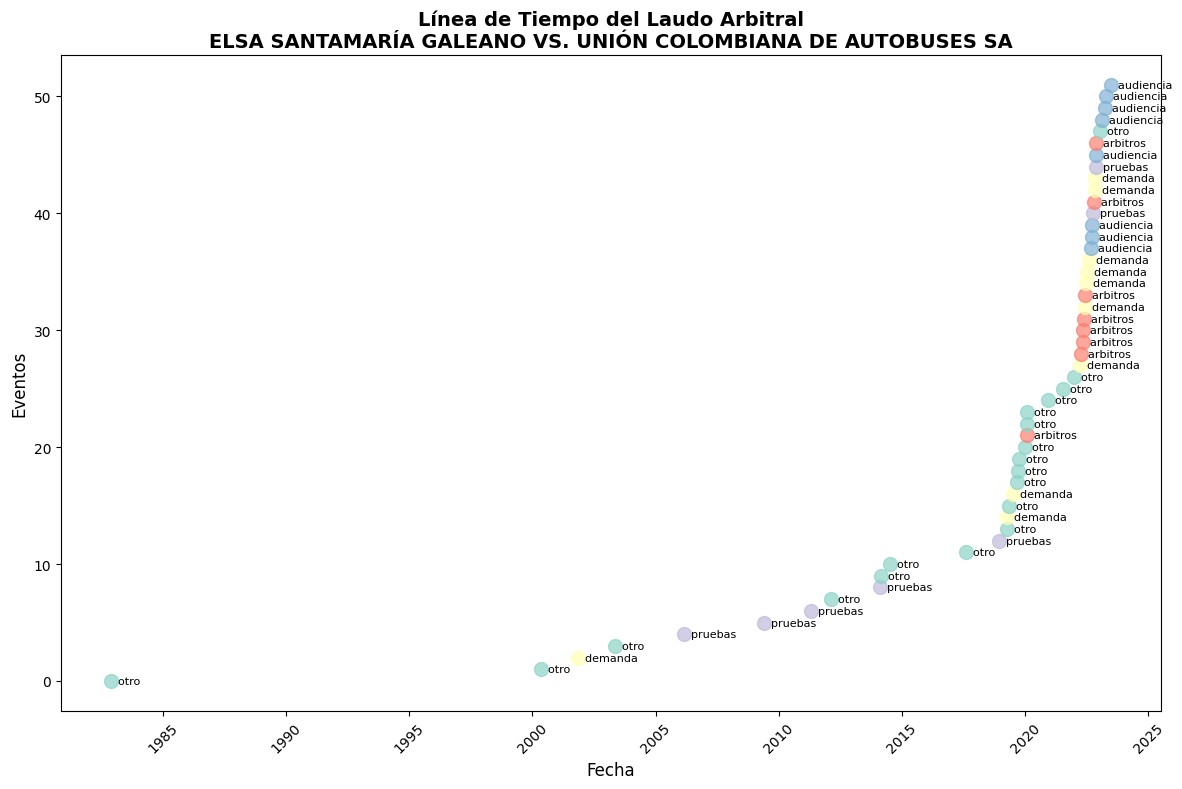

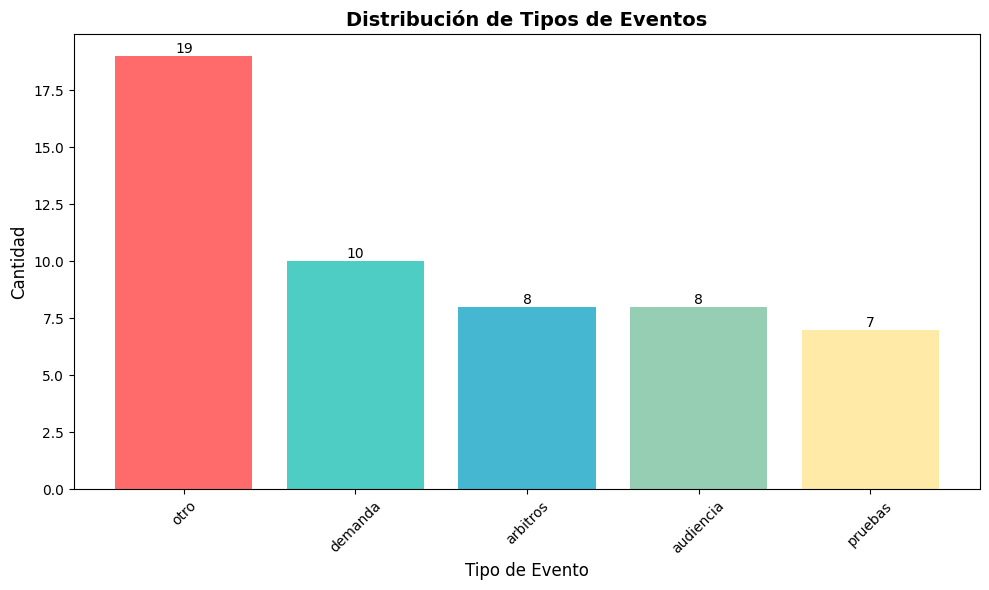


📊 RESUMEN DE EVENTOS ENCONTRADOS:
📅 22/11/1982 - OTRO
   Contexto: ción de resultado, la diligencia medida por la lex artis funciona como la 
denominada diligencia pro...
--------------------------------------------------------------------------------
📅 10/05/2000 - OTRO
   Contexto: o hizo dentro del trámite al asumir su 
competencia que carecía de esta para  conocer y juzgar las c...
--------------------------------------------------------------------------------
📅 31/10/2001 - DEMANDA
   Contexto: s  
 
La demanda tiene como fundamento el pacto arbitral incluido en el Contrato para la 
Vinculació...
--------------------------------------------------------------------------------
📅 13/05/2003 - OTRO
   Contexto: . Esto, 
en la medida que dicho vínculo contractual finalizó al momento en que el vehículo en 
cuest...
--------------------------------------------------------------------------------
📅 03/03/2006 - PRUEBAS
   Contexto: ión de Vehículos Automotores No. 67035, suscrito el 31

In [ ]:
# Análisis de Fechas y Hechos en Laudo Arbitral
# Código para Google Colab

# Instalar librerías necesarias
!pip install PyPDF2 pandas matplotlib seaborn plotly spacy python-dateutil
!python -m spacy download es_core_news_sm

import PyPDF2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
from datetime import datetime
from dateutil import parser
import spacy
import warnings
warnings.filterwarnings('ignore')

# Configurar matplotlib para español
plt.rcParams['font.family'] = 'DejaVu Sans'

class LaudoAnalyzer:
    def __init__(self, archivo_pdf):
        self.archivo_pdf = archivo_pdf
        self.texto_completo = ""
        self.fechas_hechos = []

        # Cargar modelo de spaCy en español
        try:
            self.nlp = spacy.load("es_core_news_sm")
        except:
            print("Error: No se pudo cargar el modelo de spaCy. Instalando...")
            !python -m spacy download es_core_news_sm
            self.nlp = spacy.load("es_core_news_sm")

    def extraer_texto_pdf(self):
        """Extrae texto del archivo PDF"""
        try:
            with open(self.archivo_pdf, 'rb') as file:
                pdf_reader = PyPDF2.PdfReader(file)
                self.texto_completo = ""

                for page in pdf_reader.pages:
                    self.texto_completo += page.extract_text() + "\n"

                print(f"✅ Texto extraído exitosamente. Longitud: {len(self.texto_completo)} caracteres")
                return True

        except Exception as e:
            print(f"❌ Error al leer PDF: {e}")
            return False

    def encontrar_fechas(self):
        """Encuentra fechas en diferentes formatos"""
        patrones_fecha = [
            # dd/mm/yyyy, dd-mm-yyyy, dd.mm.yyyy (años 19xx o 20xx)
            r'\b(\d{1,2})[\/\-\.](\d{1,2})[\/\-\.](19|20)(\d{2})\b',
            # dd de mes de yyyy (años 19xx o 20xx)
            r'\b(\d{1,2})\s+de\s+(\w+)\s+de\s+(19|20)(\d{2})\b',
            # mes dd, yyyy (años 19xx o 20xx)
            r'\b(\w+)\s+(\d{1,2}),?\s+(19|20)(\d{2})\b',
            # yyyy-mm-dd (años 19xx o 20xx)
            r'\b(19|20)(\d{2})[\/\-\.](\d{1,2})[\/\-\.](\d{1,2})\b',
        ]

        fechas_encontradas = []

        for patron in patrones_fecha:
            matches = re.finditer(patron, self.texto_completo, re.IGNORECASE)
            for match in matches:
                fecha_str = match.group()
                posicion = match.start()

                # Filtrar números que parecen fechas pero no lo son (como códigos o números de proceso)
                # Evitar fechas que aparezcan en contextos que no son cronológicos
                contexto_previo = self.texto_completo[max(0, posicion-50):posicion].lower()
                contexto_posterior = self.texto_completo[posicion:min(len(self.texto_completo), posicion+50)].lower()

                # Palabras que indican que NO es una fecha real
                indicadores_no_fecha = ['artículo', 'número', 'código', 'página', 'folio', 'expediente', 'radicado']

                if any(indicador in contexto_previo or indicador in contexto_posterior for indicador in indicadores_no_fecha):
                    continue

                # Obtener contexto (150 caracteres antes y después)
                inicio = max(0, posicion - 150)
                fin = min(len(self.texto_completo), posicion + 150)
                contexto = self.texto_completo[inicio:fin].strip()

                fechas_encontradas.append({
                    'fecha_str': fecha_str,
                    'contexto': contexto,
                    'posicion': posicion
                })

        print(f"🔍 Fechas potenciales encontradas: {len(fechas_encontradas)}")
        return fechas_encontradas

    def procesar_fechas_hechos(self):
        """Procesa y clasifica fechas con sus hechos asociados"""
        fechas_raw = self.encontrar_fechas()

        # Palabras clave para clasificar eventos
        palabras_clave = {
            'demanda': ['demanda', 'demandante', 'solicita', 'petición'],
            'contestación': ['contestación', 'contestar', 'respondió', 'demandado'],
            'audiencia': ['audiencia', 'sesión', 'reunión', 'comparecer'],
            'pruebas': ['prueba', 'evidencia', 'documento', 'testimonio'],
            'laudo': ['laudo', 'decisión', 'fallo', 'resuelve'],
            'arbitros': ['árbitro', 'tribunal', 'designación', 'nombramiento'],
            'notificación': ['notifica', 'comunicación', 'informa'],
            'alegatos': ['alegato', 'argumentación', 'defensa']
        }

        # Rango de fechas válidas (años razonables para documentos legales)
        fecha_min = datetime(1900, 1, 1)
        fecha_max = datetime(2050, 12, 31)

        for fecha_info in fechas_raw:
            try:
                # Intentar parsear la fecha
                fecha_parseada = None
                fecha_str = fecha_info['fecha_str']

                # Convertir nombres de meses en español
                meses_esp = {
                    'enero': 'january', 'febrero': 'february', 'marzo': 'march',
                    'abril': 'april', 'mayo': 'may', 'junio': 'june',
                    'julio': 'july', 'agosto': 'august', 'septiembre': 'september',
                    'octubre': 'october', 'noviembre': 'november', 'diciembre': 'december'
                }

                fecha_eng = fecha_str.lower()
                for esp, eng in meses_esp.items():
                    fecha_eng = fecha_eng.replace(esp, eng)

                try:
                    fecha_parseada = parser.parse(fecha_eng, fuzzy=True)

                    # Validar que la fecha esté en un rango razonable
                    if fecha_parseada < fecha_min or fecha_parseada > fecha_max:
                        print(f"⚠️  Fecha fuera de rango ignorada: {fecha_parseada}")
                        continue

                except Exception as e:
                    print(f"⚠️  Error parseando fecha '{fecha_str}': {e}")
                    continue

                # Clasificar el tipo de evento
                contexto_lower = fecha_info['contexto'].lower()
                tipo_evento = 'otro'

                for categoria, palabras in palabras_clave.items():
                    if any(palabra in contexto_lower for palabra in palabras):
                        tipo_evento = categoria
                        break

                self.fechas_hechos.append({
                    'fecha': fecha_parseada,
                    'fecha_str': fecha_str,
                    'tipo': tipo_evento,
                    'contexto': fecha_info['contexto'][:200] + "..." if len(fecha_info['contexto']) > 200 else fecha_info['contexto'],
                    'posicion': fecha_info['posicion']
                })

            except Exception as e:
                print(f"⚠️  Error procesando fecha: {e}")
                continue

        # Filtrar fechas duplicadas muy cercanas
        fechas_unicas = []
        for item in self.fechas_hechos:
            es_duplicada = False
            for existente in fechas_unicas:
                # Si la diferencia es menor a 1 día, considerar duplicada
                if abs((item['fecha'] - existente['fecha']).days) < 1:
                    es_duplicada = True
                    break
            if not es_duplicada:
                fechas_unicas.append(item)

        self.fechas_hechos = fechas_unicas

        # Ordenar por fecha
        self.fechas_hechos.sort(key=lambda x: x['fecha'])

        # Crear DataFrame
        df = pd.DataFrame(self.fechas_hechos)

        if not df.empty:
            print(f"✅ Fechas válidas procesadas: {len(df)}")
            print(f"   Rango: {df['fecha'].min().strftime('%d/%m/%Y')} - {df['fecha'].max().strftime('%d/%m/%Y')}")

        return df

    def crear_graficas(self, df):
        """Genera múltiples visualizaciones"""
        if df.empty:
            print("❌ No se encontraron fechas válidas para graficar")
            return

        # 1. Línea de tiempo simple
        fig, ax = plt.subplots(figsize=(12, 8))

        # Asignar colores por tipo
        colores = plt.cm.Set3(range(len(df['tipo'].unique())))
        color_map = dict(zip(df['tipo'].unique(), colores))

        for i, row in df.iterrows():
            color = color_map[row['tipo']]
            ax.scatter(row['fecha'], i, c=[color], s=100, alpha=0.7)
            ax.text(row['fecha'], i, f"  {row['tipo']}",
                   fontsize=8, ha='left', va='center')

        ax.set_xlabel('Fecha', fontsize=12)
        ax.set_ylabel('Eventos', fontsize=12)
        ax.set_title('Línea de Tiempo del Laudo Arbitral\nELSA SANTAMARÍA GALEANO VS. UNIÓN COLOMBIANA DE AUTOBUSES SA',
                    fontsize=14, fontweight='bold')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # 2. Gráfica de barras por tipo de evento
        plt.figure(figsize=(10, 6))
        tipo_counts = df['tipo'].value_counts()

        bars = plt.bar(tipo_counts.index, tipo_counts.values,
                      color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F'])

        plt.title('Distribución de Tipos de Eventos', fontsize=14, fontweight='bold')
        plt.xlabel('Tipo de Evento', fontsize=12)
        plt.ylabel('Cantidad', fontsize=12)
        plt.xticks(rotation=45)

        # Añadir valores en las barras
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

        # 3. Gráfica interactiva con Plotly (scatter plot más seguro)
        try:
            # Crear scatter plot en lugar de timeline para evitar errores de fecha
            fig = px.scatter(df,
                           x="fecha",
                           y="tipo",
                           color="tipo",
                           title="Cronología Interactiva del Proceso Arbitral",
                           hover_data=["fecha_str", "contexto"],
                           size_max=15)

            fig.update_traces(marker=dict(size=12))
            fig.update_layout(
                title_x=0.5,
                height=500,
                font=dict(size=12),
                xaxis_title="Fecha",
                yaxis_title="Tipo de Evento"
            )

            fig.show()

        except Exception as e:
            print(f"⚠️  Error creando gráfica interactiva: {e}")
            print("Continuando con el resto del análisis...")

            # Gráfica alternativa simple
            plt.figure(figsize=(12, 6))
            for i, tipo in enumerate(df['tipo'].unique()):
                datos_tipo = df[df['tipo'] == tipo]
                plt.scatter(datos_tipo['fecha'], [i]*len(datos_tipo),
                          label=tipo, s=100, alpha=0.7)

            plt.xlabel('Fecha')
            plt.ylabel('Tipo de Evento')
            plt.title('Cronología del Proceso Arbitral (Alternativa)')
            plt.legend()
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

        # 4. Mostrar tabla resumen
        print("\n📊 RESUMEN DE EVENTOS ENCONTRADOS:")
        print("=" * 80)

        for i, row in df.iterrows():
            print(f"📅 {row['fecha'].strftime('%d/%m/%Y')} - {row['tipo'].upper()}")
            print(f"   Contexto: {row['contexto'][:100]}...")
            print("-" * 80)

    def generar_reporte_completo(self):
        """Genera el análisis completo"""
        print("🔍 INICIANDO ANÁLISIS DEL LAUDO ARBITRAL")
        print("=" * 50)

        # 1. Extraer texto
        if not self.extraer_texto_pdf():
            return

        # 2. Procesar fechas
        print("🔍 Buscando fechas y eventos...")
        df = self.procesar_fechas_hechos()

        if df.empty:
            print("❌ No se encontraron fechas válidas en el documento")
            return

        print(f"✅ Se encontraron {len(df)} eventos con fechas")

        # 3. Generar gráficas
        print("📊 Generando visualizaciones...")
        self.crear_graficas(df)

        # 4. Estadísticas generales
        print("\n📈 ESTADÍSTICAS GENERALES:")
        print(f"• Total de eventos: {len(df)}")
        print(f"• Fecha más antigua: {df['fecha'].min().strftime('%d/%m/%Y')}")
        print(f"• Fecha más reciente: {df['fecha'].max().strftime('%d/%m/%Y')}")
        print(f"• Duración del proceso: {(df['fecha'].max() - df['fecha'].min()).days} días")

        return df

# INSTRUCCIONES DE USO:
print("📋 INSTRUCCIONES DE USO:")
print("1. Sube tu archivo PDF a Colab")
print("2. Cambia la ruta del archivo en la siguiente línea:")
print("3. Ejecuta el análisis")
print("\n" + "="*50)

# EJECUTAR ANÁLISIS
# Cambia esta ruta por la ubicación de tu archivo
archivo_pdf = "/content/136068 ELSA SANTAMARÍA GALEANO VS. UNION COLOMBIANA DE AUTOBUSES SA.pdf"

# Crear instancia del analizador
analizador = LaudoAnalyzer(archivo_pdf)

# Ejecutar análisis completo
df_resultados = analizador.generar_reporte_completo()

# Opcional: Guardar resultados en CSV
if df_resultados is not None and not df_resultados.empty:
    df_resultados.to_csv("fechas_hechos_laudo.csv", index=False)
    print("💾 Resultados guardados en 'fechas_hechos_laudo.csv'")

análisis de argumentos

🎯 INICIANDO ANÁLISIS DEL CASO ELSA SANTAMARÍA GALEANO
📋 Paso 1: Verificación del archivo...
Verificando archivo: /content/136068 ELSA SANTAMARÍA GALEANO VS. UNION COLOMBIANA DE AUTOBUSES SA-13-58.pdf
Archivo encontrado. Tamaño: 543.85 KB

✅ Archivo encontrado y leído correctamente
📄 Tamaño del documento: 543.85 KB

📋 Paso 2: Análisis jurídico completo...
📁 Archivos PDF encontrados: ['136068 ELSA SANTAMARÍA GALEANO VS. UNION COLOMBIANA DE AUTOBUSES SA.pdf', '136068 ELSA SANTAMARÍA GALEANO VS. UNION COLOMBIANA DE AUTOBUSES SA-13-58.pdf']
🎯 Analizando: 136068 ELSA SANTAMARÍA GALEANO VS. UNION COLOMBIANA DE AUTOBUSES SA.pdf
🚀 INICIANDO ANÁLISIS JURÍDICO
📖 Leyendo documento...
📄 Procesando 58 páginas del PDF...
✅ Documento leído: 147,671 caracteres

🔍 Extrayendo citas jurídicas...
✅ 70 citas encontradas

📝 Extrayendo argumentos...
✅ 48 argumentos encontrados

🔬 Realizando clustering de argumentos...
✅ Clustering completado: 8 clusters generados

📊 Generando visualizaciones...


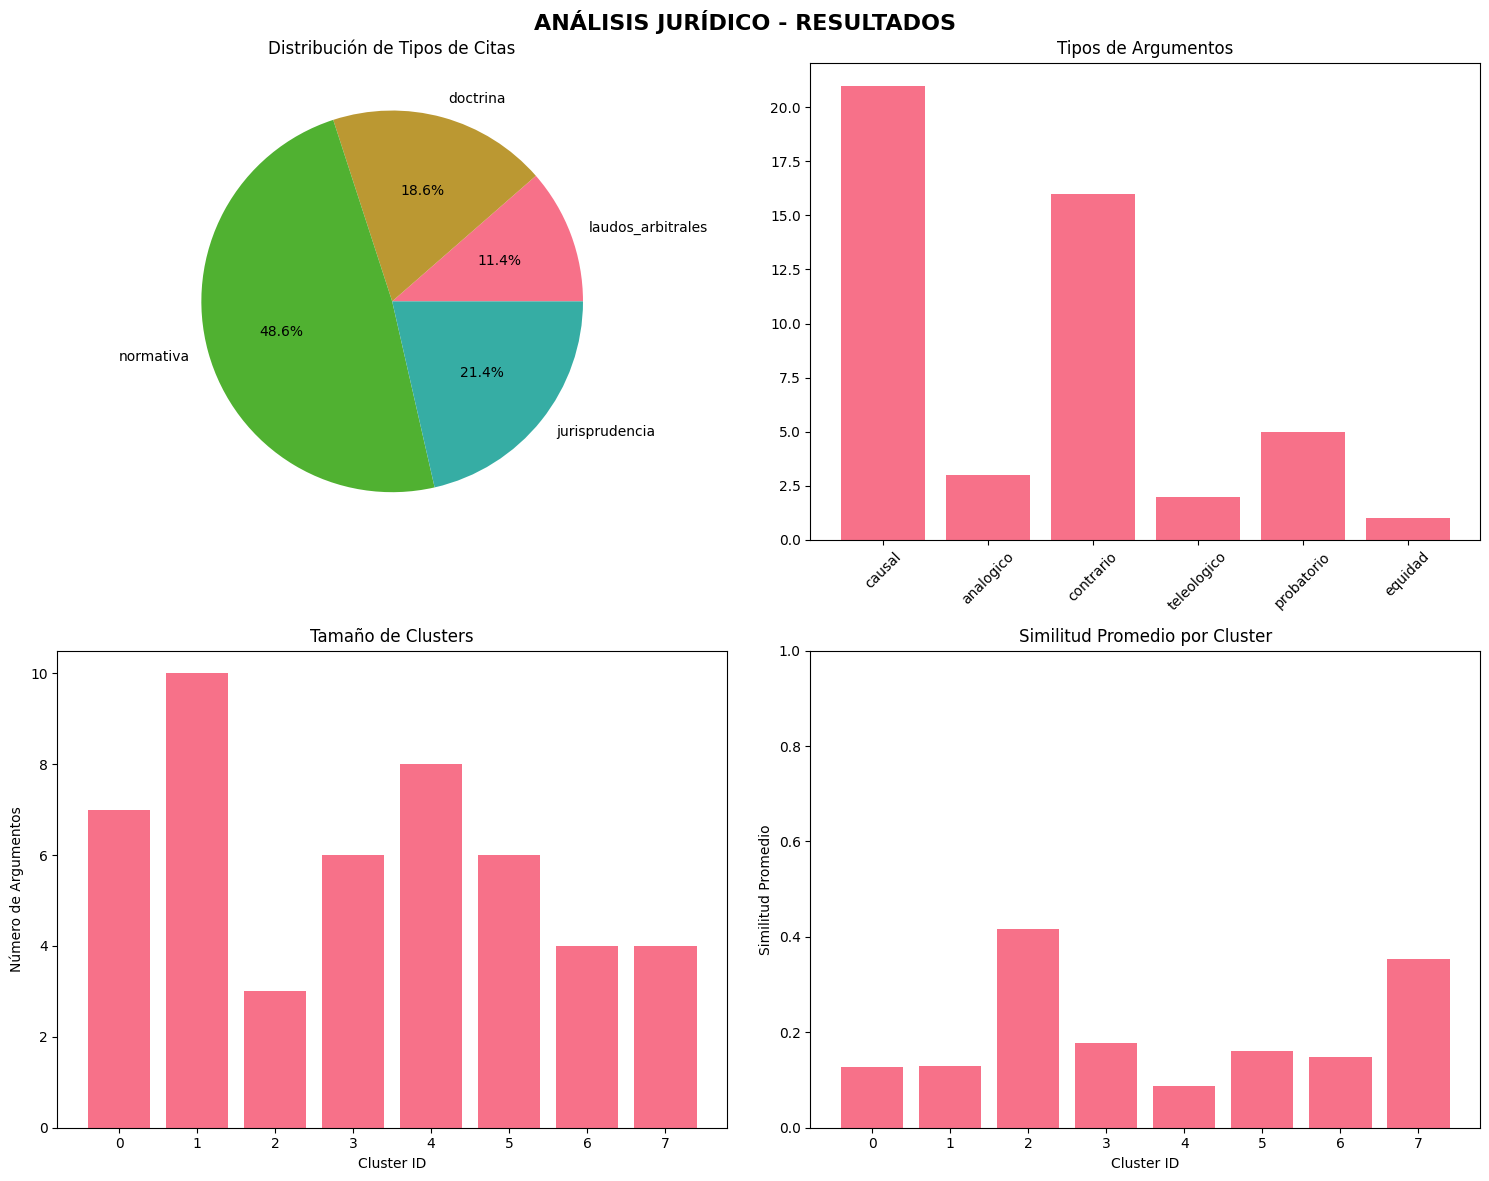


☁️ Generando nube de palabras...


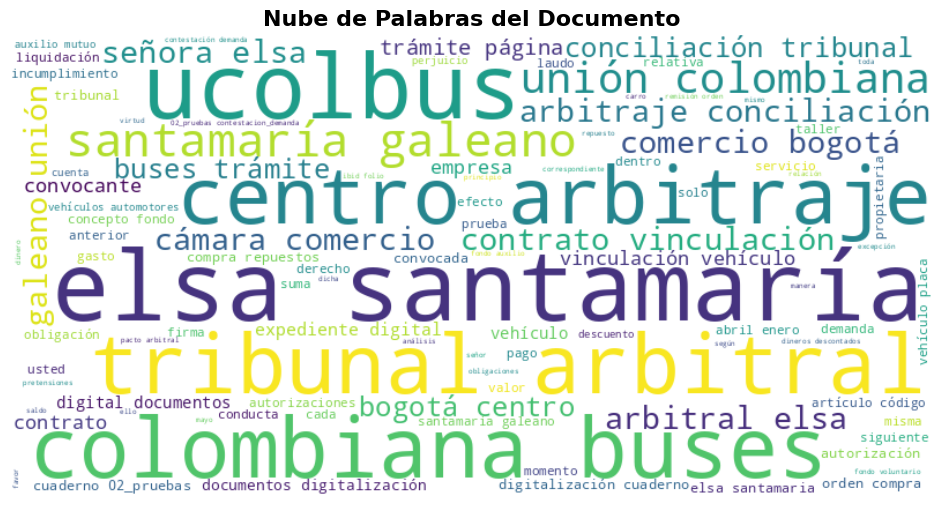

📋 REPORTE COMPLETO DE ANÁLISIS JURÍDICO

📊 ESTADÍSTICAS GENERALES:
   • Longitud del documento: 147,671 caracteres
   • Total de citas encontradas: 70
   • Total de argumentos identificados: 48
   • Clusters generados: 8

📚 ANÁLISIS DE CITAS:
   • Normativa: 34
   • Jurisprudencia: 15
   • Doctrina: 13
   • Laudos Arbitrales: 8

   🔍 Ejemplos de citas más relevantes:
     [laudos_arbitrales] CÁMARA DE COMERCIO
     [doctrina] doctor Antonio
     [normativa] Circular 7
     [jurisprudencia] Auto 3

💭 ANÁLISIS DE ARGUMENTOS:
   • Causal: 21
   • Contrario: 16
   • Probatorio: 5
   • Analogico: 3
   • Teleologico: 2
   • Equidad: 1

   📝 Ejemplos de argumentos por tipo:
     [causal] Una vez revisado su contenido, el Tribunal Arbitral pr ocedió a admitir la misma mediante Auto 3 del 14 de junio de 2022 y, en consecuencia, a ordenar...
     [analogico] Por lo anterior, toda vez que la duración del proceso se extenderá hasta el 26 de junio de 2023 resulta claro que la decisión que pone fin 

In [ ]:

print("🎯 INICIANDO ANÁLISIS DEL CASO ELSA SANTAMARÍA GALEANO")
print("=" * 60)

# Primero, verificar que el archivo existe y hacer estadísticas básicas
print("📋 Paso 1: Verificación del archivo...")
# Define la ruta del archivo PDF (debe coincidir con la celda donde se define PDF_PATH)
# Asegúrate de que la variable PDF_PATH esté definida en una celda anterior.
try:
    # Check if PDF_PATH is defined, if not, use a default or raise an error
    if 'PDF_PATH' not in globals():
         print("Error: La variable PDF_PATH no está definida. Por favor, define la ruta del archivo PDF en una celda anterior.")
    else:
        stats = estadisticas_basicas(PDF_PATH)

        if stats and stats['existe']:
            print("\n✅ Archivo encontrado y leído correctamente")
            if 'tamaño_kb' in stats:
                print(f"📄 Tamaño del documento: {stats['tamaño_kb']:.2f} KB")

            # Ejecutar análisis completo
            print("\n📋 Paso 2: Análisis jurídico completo...")
            # Assuming 'analizar_caso_elsa_santamaria()' is defined elsewhere and returns results
            # If 'analizar_caso_elsa_santamaria()' is not defined, this will cause a NameError
            # and further steps related to its 'resultado' will fail.
            try:
                if 'analizar_caso_elsa_santamaria' in globals() and callable(analizar_caso_elsa_santamaria):
                    resultado = analizar_caso_elsa_santamaria()

                    if resultado:
                        print("\n🎉 ¡ANÁLISIS COMPLETADO!")

                        # Mostrar insights específicos del caso
                        print("\n📌 INSIGHTS ESPECÍFICOS DEL CASO:")

                        # Buscar menciones específicas
                        # Assuming 'resultado' contains a 'texto' key with the document text
                        if 'texto' in resultado:
                            texto_lower = resultado['texto'].lower()

                            insights = {
                                'Menciona accidente de trabajo': any(x in texto_lower for x in ['accidente', 'lesión', 'herida']),
                                'Cita Código Civil': 'código civil' in texto_lower,
                                'Referencia a responsabilidad patronal': any(x in texto_lower for x in ['responsabilidad patronal', 'culpa patronal']),
                                'Menciona jurisprudencia': any(x in texto_lower for x in ['jurisprudencia', 'precedente']),
                                'Tiene fundamentación doctrinaria': any(x in texto_lower for x in ['doctor', 'tratadista', 'doctrina']),
                                'Es laudo arbitral': any(x in texto_lower for x in ['laudo', 'arbitral', 'tribunal de arbitramento'])
                            }

                            for insight, presente in insights.items():
                                icono = "✅" if presente else "❌"
                                print(f"   {icono} {insight}")
                        else:
                            print("⚠️ No se encontró la clave 'texto' en los resultados del análisis para extraer insights.")

                        # Análisis de la estructura argumentativa
                        print(f"\n🔍 ESTRUCTURA ARGUMENTATIVA:")
                        # Assuming 'resultado' contains an 'argumentos' key
                        if 'argumentos' in resultado and resultado['argumentos']:
                            tipos_encontrados = set([arg['tipo'] for arg in resultado['argumentos']])
                            print(f"   • Tipos de argumentos presentes: {len(tipos_encontrados)}")
                            for tipo in tipos_encontrados:
                                cantidad = len([arg for arg in resultado['argumentos'] if arg['tipo'] == tipo])
                                print(f"     - {tipo.replace('_', ' ').title()}: {cantidad} instancias")
                        else:
                            print("⚠️ No se encontraron argumentos para analizar la estructura argumentativa.")


                        # Top 3 clusters más importantes
                        print(f"\n📊 CLUSTERS MÁS RELEVANTES:")
                         # Assuming 'resultado' contains a 'clusters' key
                        if 'clusters' in resultado and resultado['clusters']:
                            clusters_ordenados = sorted(
                                resultado['clusters'].items(),
                                # Sort primarily by size, secondarily by average similarity
                                key=lambda item: (item[1].get('size', 0), item[1].get('similitud_promedio', 0)),
                                reverse=True
                            )[:3]

                            for i, (cluster_id, info) in enumerate(clusters_ordenados, 1):
                                print(f"   {i}. Cluster {cluster_id}:")
                                print(f"      • {info.get('size', 0)} argumentos")
                                print(f"      • Similitud: {info.get('similitud_promedio', 0):.3f}")
                                if info.get('argumentos'):
                                    # Safely access the first argument text
                                    first_arg_text = info['argumentos'][0].get('texto', '')
                                    ejemplo = first_arg_text[:100] + "..." if len(first_arg_text) > 100 else first_arg_text
                                    print(f"      • Ejemplo: {ejemplo}")
                                else:
                                     print(f"      • Ejemplo: No hay argumentos en este cluster.")
                        else:
                             print("⚠️ No se encontraron clusters para mostrar.")


                        print(f"\n📝 RECOMENDACIONES PARA ANÁLISIS POSTERIOR:")
                        print(f"   • Revisar clusters con alta similitud para identificar patrones argumentativos")
                        print(f"   • Analizar la evolución histórica de la jurisprudencia laboral desde 1958")
                        print(f"   • Comparar con casos actuales de responsabilidad patronal")
                        print(f"   • Estudiar la fundamentación doctrinaria utilizada")

                    else:
                        print("❌ Error en el análisis completo: La función analizar_caso_elsa_santamaria no devolvió resultados válidos.")
                else:
                    print("❌ Error: La función 'analizar_caso_elsa_santamaria' no está definida o no es invocable.")


            except NameError:
                print("❌ Error: La función 'analizar_caso_elsa_santamaria' no está definida.")
            except Exception as e:
                print(f"❌ Error inesperado durante el análisis completo: {e}")

        else:
            print("❌ No se pudo acceder al archivo")
            print("💡 Asegúrate de:")
            print("   1. Haber subido el archivo PDF a Colab")
            print(f"   2. Que la ruta sea exacta: {PDF_PATH}")
            print("   3. Que el archivo no esté corrupto")

except NameError:
     print("❌ Error: La variable PDF_PATH no está definida. Por favor, define la ruta del archivo PDF en una celda anterior.")
except Exception as e:
    print(f"❌ Error inesperado al verificar el archivo: {e}")


print("\n" + "=" * 60)
print("✨ Análisis finalizado. ¡Revisa los resultados arriba!")

In [ ]:
import pandas as pd

# Verifica si la variable 'resultado' existe y contiene 'argumentos'
if 'resultado' in globals() and resultado and 'argumentos' in resultado and resultado['argumentos']:
    # Crear un DataFrame con los argumentos y sus tipos
    argumentos_data = [{'Texto del Argumento': arg['texto'], 'Clasificación (Tipo)': arg['tipo']} for arg in resultado['argumentos']]
    df_argumentos = pd.DataFrame(argumentos_data)

    # Mostrar la tabla
    print("📊 Tabla de Argumentos Identificados y su Clasificación")
    print("=" * 70)
    display(df_argumentos)

    # Opcional: Guardar la tabla en un archivo CSV
    # df_argumentos.to_csv('argumentos_clasificados.csv', index=False)
    # print("\nTabla guardada en 'argumentos_clasificados.csv'")

elif 'resultado' not in globals():
    print("❌ Error: La variable 'resultado' no ha sido definida. Por favor, ejecuta la celda de análisis legal completo primero.")
elif not resultado or 'argumentos' not in resultado or not resultado['argumentos']:
     print("❌ No se encontraron argumentos en los resultados del análisis.")

📊 Tabla de Argumentos Identificados y su Clasificación


Texto del Argumento Clasificación (Tipo)
0   Una vez revisado su contenido, el Tribunal Arb...               causal
1   Por lo tanto, dado que dicho pacto no comprend...               causal
2   Por lo anterior, toda vez que la duración del ...            analogico
3   En esta etapa, al igual que ocurrió en los dif...            analogico
4   Así las cosas,  (a) ntes de entrar en el proce...               causal
5   Por lo tanto, dado que dicho pacto no comprend...               causal
6   Por lo tanto, se abstendrá de pronunciarse en ...               causal
7   Sin embargo, también llama la atención este Tr...            contrario
8   ELSA SANTAMARÍA es de crítica importancia porq...               causal
9   SANTAMARÍA:   00:12:52  Contiene mi firma, per...            contrario
10  Por lo demás, no existe en el expediente prueb...               causal
11  Sin embargo, no existe evidencia de que esta p...            contrario
12  Por esta razón, la empresa UCOLBUS incluyó ent...               causal
13  A pesar de que, en su testimonio, la señora EL...            contrario
14  No obstante, solo 17 de las 60 órdenes tienen ...            contrario
15  ZAPATA: Por teléfono, vía telefónica, pero no ...            contrario
16  Tal como se d educe de todas las pruebas, auto...            analogico
17  Sin embargo, ante el cúmulo de contradicciones...            contrario
18  En pronunciamiento reciente de la Corte Suprem...          teleologico
19  En consecuencia, no es suficiente decir frente...               causal
20  El propósito de esta doctrina es evitar que me...          teleologico
21  No obstante, en ningún momento puede tolerarse...            contrario
22  No obstante, también es imperativo reconocer, ...            contrario
23  En este caso, corresponderá la inversión de la...            contrario
24  L a parte se considerará en mejor posición par...           probatorio
25  La jurisprudencia de la Corte Suprema de Justi...               causal
26  La jurisprudencia de la Corte Suprema de Justi...            contrario
27  Sin embargo, según la naturaleza del contrato ...            contrario
28  Sin embargo, debido a la falta de diligencia o...            contrario
29         Por lo tanto, tenía la 49 Planiol y Ripert               causal
30       Sin embargo, el deudor no garantiza el éxito            contrario
31  Por lo tanto, se puede valorar negativamente s...               causal
32  Sin embargo, la administración de recursos aje...            contrario
33  En este proceso se ha demostrado que ELSA SANT...               causal
34  El Tribunal ha establecido que ELSA SANTAMARIA...               causal
35  Al respecto, se observa que, en los alegatos d...            contrario
36  En el expediente se encuentra probado que el v...           probatorio
37  UNIÓN COLOMBIANA DE BUSES S.A. (Trámite 136.06...               causal
38  Así, para los efectos de este laudo, se entend...               causal
39  El Tribunal prescindirá del análisis de las ex...               causal
40  UNIÓN COLOMBIANA DE BUSES S.A. (Trámite 136.06...               causal
41  UNIÓN COLOMBIANA DE BUSES S.A. (Trámite 136.06...           probatorio
42  En el mismo sentido, también se encuentra prob...           probatorio
43  Así, el Tribunal no halló prueba que permitier...               causal
44  A efectos de decidir la excepción en cuestión ...           probatorio
45  En consecuencia, el Tribunal despachará favora...               causal
46  Efectuado el análisis de lo ocurrido en el pre...              equidad
47  Por lo tanto, el Tribunal no deducirá indicio ...               causal

In [ ]:
from collections import Counter

# Representar los argumentos agrupados por su similitud (clusters)
print("📦 ARGUMENTOS AGRUPADOS POR SIMILITUD (Clusters)")
print("=" * 60)

if 'resultado' in globals() and resultado and 'clusters' in resultado and resultado['clusters']:
    clusters = resultado['clusters']

    if not clusters:
        print("❌ No se encontraron clusters de argumentos.")
    else:
        # Ordenar clusters por tamaño (cantidad de argumentos)
        clusters_ordenados = sorted(
            clusters.items(),
            key=lambda item: item[1].get('size', 0),
            reverse=True
        )

        for cluster_id, info in clusters_ordenados:
            print(f"\n--- Cluster {cluster_id} ---")
            print(f"  • Tamaño: {info.get('size', 0)} argumentos")
            print(f"  • Similitud promedio: {info.get('similitud_promedio', 0):.3f}")

            # Mostrar tipos de argumentos dominantes si están disponibles
            if info.get('tipos_dominantes'):
                 print(f"  • Tipos dominantes: {', '.join([f'{tipo.title()} ({count})' for tipo, count in info['tipos_dominantes'].most_common(3)])}") # Mostrar top 3 tipos

            # Mostrar algunos argumentos de ejemplo
            if info.get('argumentos'):
                print("  • Argumentos de ejemplo:")
                # Limitar a mostrar los primeros 3 argumentos por cluster
                for i, arg_info in enumerate(info['argumentos'][:3]):
                    texto_arg = arg_info.get('texto', 'N/A')
                    tipo_arg = arg_info.get('tipo', 'N/A')
                    # Limitar la longitud del texto del ejemplo
                    ejemplo_texto = texto_arg[:150] + "..." if len(texto_arg) > 150 else texto_arg
                    print(f"    - [Tipo: {tipo_arg.title()}] {ejemplo_texto}")
                if len(info['argumentos']) > 3:
                    print("    ...")
            else:
                print("  • No hay argumentos de ejemplo disponibles para este cluster.")

else:
    print("❌ No se encontraron datos de clusters en los resultados del análisis. Asegúrate de ejecutar el análisis completo primero.")

print("\n✅ Representación de clusters completada.")

📦 ARGUMENTOS AGRUPADOS POR SIMILITUD (Clusters)

--- Cluster 1 ---
  • Tamaño: 10 argumentos
  • Similitud promedio: 0.129
  • Tipos dominantes: Contrario (6), Probatorio (2), Causal (2)
  • Argumentos de ejemplo:
    - [Tipo: Contrario] SANTAMARÍA:   00:12:52  Contiene mi firma, pero no he recibido ningún dinero.  (Resaltados ajenos al original).8 8 Cfr
    - [Tipo: Contrario] A pesar de que, en su testimonio, la señora ELSA SANTAMARÍA afirmó no haber autorizado reparaciones en los años 2019 y 2020, como se verá más adelante...
    - [Tipo: Contrario] No obstante, solo 17 de las 60 órdenes tienen la firma de autorización de la señora ELSA SANTAMARÍA
    ...

--- Cluster 4 ---
  • Tamaño: 8 argumentos
  • Similitud promedio: 0.088
  • Tipos dominantes: Causal (3), Contrario (2), Analogico (1)
  • Argumentos de ejemplo:
    - [Tipo: Causal] Por esta razón, la empresa UCOLBUS incluyó entre los descuentos ejecutables sobre el pago de los ingresos de los vehículos vinculados, aquellos rela

📈 Generando gráfico de cercanía de argumentos (Clusters)...


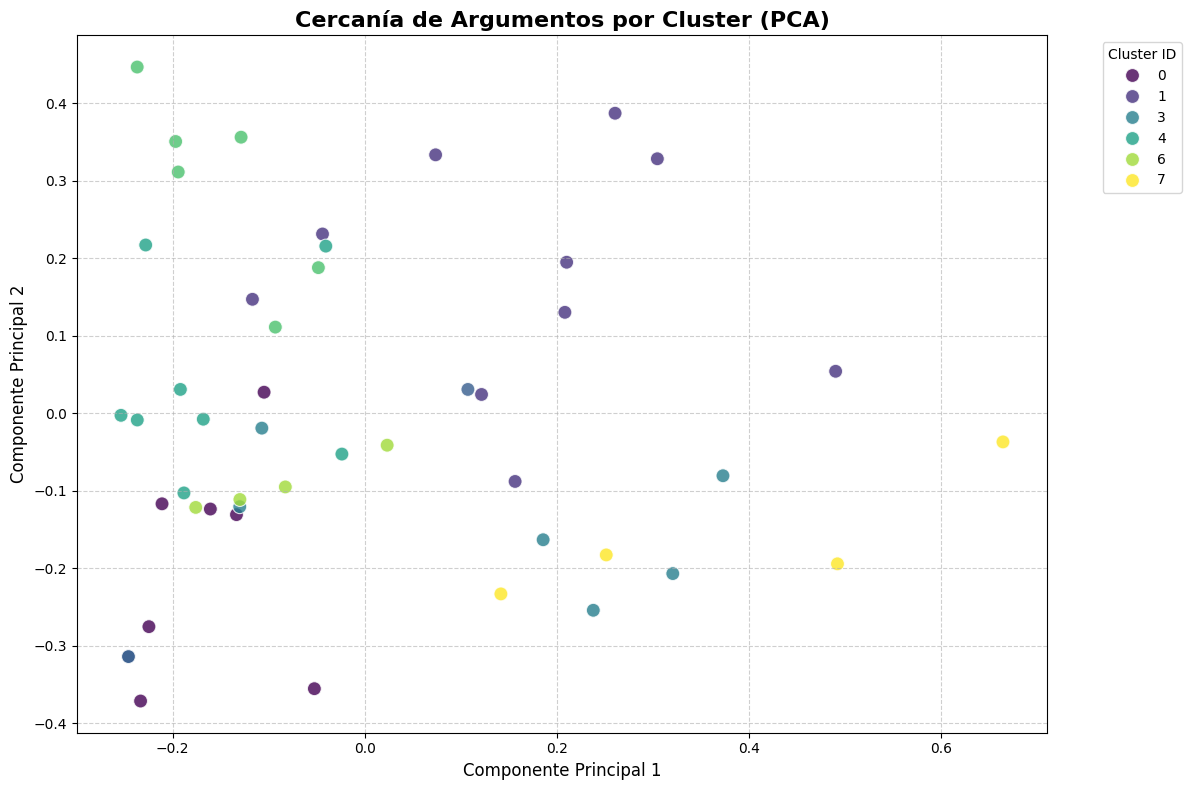


✅ Gráfico de cercanía de argumentos generado.

✨ Finalizado.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns

# Representación gráfica de la cercanía de argumentos
print("📈 Generando gráfico de cercanía de argumentos (Clusters)...")
print("=" * 60)

if 'resultado' in globals() and resultado and 'argumentos' in resultado and resultado['clusters']:
    argumentos_list = resultado['argumentos']
    clusters_dict = resultado['clusters']
    vectorizer = resultado['vectorizer'] # Get the fitted vectorizer

    if not argumentos_list or not clusters_dict or not vectorizer:
        print("❌ No se encontraron datos de argumentos, clusters o vectorizador para graficar.")
    else:
        # Crear un DataFrame para facilitar el manejo
        df_plot = pd.DataFrame(argumentos_list)

        # Agregar la columna de Cluster ID al DataFrame
        # Need to find which cluster each argument belongs to
        argument_to_cluster = {}
        for cluster_id, info in clusters_dict.items():
            for arg in info['argumentos']:
                # Assuming 'texto' is a unique identifier or we can match based on text
                # This might be simplified if cluster info directly contained argument indices
                argument_to_cluster[arg['texto']] = cluster_id

        df_plot['cluster'] = df_plot['texto'].apply(lambda x: argument_to_cluster.get(x, 'unknown'))

        # Obtener los textos de los argumentos para la vectorización
        argument_texts = df_plot['texto'].tolist()

        try:
            # Transformar los textos usando el vectorizador ajustado
            # Ensure texts are strings
            argument_vectors = vectorizer.transform([str(text) for text in argument_texts])

            # Aplicar PCA para reducir a 2 dimensiones
            pca = PCA(n_components=2)
            components = pca.fit_transform(argument_vectors.toarray()) # PCA works on dense arrays

            # Agregar componentes PCA al DataFrame
            df_plot['pca_x'] = components[:, 0]
            df_plot['pca_y'] = components[:, 1]

            # Crear el gráfico de dispersión
            plt.figure(figsize=(12, 8))
            sns.scatterplot(data=df_plot, x='pca_x', y='pca_y', hue='cluster', palette='viridis', s=100, alpha=0.8)

            plt.title('Cercanía de Argumentos por Cluster (PCA)', fontsize=16, fontweight='bold')
            plt.xlabel('Componente Principal 1', fontsize=12)
            plt.ylabel('Componente Principal 2', fontsize=12)
            plt.grid(True, linestyle='--', alpha=0.6)
            plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()

            print("\n✅ Gráfico de cercanía de argumentos generado.")

        except Exception as e:
            print(f"❌ Error durante la generación del gráfico: {e}")
            print("Asegúrate de que el vectorizador ('resultado[\'vectorizer\']') esté correctamente ajustado.")
            print("Puede que necesites re-ejecutar las celdas de preprocesamiento y clustering si cambiaste algo.")


else:
    print("❌ No se encontraron datos de argumentos, clusters o vectorizador en los resultados del análisis.")
    print("Asegúrate de haber ejecutado la celda de análisis legal completo.")

print("\n✨ Finalizado.")

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Generar tabla con argumentos, cluster y métrica de cercanía
print("📊 Tabla de Argumentos, Cluster y Métrica de Cercanía")
print("=" * 70)

if 'resultado' in globals() and resultado and 'argumentos' in resultado and resultado['clusters'] and 'vectorizer' in resultado:
    argumentos_list = resultado['argumentos']
    clusters_dict = resultado['clusters']
    vectorizer = resultado['vectorizer']

    if not argumentos_list or not clusters_dict or not vectorizer:
        print("❌ No se encontraron datos de argumentos, clusters o vectorizador para generar la tabla.")
    else:
        # Crear un diccionario para mapear texto de argumento a su información
        arg_info_dict = {arg['texto']: arg for arg in argumentos_list}

        # Preparar datos para el DataFrame
        table_data = []

        # Calcular centroides de cluster y similitud de cada argumento al centroide
        cluster_centroids = {}
        argument_vectors = vectorizer.transform([str(arg['texto']) for arg in argumentos_list])
        argument_to_vector_index = {arg['texto']: i for i, arg in enumerate(argumentos_list)}


        for cluster_id, info in clusters_dict.items():
            cluster_argument_texts = [arg['texto'] for arg in info['argumentos']]
            if cluster_argument_texts:
                # Obtener los índices de los argumentos en este cluster
                cluster_indices = [argument_to_vector_index[text] for text in cluster_argument_texts]
                # Obtener los vectores TF-IDF para los argumentos de este cluster
                cluster_vectors = argument_vectors[cluster_indices]
                # Calcular el centroide promediando los vectores
                centroid = cluster_vectors.mean(axis=0)
                cluster_centroids[cluster_id] = centroid

        # Llenar la tabla de datos
        for cluster_id, info in clusters_dict.items():
            centroid = cluster_centroids.get(cluster_id)
            if centroid is not None:
                 # Ensure centroid is 2D array for cosine_similarity
                 centroid = centroid.reshape(1, -1)

            for arg in info['argumentos']:
                arg_text = arg['texto']
                arg_type = arg.get('tipo', 'N/A')

                similarity_to_centroid = None
                if centroid is not None:
                    try:
                         # Get the vector for the current argument
                         arg_vector_index = argument_to_vector_index[arg_text]
                         arg_vector = argument_vectors[arg_vector_index]
                         # Calculate similarity
                         similarity_to_centroid = cosine_similarity(arg_vector, centroid)[0][0]
                    except Exception as e:
                         print(f"⚠️ Error calculando similitud para argumento en cluster {cluster_id}: {e}")
                         similarity_to_centroid = np.nan


                table_data.append({
                    'Texto del Argumento': arg_text,
                    'Clasificación (Tipo)': arg_type,
                    'Cluster ID': cluster_id,
                    'Similitud al Centroide del Cluster': similarity_to_centroid if similarity_to_centroid is not None else np.nan
                })

        # Crear DataFrame
        df_cluster_args = pd.DataFrame(table_data)

        # Ordenar por Cluster ID y luego por similitud
        df_cluster_args = df_cluster_args.sort_values(by=['Cluster ID', 'Similitud al Centroide del Cluster'], ascending=[True, False])

        # Mostrar la tabla
        display(df_cluster_args)

        # Opcional: Guardar la tabla en un archivo CSV
        # df_cluster_args.to_csv('argumentos_clusters_cercania.csv', index=False)
        # print("\nTabla guardada en 'argumentos_clusters_cercania.csv'")

elif 'resultado' not in globals():
    print("❌ Error: La variable 'resultado' no ha sido definida. Por favor, ejecuta la celda de análisis legal completo primero.")
elif not resultado or 'argumentos' not in resultado or not resultado['clusters'] or 'vectorizer' not in resultado:
     print("❌ No se encontraron datos completos de argumentos, clusters o vectorizador en los resultados del análisis.")

print("\n✅ Tabla de argumentos por cluster generada.")

📊 Tabla de Argumentos, Cluster y Métrica de Cercanía
⚠️ Error calculando similitud para argumento en cluster 0: np.matrix is not supported. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
⚠️ Error calculando similitud para argumento en cluster 0: np.matrix is not supported. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
⚠️ Error calculando similitud para argumento en cluster 0: np.matrix is not supported. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
⚠️ Error calculando similitud para argumento en cluster 0: np.matrix is not supported. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
⚠️ Error calculando similitud p

Texto del Argumento Clasificación (Tipo)  \
0   Una vez revisado su contenido, el Tribunal Arb...               causal   
1   Por lo tanto, dado que dicho pacto no comprend...               causal   
2   Por lo anterior, toda vez que la duración del ...            analogico   
3   En esta etapa, al igual que ocurrió en los dif...            analogico   
4   Por lo tanto, dado que dicho pacto no comprend...               causal   
5          Por lo tanto, tenía la 49 Planiol y Ripert               causal   
6   El Tribunal prescindirá del análisis de las ex...               causal   
7   SANTAMARÍA:   00:12:52  Contiene mi firma, per...            contrario   
8   A pesar de que, en su testimonio, la señora EL...            contrario   
9   No obstante, solo 17 de las 60 órdenes tienen ...            contrario   
10  No obstante, en ningún momento puede tolerarse...            contrario   
11  No obstante, también es imperativo reconocer, ...            contrario   
12  L a parte se considerará en mejor posición par...           probatorio   
13  En este proceso se ha demostrado que ELSA SANT...               causal   
14  Al respecto, se observa que, en los alegatos d...            contrario   
15  En el mismo sentido, también se encuentra prob...           probatorio   
16  Así, el Tribunal no halló prueba que permitier...               causal   
17  La jurisprudencia de la Corte Suprema de Justi...               causal   
18  La jurisprudencia de la Corte Suprema de Justi...            contrario   
19  El Tribunal ha establecido que ELSA SANTAMARIA...               causal   
20  En pronunciamiento reciente de la Corte Suprem...          teleologico   
21  En este caso, corresponderá la inversión de la...            contrario   
22  En el expediente se encuentra probado que el v...           probatorio   
23  UNIÓN COLOMBIANA DE BUSES S.A. (Trámite 136.06...               causal   
24  UNIÓN COLOMBIANA DE BUSES S.A. (Trámite 136.06...               causal   
25  UNIÓN COLOMBIANA DE BUSES S.A. (Trámite 136.06...           probatorio   
26  Por esta razón, la empresa UCOLBUS incluyó ent...               causal   
27  ZAPATA: Por teléfono, vía telefónica, pero no ...            contrario   
28  Tal como se d educe de todas las pruebas, auto...            analogico   
29  Sin embargo, ante el cúmulo de contradicciones...            contrario   
30  El propósito de esta doctrina es evitar que me...          teleologico   
31  Por lo tanto, se puede valorar negativamente s...               causal   
32  Efectuado el análisis de lo ocurrido en el pre...              equidad   
33  Por lo tanto, el Tribunal no deducirá indicio ...               causal   
34  Sin embargo, también llama la atención este Tr...            contrario   
35  Sin embargo, no existe evidencia de que esta p...            contrario   
36  Sin embargo, según la naturaleza del contrato ...            contrario   
37  Sin embargo, debido a la falta de diligencia o...            contrario   
38       Sin embargo, el deudor no garantiza el éxito            contrario   
39  Sin embargo, la administración de recursos aje...            contrario   
40  Así las cosas,  (a) ntes de entrar en el proce...               causal   
41  ELSA SANTAMARÍA es de crítica importancia porq...               causal   
42  En consecuencia, no es suficiente decir frente...               causal   
43  En consecuencia, el Tribunal despachará favora...               causal   
44  Por lo tanto, se abstendrá de pronunciarse en ...               causal   
45  Por lo demás, no existe en el expediente prueb...               causal   
46  Así, para los efectos de este laudo, se entend...               causal   
47  A efectos de decidir la excepción en cuestión ...           probatorio   

    Cluster ID  Similitud al Centroide del Cluster  
0            0                                 NaN  
1            0                                 NaN  
2            0                                 NaN  


✅ Tabla de argumentos por cluster generada.


In [ ]:
import os

def estadisticas_basicas(pdf_path):
    """
    Verifica si el archivo PDF existe y devuelve estadísticas básicas.
    """
    print(f"Verificando archivo: {pdf_path}")
    if os.path.exists(pdf_path):
        try:
            # Para obtener la longitud del texto, necesitaríamos extraerlo,
            # pero para una estadística básica de archivo, el tamaño es suficiente.
            file_size = os.path.getsize(pdf_path)
            print(f"Archivo encontrado. Tamaño: {file_size / 1024:.2f} KB")
            return {'existe': True, 'tamaño_bytes': file_size, 'tamaño_kb': file_size / 1024}
        except Exception as e:
            print(f"Error al obtener estadísticas del archivo: {e}")
            return {'existe': True, 'error_stats': str(e)}
    else:
        print(f"Error: El archivo no se encontró en {pdf_path}")
        return {'existe': False}

# Define la ruta del archivo PDF que se usará en la celda 9nWFzQ0I9N8k
# Asegúrate de que esta ruta coincida con la que se usa allí.
PDF_PATH = "/content/136068 ELSA SANTAMARÍA GALEANO VS. UNION COLOMBIANA DE AUTOBUSES SA-13-58.pdf"

# Modificar la celda 9nWFzQ0I9N8k para pasar PDF_PATH a la función
# y para usar el resultado de manera adecuada.
# (Esta parte se hará en el siguiente modify_cells si el usuario acepta)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 88.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ Todas las dependencias instaladas correctamente

🚀 SISTEMA LISTO PARA USAR

Para analizar tu documento, usa:

# Si tienes un archivo PDF:
results = analyze_juridical_coherence('/path/to/your/document.pdf')

# Si tienes el texto extraído:
text = "Tu texto completo del documento aquí..."
results = analyze_juridical_coherence(text, show_visualizations=True)

# Para acceder a métricas específicas:
print(f"Coherencia: {results['coherence_score']:.3f}")
print(f"Términos comunes: {len(results['common_terms'])}")


EJECUTANDO ANÁLISIS CON DOCUMENTO DE EJEMPLO
🔄 Cargando modelo de e

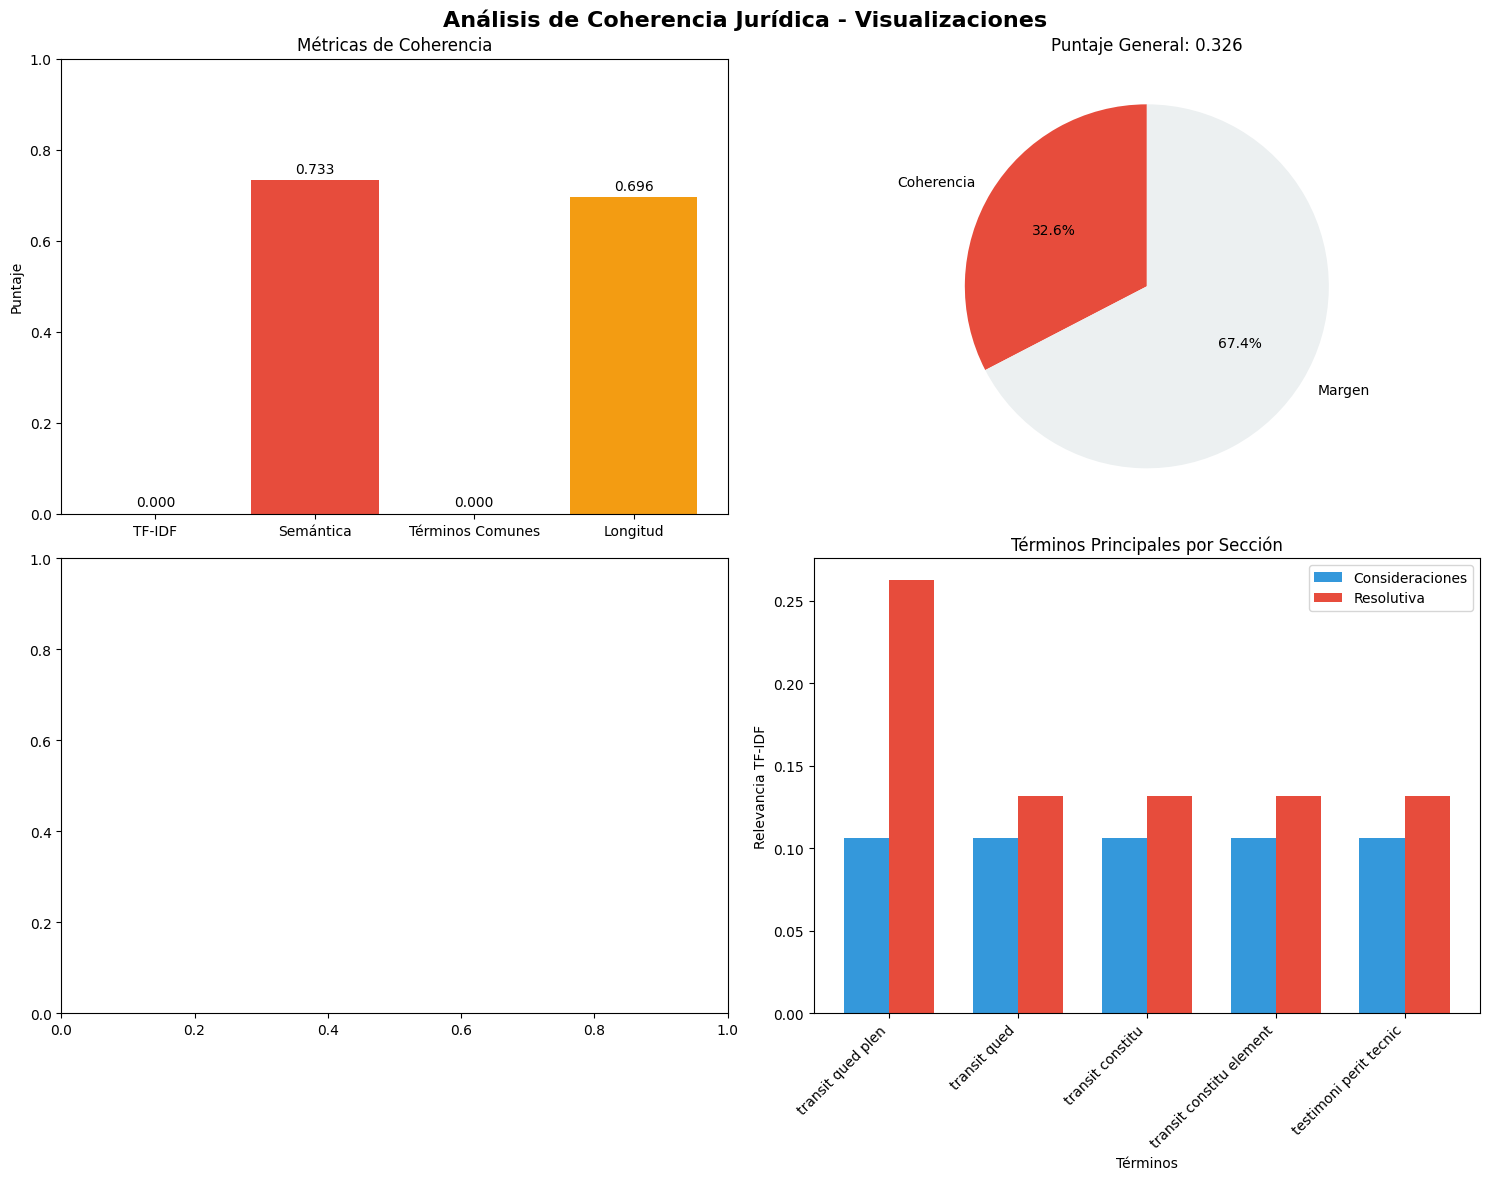

In [ ]:
# ====================================================================
# ANÁLISIS DE COHERENCIA ENTRE SECCIONES JURÍDICAS - GOOGLE COLAB
# ====================================================================

# PASO 1: Instalación de dependencias
!pip install -q spacy transformers sentence-transformers pdfplumber
!python -m spacy download es_core_news_sm
!pip install -q scikit-learn nltk matplotlib seaborn pandas numpy

# PASO 2: Importaciones
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pdfplumber
from sentence_transformers import SentenceTransformer
import warnings
warnings.filterwarnings('ignore')

# Configurar NLTK
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True) # Add this line to download punkt_tab data

print("✅ Todas las dependencias instaladas correctamente")

# ====================================================================
# CLASE PRINCIPAL DE ANÁLISIS
# ====================================================================

class JuridicalCoherenceAnalyzer:
    def __init__(self):
        self.stemmer = SnowballStemmer('spanish')
        self.stop_words = set(stopwords.words('spanish'))

        # Stopwords jurídicos específicos
        self.legal_stopwords = {
            'artículo', 'articulo', 'ley', 'decreto', 'código', 'codigo',
            'según', 'conforme', 'dispuesto', 'establecido', 'normativa',
            'tribunal', 'demandado', 'demandante', 'proceso', 'expediente',
            'considerando', 'vista', 'resultando', 'fallo', 'sentencia'
        }
        self.stop_words.update(self.legal_stopwords)

        # Cargar modelo de embeddings semánticos
        print("🔄 Cargando modelo de embeddings semánticos...")
        self.sentence_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
        print("✅ Modelo cargado")

    def extract_text_from_pdf(self, pdf_path):
        """Extrae texto de un archivo PDF"""
        text = ""
        try:
            with pdfplumber.open(pdf_path) as pdf:
                for page in pdf.pages:
                    page_text = page.extract_text()
                    if page_text:
                        text += page_text + "\n"
            print(f"✅ PDF procesado: {len(text)} caracteres extraídos")
            return text
        except Exception as e:
            print(f"❌ Error al procesar PDF: {e}")
            return ""

    def extract_sections(self, text):
        """Extrae las secciones específicas del documento"""
        # Patrones más robustos para encontrar las secciones
        patterns = {
            'consideraciones': [
                r'II\.\s*CONSIDERACIONES\s+DEL\s+TRIBUNAL(.*?)(?=III\.|IV\.|V\.|VI\.|VII\.|$)',
                r'CONSIDERACIONES\s+DEL\s+TRIBUNAL(.*?)(?=PARTE\s+RESOLUTIVA|RESUELVE|FALLA|$)',
                r'CONSIDERACIONES(.*?)(?=PARTE\s+RESOLUTIVA|RESUELVE|FALLA|$)'
            ],
            'resolutiva': [
                r'VI\.\s*PARTE\s+RESOLUTIVA(.*?)(?=VII\.|VIII\.|IX\.|$)',
                r'PARTE\s+RESOLUTIVA(.*?)$',
                r'RESUELVE(.*?)$',
                r'FALLA(.*?)$'
            ]
        }

        consideraciones_text = ""
        resolutiva_text = ""

        # Buscar consideraciones
        for pattern in patterns['consideraciones']:
            match = re.search(pattern, text, re.DOTALL | re.IGNORECASE)
            if match:
                consideraciones_text = match.group(1).strip()
                break

        # Buscar parte resolutiva
        for pattern in patterns['resolutiva']:
            match = re.search(pattern, text, re.DOTALL | re.IGNORECASE)
            if match:
                resolutiva_text = match.group(1).strip()
                break

        return consideraciones_text, resolutiva_text

    def preprocess_text(self, text):
        """Preprocesa el texto para análisis"""
        # Limpiar texto
        text = re.sub(r'\n+', ' ', text)
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'[^\w\s]', ' ', text)
        text = text.lower()

        # Tokenizar y filtrar
        tokens = word_tokenize(text, language='spanish')
        tokens = [self.stemmer.stem(token) for token in tokens
                 if token not in self.stop_words and len(token) > 2]

        return ' '.join(tokens)

    def calculate_tfidf_similarity(self, text1, text2):
        """Calcula similaridad TF-IDF"""
        vectorizer = TfidfVectorizer(
            max_features=1000,
            ngram_range=(1, 3),
            min_df=1,
            max_df=0.95
        )

        tfidf_matrix = vectorizer.fit_transform([text1, text2])
        similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

        return similarity, vectorizer, tfidf_matrix

    def calculate_semantic_similarity(self, text1, text2):
        """Calcula similaridad semántica usando embeddings"""
        # Dividir en oraciones para análisis más granular
        sentences1 = sent_tokenize(text1, language='spanish')
        sentences2 = sent_tokenize(text2, language='spanish')

        if not sentences1 or not sentences2:
            return 0.0

        # Obtener embeddings
        embeddings1 = self.sentence_model.encode(sentences1)
        embeddings2 = self.sentence_model.encode(sentences2)

        # Calcular similaridad promedio
        similarities = []
        for emb1 in embeddings1:
            max_sim = max([cosine_similarity([emb1], [emb2])[0][0] for emb2 in embeddings2])
            similarities.append(max_sim)

        return np.mean(similarities)

    def extract_key_entities_and_concepts(self, text1, text2, vectorizer, tfidf_matrix):
        """Extrae entidades y conceptos clave"""
        feature_names = vectorizer.get_feature_names_out()

        # Obtener scores TF-IDF
        tfidf1 = tfidf_matrix[0].toarray()[0]
        tfidf2 = tfidf_matrix[1].toarray()[0]

        # Top términos por sección
        top_consideraciones = [(feature_names[i], tfidf1[i])
                              for i in tfidf1.argsort()[-15:][::-1] if tfidf1[i] > 0]
        top_resolutiva = [(feature_names[i], tfidf2[i])
                         for i in tfidf2.argsort()[-15:][::-1] if tfidf2[i] > 0]

        # Términos comunes
        common_terms = []
        for i in range(len(feature_names)):
            if tfidf1[i] > 0 and tfidf2[i] > 0:
                avg_score = (tfidf1[i] + tfidf2[i]) / 2
                common_terms.append((feature_names[i], avg_score))

        common_terms.sort(key=lambda x: x[1], reverse=True)

        return top_consideraciones, top_resolutiva, common_terms

    def calculate_comprehensive_coherence(self, text1, text2):
        """Calcula coherencia comprehensiva usando múltiples métricas"""
        # Preprocesar textos
        text1_clean = self.preprocess_text(text1)
        text2_clean = self.preprocess_text(text2)

        # 1. Similaridad TF-IDF
        tfidf_sim, vectorizer, tfidf_matrix = self.calculate_tfidf_similarity(text1_clean, text2_clean)

        # 2. Similaridad semántica
        semantic_sim = self.calculate_semantic_similarity(text1, text2)

        # 3. Análisis de términos clave
        top_cons, top_res, common_terms = self.extract_key_entities_and_concepts(
            text1_clean, text2_clean, vectorizer, tfidf_matrix
        )

        # 4. Ratio de términos comunes
        terms_cons = set([term for term, _ in top_cons[:10]])
        terms_res = set([term for term, _ in top_res[:10]])
        if terms_cons.union(terms_res):
            common_ratio = len(terms_cons.intersection(terms_res)) / len(terms_cons.union(terms_res))
        else:
            common_ratio = 0

        # 5. Análisis de longitud y estructura
        length_ratio = min(len(text1), len(text2)) / max(len(text1), len(text2))

        # 6. Puntaje compuesto ponderado
        coherence_score = (
            tfidf_sim * 0.35 +
            semantic_sim * 0.35 +
            common_ratio * 0.20 +
            length_ratio * 0.10
        )

        return {
            'coherence_score': coherence_score,
            'tfidf_similarity': tfidf_sim,
            'semantic_similarity': semantic_sim,
            'common_terms_ratio': common_ratio,
            'length_ratio': length_ratio,
            'top_terms_consideraciones': top_cons[:10],
            'top_terms_resolutiva': top_res[:10],
            'common_terms': common_terms[:15],
            'total_features': len(vectorizer.get_feature_names_out())
        }

    def analyze_document(self, pdf_path_or_text):
        """Análisis completo del documento"""
        print("🏛️  ANÁLISIS DE COHERENCIA JURÍDICA")
        print("=" * 50)

        # Obtener texto
        if pdf_path_or_text.endswith('.pdf'):
            document_text = self.extract_text_from_pdf(pdf_path_or_text)
        else:
            document_text = pdf_path_or_text

        if not document_text:
            return {"error": "No se pudo extraer texto del documento"}

        # Extraer secciones
        print("\n📋 Extrayendo secciones...")
        consideraciones, resolutiva = self.extract_sections(document_text)

        if not consideraciones:
            print("⚠️  No se encontró la sección 'Consideraciones del Tribunal'")
            return {"error": "Sección de consideraciones no encontrada"}

        if not resolutiva:
            print("⚠️  No se encontró la sección 'Parte Resolutiva'")
            return {"error": "Sección resolutiva no encontrada"}

        print(f"✅ Consideraciones extraídas: {len(consideraciones)} caracteres")
        print(f"✅ Parte Resolutiva extraída: {len(resolutiva)} caracteres")

        # Realizar análisis
        print("\n🔍 Ejecutando análisis de coherencia...")
        results = self.calculate_comprehensive_coherence(consideraciones, resolutiva)

        # Agregar textos para referencia
        results['consideraciones_preview'] = consideraciones[:300] + "..." if len(consideraciones) > 300 else consideraciones
        results['resolutiva_preview'] = resolutiva[:300] + "..." if len(resolutiva) > 300 else resolutiva

        return results

    def generate_report(self, results):
        """Genera reporte detallado del análisis"""
        if 'error' in results:
            return f"❌ Error: {results['error']}"

        score = results['coherence_score']

        # Determinar nivel de coherencia
        if score >= 0.75:
            level = "🟢 MUY ALTA"
            interpretation = "Excelente correspondencia entre fundamentación y decisión"
            recommendation = "El documento presenta coherencia óptima"
        elif score >= 0.60:
            level = "🟡 ALTA"
            interpretation = "Buena correspondencia con aspectos menores a considerar"
            recommendation = "Revisar algunos puntos específicos para mayor claridad"
        elif score >= 0.45:
            level = "🟠 MEDIA"
            interpretation = "Correspondencia moderada, hay inconsistencias detectables"
            recommendation = "Reforzar la conexión entre argumentos y decisiones"
        elif score >= 0.30:
            level = "🔴 BAJA"
            interpretation = "Correspondencia limitada, inconsistencias significativas"
            recommendation = "Revisar fundamentación y reestructurar argumentación"
        else:
            level = "⚫ MUY BAJA"
            interpretation = "Poca o nula correspondencia entre secciones"
            recommendation = "Reescribir las secciones para mejorar coherencia"

        report = f"""
╔══════════════════════════════════════════════════════════════╗
║                    REPORTE DE COHERENCIA JURÍDICA            ║
╚══════════════════════════════════════════════════════════════╝

🎯 RESULTADO PRINCIPAL:
   Nivel de Coherencia: {level}
   Puntaje General: {score:.4f}

📊 MÉTRICAS DETALLADAS:
   • Similaridad TF-IDF:     {results['tfidf_similarity']:.4f}
   • Similaridad Semántica:  {results['semantic_similarity']:.4f}
   • Términos Comunes:       {results['common_terms_ratio']:.4f}
   • Ratio de Longitud:      {results['length_ratio']:.4f}
   • Total Características:  {results['total_features']}

💡 INTERPRETACIÓN:
   {interpretation}

🔧 RECOMENDACIÓN:
   {recommendation}

🔑 TÉRMINOS CLAVE COMUNES (Top 10):"""

        for i, (term, score_term) in enumerate(results['common_terms'][:10], 1):
            report += f"\n   {i:2d}. {term:<20} (relevancia: {score_term:.3f})"

        report += f"""

📝 VISTA PREVIA DE SECCIONES:

🏛️  CONSIDERACIONES DEL TRIBUNAL:
{results['consideraciones_preview']}

⚖️  PARTE RESOLUTIVA:
{results['resolutiva_preview']}

════════════════════════════════════════════════════════════════
        """

        return report

    def visualize_results(self, results):
        """Crea visualizaciones del análisis"""
        if 'error' in results:
            print(results['error'])
            return

        # Configurar estilo
        plt.style.use('default')
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Análisis de Coherencia Jurídica - Visualizaciones', fontsize=16, fontweight='bold')

        # 1. Gráfico de barras de métricas principales
        metrics = ['TF-IDF', 'Semántica', 'Términos Comunes', 'Longitud']
        values = [
            results['tfidf_similarity'],
            results['semantic_similarity'],
            results['common_terms_ratio'],
            results['length_ratio']
        ]

        bars = axes[0,0].bar(metrics, values, color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
        axes[0,0].set_title('Métricas de Coherencia')
        axes[0,0].set_ylabel('Puntaje')
        axes[0,0].set_ylim(0, 1)

        # Agregar valores en las barras
        for bar, value in zip(bars, values):
            axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                          f'{value:.3f}', ha='center', va='bottom')

        # 2. Gráfico circular del puntaje general
        score = results['coherence_score']
        colors = ['#2ecc71' if score > 0.6 else '#f39c12' if score > 0.4 else '#e74c3c', '#ecf0f1']
        axes[0,1].pie([score, 1-score], labels=['Coherencia', 'Margen'], colors=colors,
                     autopct='%1.1f%%', startangle=90)
        axes[0,1].set_title(f'Puntaje General: {score:.3f}')

        # 3. Top términos comunes
        if results['common_terms']:
            terms = [term for term, _ in results['common_terms'][:8]]
            scores = [score for _, score in results['common_terms'][:8]]

            axes[1,0].barh(terms, scores, color='#9b59b6')
            axes[1,0].set_title('Términos Clave Comunes')
            axes[1,0].set_xlabel('Relevancia')

        # 4. Comparación de términos por sección
        if results['top_terms_consideraciones'] and results['top_terms_resolutiva']:
            # Tomar top 5 de cada sección
            cons_terms = [term for term, _ in results['top_terms_consideraciones'][:5]]
            cons_scores = [score for _, score in results['top_terms_consideraciones'][:5]]

            res_terms = [term for term, _ in results['top_terms_resolutiva'][:5]]
            res_scores = [score for _, score in results['top_terms_resolutiva'][:5]]

            x = np.arange(len(cons_terms))
            width = 0.35

            axes[1,1].bar(x - width/2, cons_scores, width, label='Consideraciones', color='#3498db')
            axes[1,1].bar(x + width/2, res_scores[:len(cons_terms)], width, label='Resolutiva', color='#e74c3c')

            axes[1,1].set_title('Términos Principales por Sección')
            axes[1,1].set_xlabel('Términos')
            axes[1,1].set_ylabel('Relevancia TF-IDF')
            axes[1,1].set_xticks(x)
            axes[1,1].set_xticklabels(cons_terms, rotation=45, ha='right')
            axes[1,1].legend()

        plt.tight_layout()
        plt.show()

# ====================================================================
# FUNCIÓN PRINCIPAL DE ANÁLISIS
# ====================================================================

def analyze_juridical_coherence(pdf_path_or_text, show_visualizations=True):
    """
    Función principal para analizar coherencia jurídica

    Args:
        pdf_path_or_text: Ruta al PDF o texto directo del documento
        show_visualizations: Si mostrar gráficos (True por defecto)

    Returns:
        dict: Resultados completos del análisis
    """
    analyzer = JuridicalCoherenceAnalyzer()

    # Realizar análisis
    results = analyzer.analyze_document(pdf_path_or_text)

    # Generar y mostrar reporte
    report = analyzer.generate_report(results)
    print(report)

    # Mostrar visualizaciones si se solicita
    if show_visualizations and 'error' not in results:
        analyzer.visualize_results(results)

    return results

# ====================================================================
# EJEMPLO DE USO
# ====================================================================

print("""
🚀 SISTEMA LISTO PARA USAR

Para analizar tu documento, usa:

# Si tienes un archivo PDF:
results = analyze_juridical_coherence('/path/to/your/document.pdf')

# Si tienes el texto extraído:
text = "Tu texto completo del documento aquí..."
results = analyze_juridical_coherence(text, show_visualizations=True)

# Para acceder a métricas específicas:
print(f"Coherencia: {results['coherence_score']:.3f}")
print(f"Términos comunes: {len(results['common_terms'])}")
""")

# Ejemplo con texto de muestra (puedes reemplazarlo con tu documento)
sample_document = """
II. CONSIDERACIONES DEL TRIBUNAL

El Tribunal, después de analizar detenidamente las pruebas aportadas al proceso,
considera que se han demostrado los siguientes hechos: La responsabilidad del
demandado en el accidente de tránsito queda plenamente establecida por los
testimonios y la peritación técnica. La negligencia en la conducción y el
incumplimiento de las normas de tránsito constituyen elementos suficientes
para determinar la culpa. Los daños materiales ascienden a la suma reclamada
según las facturas y peritajes presentados.

VI. PARTE RESOLUTIVA

Por lo anteriormente expuesto y considerado, el Tribunal RESUELVE:

PRIMERO: Declarar responsable al demandado por los daños causados en el
accidente de tránsito por negligencia en la conducción.

SEGUNDO: Condenar al demandado al pago de los daños materiales por la suma
establecida en el peritaje técnico.

TERCERO: Condenar en costas al demandado.
"""

print("\n" + "="*60)
print("EJECUTANDO ANÁLISIS CON DOCUMENTO DE EJEMPLO")
print("="*60)

# Ejecutar análisis de ejemplo
example_results = analyze_juridical_coherence(sample_document)